### Fund Analysis Flow
##### From the given data we will try to do following
- Data Cleanup
- Start of Analysis
- Identify those loan category or loan 'purpose' which have combined maximum contribution > 90%, we will focus our study in those area
- Identify those who are defaulters or delinquent or if clientee is having dues toward bank
- Analyse the loan_status behaviour specially those area in which we have maximum charged off accounts 

we have used fig.savefig("imagename.png") to save images to be used in reports

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

Loan_main_df=pd.read_csv('loan.csv', low_memory=False)
Loan_main_df.describe()
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.4.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.22.0
pytest: 3.3.2
pip: 9.0.3
setuptools: 38.4.0
Cython: 0.27.3
numpy: 1.13.3
scipy: 1.0.0
pyarrow: None
xarray: None
IPython: 6.2.1
sphinx: 1.6.6
patsy: 0.5.0
dateutil: 2.6.1
pytz: 2017.3
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.4
feather: None
matplotlib: 2.1.2
openpyxl: 2.4.10
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.1
bs4: 4.6.0
html5lib: 1.0.1
sqlalchemy: 1.2.1
pymysql: 0.8.0
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [177]:
Loan_main_df.info()
#Checking data set information shows it had 111 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [178]:
### Find column names having all null or NA values 
Loan_main_df.loc[:, (Loan_main_df.count()==0)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
mths_since_last_major_derog       0 non-null float64
annual_inc_joint                  0 non-null float64
dti_joint                         0 non-null float64
verification_status_joint         0 non-null float64
tot_coll_amt                      0 non-null float64
tot_cur_bal                       0 non-null float64
open_acc_6m                       0 non-null float64
open_il_6m                        0 non-null float64
open_il_12m                       0 non-null float64
open_il_24m                       0 non-null float64
mths_since_rcnt_il                0 non-null float64
total_bal_il                      0 non-null float64
il_util                           0 non-null float64
open_rv_12m                       0 non-null float64
open_rv_24m                       0 non-null float64
max_bal_bc                        0 non-null float64
all_util                          0 non-nul

In [179]:
### Another method drop column with count=0 (i.e.total nan/NA) values in it
Loan_main_df.loc[:, (Loan_main_df.count()>0)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [180]:
### Drop column with total nan/NA values in it
Loan_main_df.dropna(axis=1, how='all').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [181]:
### As suggested in EDA session remove unnessary colums whose absense wont matter the analysis
Loan_nacol_rem_df=Loan_main_df.dropna(axis=1, how='all')
Loan_nacol_rem_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths    ...        recoveries  \
count  39717.000000    39717.000000    ...      39717.000000   
mean       0.146512        0.869200    ...         95.221624   
std        0.491812        1.070219    ...        688.744771   
min        0.000000        0.000000    ...          0.000000   
25%        0.000000        0.000000    ...          0.000000   
50%        0.000000        1.000000    ...          0.000000   
75%        0.000000        1.000000    ...          0.000000   
max       11.000000        8.000000    ...      29623.350000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count             39717.000000     39717.000000                     39661.0   
mean                 12.406112      2678.826162                         0.0   
std                 148.671593      4447.136012                         0.0   
min                   0.000000         0.000000                         0.0   
25%                   0.000000       218.680000                         0.0   
50%                   0.000000       546.140000                         0.0   
75%                   0.000000      3293.160000                         0.0   
max                7002.190000     36115.200000                         0.0   

       policy_code  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count      39717.0         39717.0                   39661.0      39717.0   
mean           1.0             0.0                       0.0          0.0   
std            0.0             0.0                       0.0          0.0   
min            1.0             0.0                       0.0          0.0   
25%            1.0             0.0                       0.0          0.0   
50%            1.0             0.0                       0.0          0.0   
75%            1.0             0.0                       0.0          0.0   
max            1.0             0.0                       0.0          0.0   

       pub_rec_bankruptcies  tax_liens  
count          39020.000000    39678.0  
mean               0.043260        0.0  
std                0.204324        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0  

[8 rows x 33 columns]

In [182]:
Loan_nacol_rem_df[['revol_bal','revol_util']].isnull().any()

revol_bal     False
revol_util     True
dtype: bool

In [183]:
Loan_nacol_rem_df[['revol_bal','revol_util']].isnull().all().sum()

0

In [184]:
Loan_nacol_rem_df[['revol_bal','revol_util']].isnull().any(axis=1).sum()

50

In [185]:
#standardising the columns were required by removing '%' symbol from the values and other data cleansing and imputization
###Remove % and other charecters from data to extract numeric
Loan_nacol_rem_df['int_rate']=Loan_nacol_rem_df['int_rate'].str.replace('%','').astype('float64')
Loan_nacol_rem_df['revol_util']=Loan_nacol_rem_df['revol_util'].str.replace('%','').astype('float64')
Loan_nacol_rem_df['term']=Loan_nacol_rem_df['term'].str.replace('months','').astype('int64')

Loan_nacol_rem_df[['revol_util','int_rate']].head()

revol_util  int_rate
0        83.7     10.65
1         9.4     15.27
2        98.5     15.96
3        21.0     13.49
4        53.9     12.69

In [186]:
##Identifying revolving credit over the loan amount
Loan_nacol_rem_df[Loan_nacol_rem_df['revol_bal']>Loan_nacol_rem_df['loan_amnt']][['revol_bal','loan_amnt','revol_util']]

revol_bal  loan_amnt  revol_util
0          13648       5000        83.7
2           2956       2400        98.5
4          27783       3000        53.9
5           7963       5000        28.3
6          17726       7000        85.6
7           8221       3000        87.5
9           9279       5375        36.5
11         23336      12000        67.1
12         10452       9000        91.7
13          7323       3000        43.1
14         11997      10000        55.5
15          6524       1000        81.5
16         24043      10000        70.2
17         22836       3600        16.0
21         32135      21000        90.3
22         10056      10000        82.4
23         17800      10000        91.8
28          6110       4000        37.7
30         11210       4375        86.9
32         16158      10000        63.6
38          7310       6000        66.5
42         43936       3000        98.1
43         25237       4400        99.0
46         74351       5000        62.1
48         14019      10000        19.5
49         11638      11000        36.4
51         26088      25600        62.0
52         12168       7000        92.9
53         15793      12000        90.8
54         12143      12000        52.1
...          ...        ...         ...
39664       5967       2000        19.8
39667       3408       2500        35.1
39669      56411       6500        75.3
39670      11289       8000        47.8
39671      23678       7500        24.4
39674      22213      10000        65.9
39675      20969       5000        40.2
39677      16310       3500        20.5
39678       4485       1000        36.9
39679       6432       3500         6.0
39687      43039      12000        93.4
39688      41674      20000        74.1
39690      17214      12250         8.1
39691       3075       2700        92.3
39692      14354       5000        36.6
39694       6053       5000        19.5
39698      23489       5000        37.6
39701       6844       5300        14.4
39702      15840       5000        47.1
39704       3660       3000         7.8
39705       8379       5000        16.9
39706      40934       5000        26.3
39707      60568       5000        39.2
39708      28329       5000        48.6
39709      27185       5000        16.1
39711      66033       5000        23.0
39712       7274       2500        13.1
39713       8847       8500        26.9
39714       9698       5000        19.4
39715      85607       5000         0.7

[18386 rows x 3 columns]

In [187]:
###Filling na with zero for some and revol_bal has no null item but revol_util has nulls so populating calulated values
Loan_nacol_rem_df=Loan_nacol_rem_df.fillna({'mths_since_last_delinq':0,'mths_since_last_record':0,
                          'revol_util':0,'revol_bal':0})
Loan_nacol_rem_df[['id','mths_since_last_delinq','mths_since_last_record','revol_util','revol_bal']].tail()
##print(Loan_nacol_rem_df[Loan_nacol_rem_df.revol_util>100][['id','loan_amnt','revol_bal' ,'revol_util']])

id  mths_since_last_delinq  mths_since_last_record  revol_util  \
39712  92187                     0.0                     0.0        13.1   
39713  90665                     5.0                     0.0        26.9   
39714  90395                     0.0                     0.0        19.4   
39715  90376                     0.0                     0.0         0.7   
39716  87023                    11.0                     0.0        51.5   

       revol_bal  
39712       7274  
39713       8847  
39714       9698  
39715      85607  
39716       4175

In [188]:
####checking Null handling worked well 
Loan_nacol_rem_df[['revol_bal','revol_util']].isnull().any(axis=1).sum()

0

# Performing univariate Analysis on certain elilgible column

# Unordred categorical analysis addr_state varification_status home_ownership

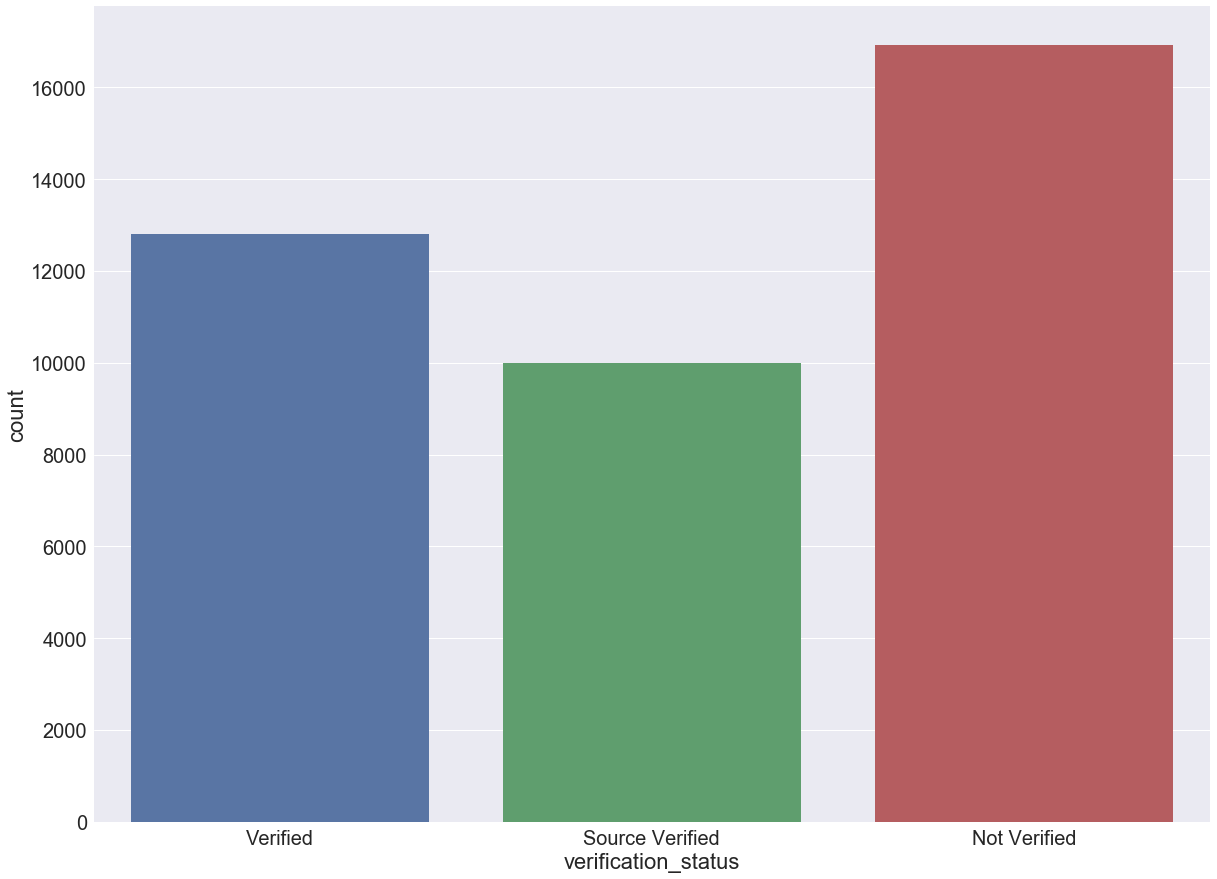

In [189]:
##Univariate analysis of verification_status
sns.set(font_scale=2)
plt.figure(figsize=(20,15))
sns.countplot(Loan_nacol_rem_df['verification_status'] )## Tryning to abstract some information if present 

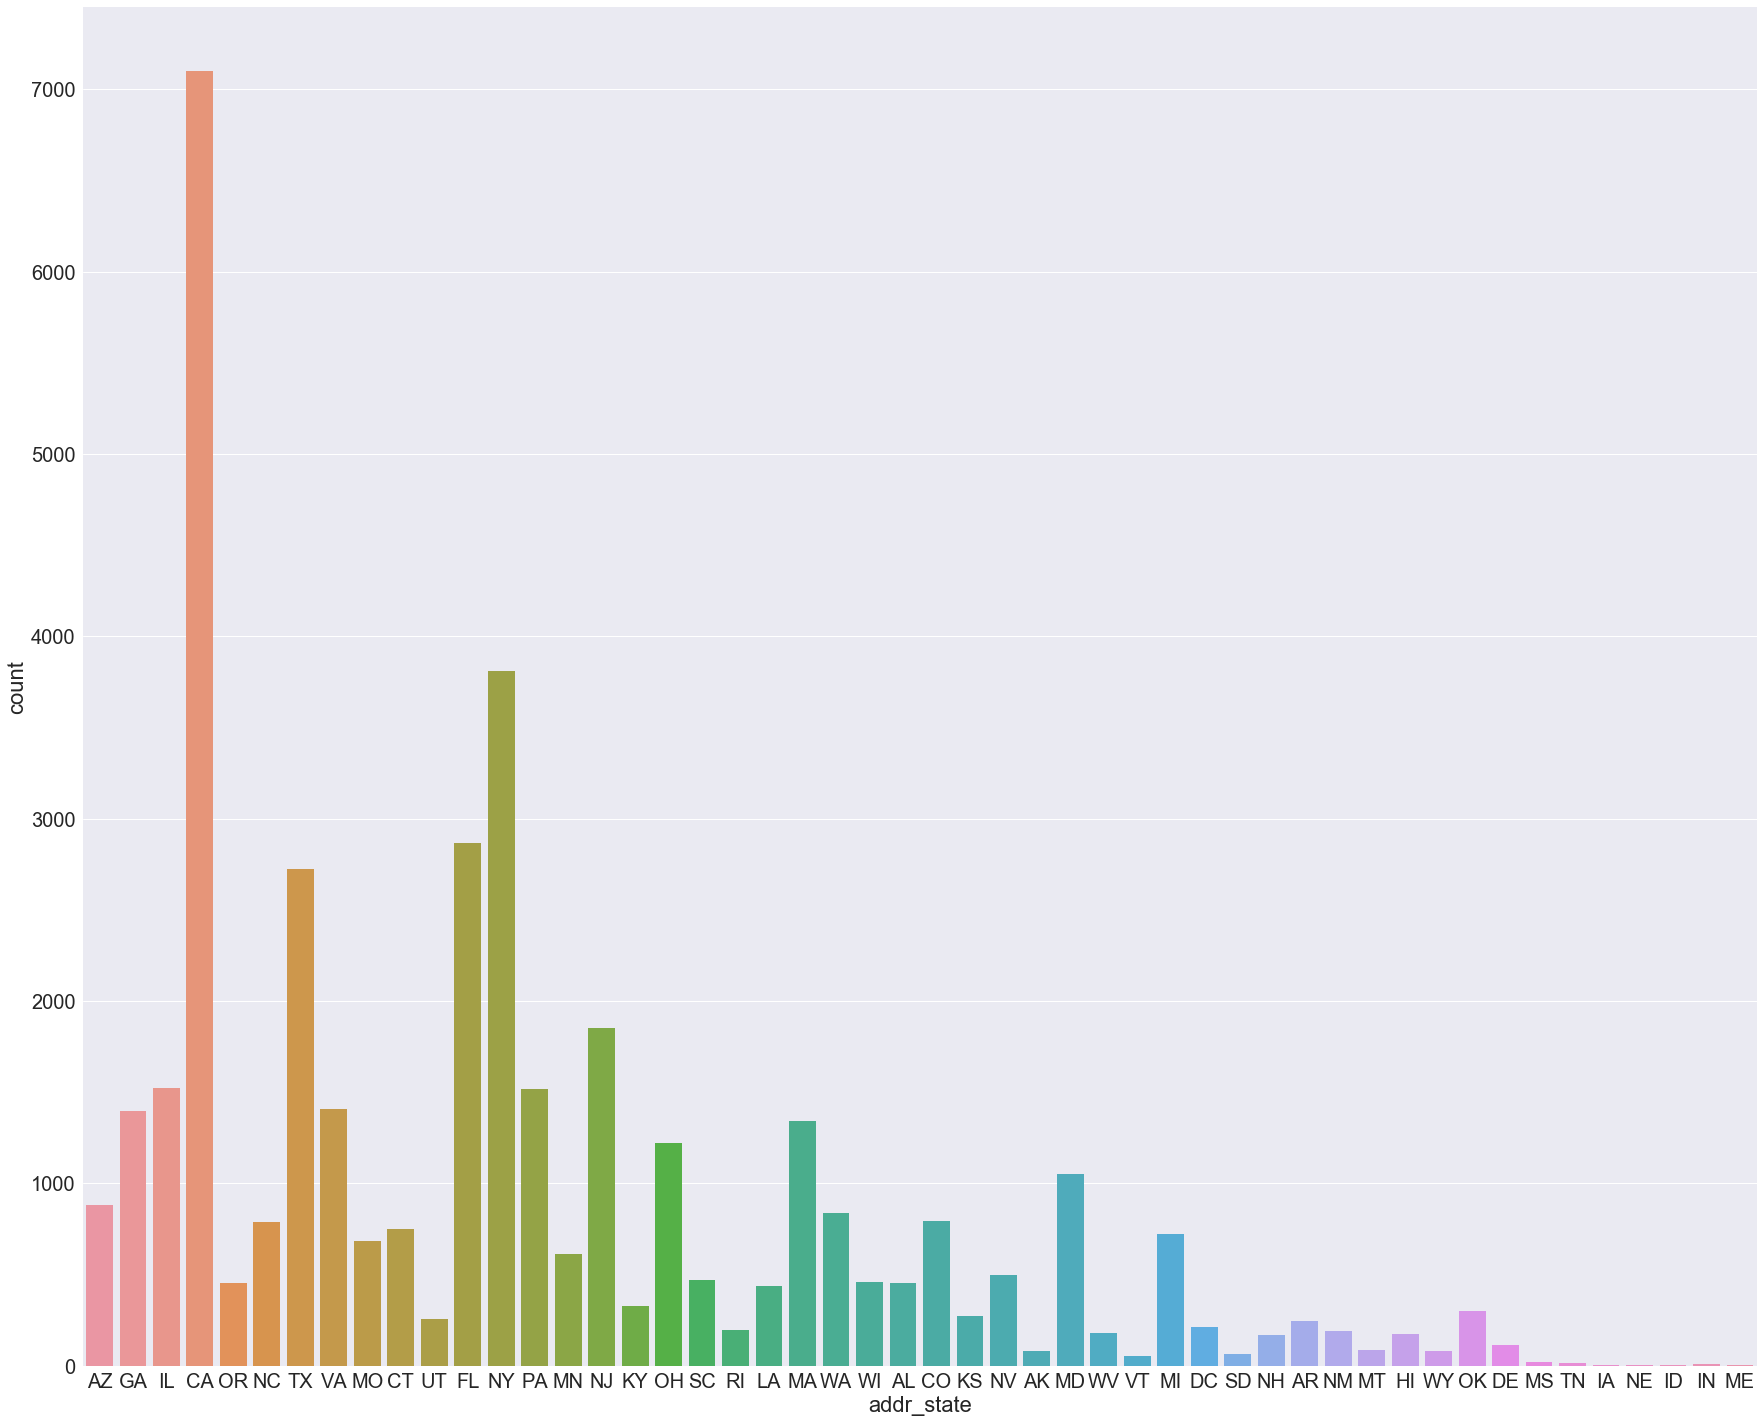

In [190]:
##Univariate analysis of address state
sns.set(font_scale=2)
plt.figure(figsize=(30,25))
sns.countplot(Loan_nacol_rem_df['addr_state'] )
## Tryning to abstract some information, plot shows total accounts are more from CA state

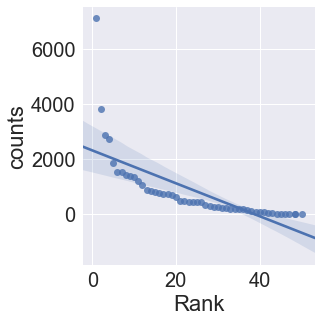

In [191]:
# Analysing if powerlaw distribution in state

df_state=Loan_nacol_rem_df[['addr_state']].groupby(['addr_state']).size().rename('counts').reset_index()
df_state['Rank']=df_state['counts'].rank(ascending=False)
df_state
f = plt.figure(figsize=(30,18))
sns.lmplot('Rank','counts',df_state)
###This power law or rank frequency plot for addr_state shows that irrespective of defaulters there is more customer...continued 
###customer base in California >(than) New York>Florida >Texas>New Jersy >……and so on 

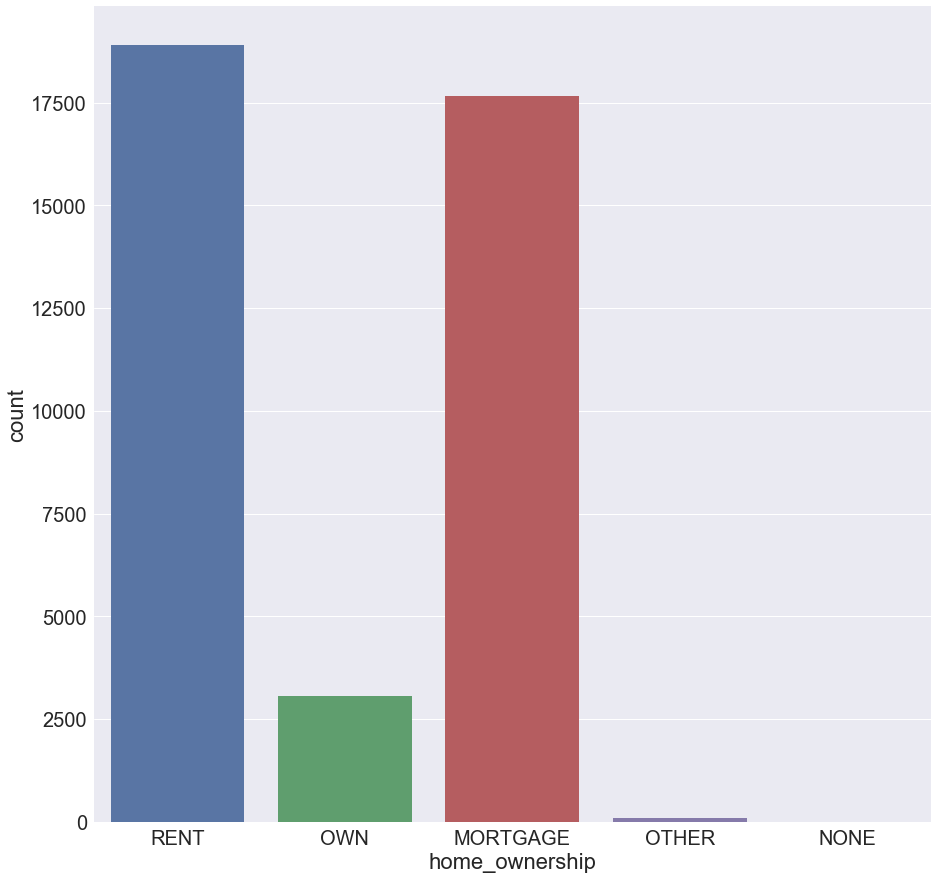

In [192]:
## Analysis of home ownership
f1, ax1 = plt.subplots(figsize=(15, 15))
sns.set(font_scale=2)
sns.countplot(x=Loan_nacol_rem_df['home_ownership'])
#### People with Rent and Mortgage apply more for loan

  home_ownership  counts  Rank
0       MORTGAGE   17659   2.0
1           NONE       3   5.0
2          OTHER      98   4.0
3            OWN    3058   3.0
4           RENT   18899   1.0


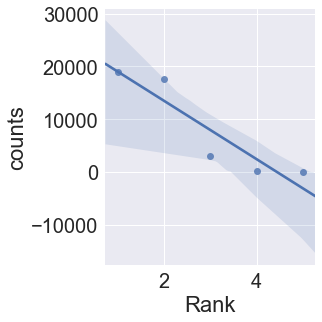

In [193]:
## Analysis of home ownership
df8=Loan_nacol_rem_df[['home_ownership']].groupby(['home_ownership']).size().rename('counts').reset_index()

df8['Rank']=df8['counts'].rank(ascending=False)
print(df8)
f = plt.figure(figsize=(30,18))
sns.lmplot('Rank','counts',df8)
# This power law or rank frequency plot for home_ownership shows that irrespective of defaulters Rented customers are...continued
# having more requirement of loan than the customer with mortgage and respectively own house customer

# Ordered categorical analsis open_acc total_acc annual_income 

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


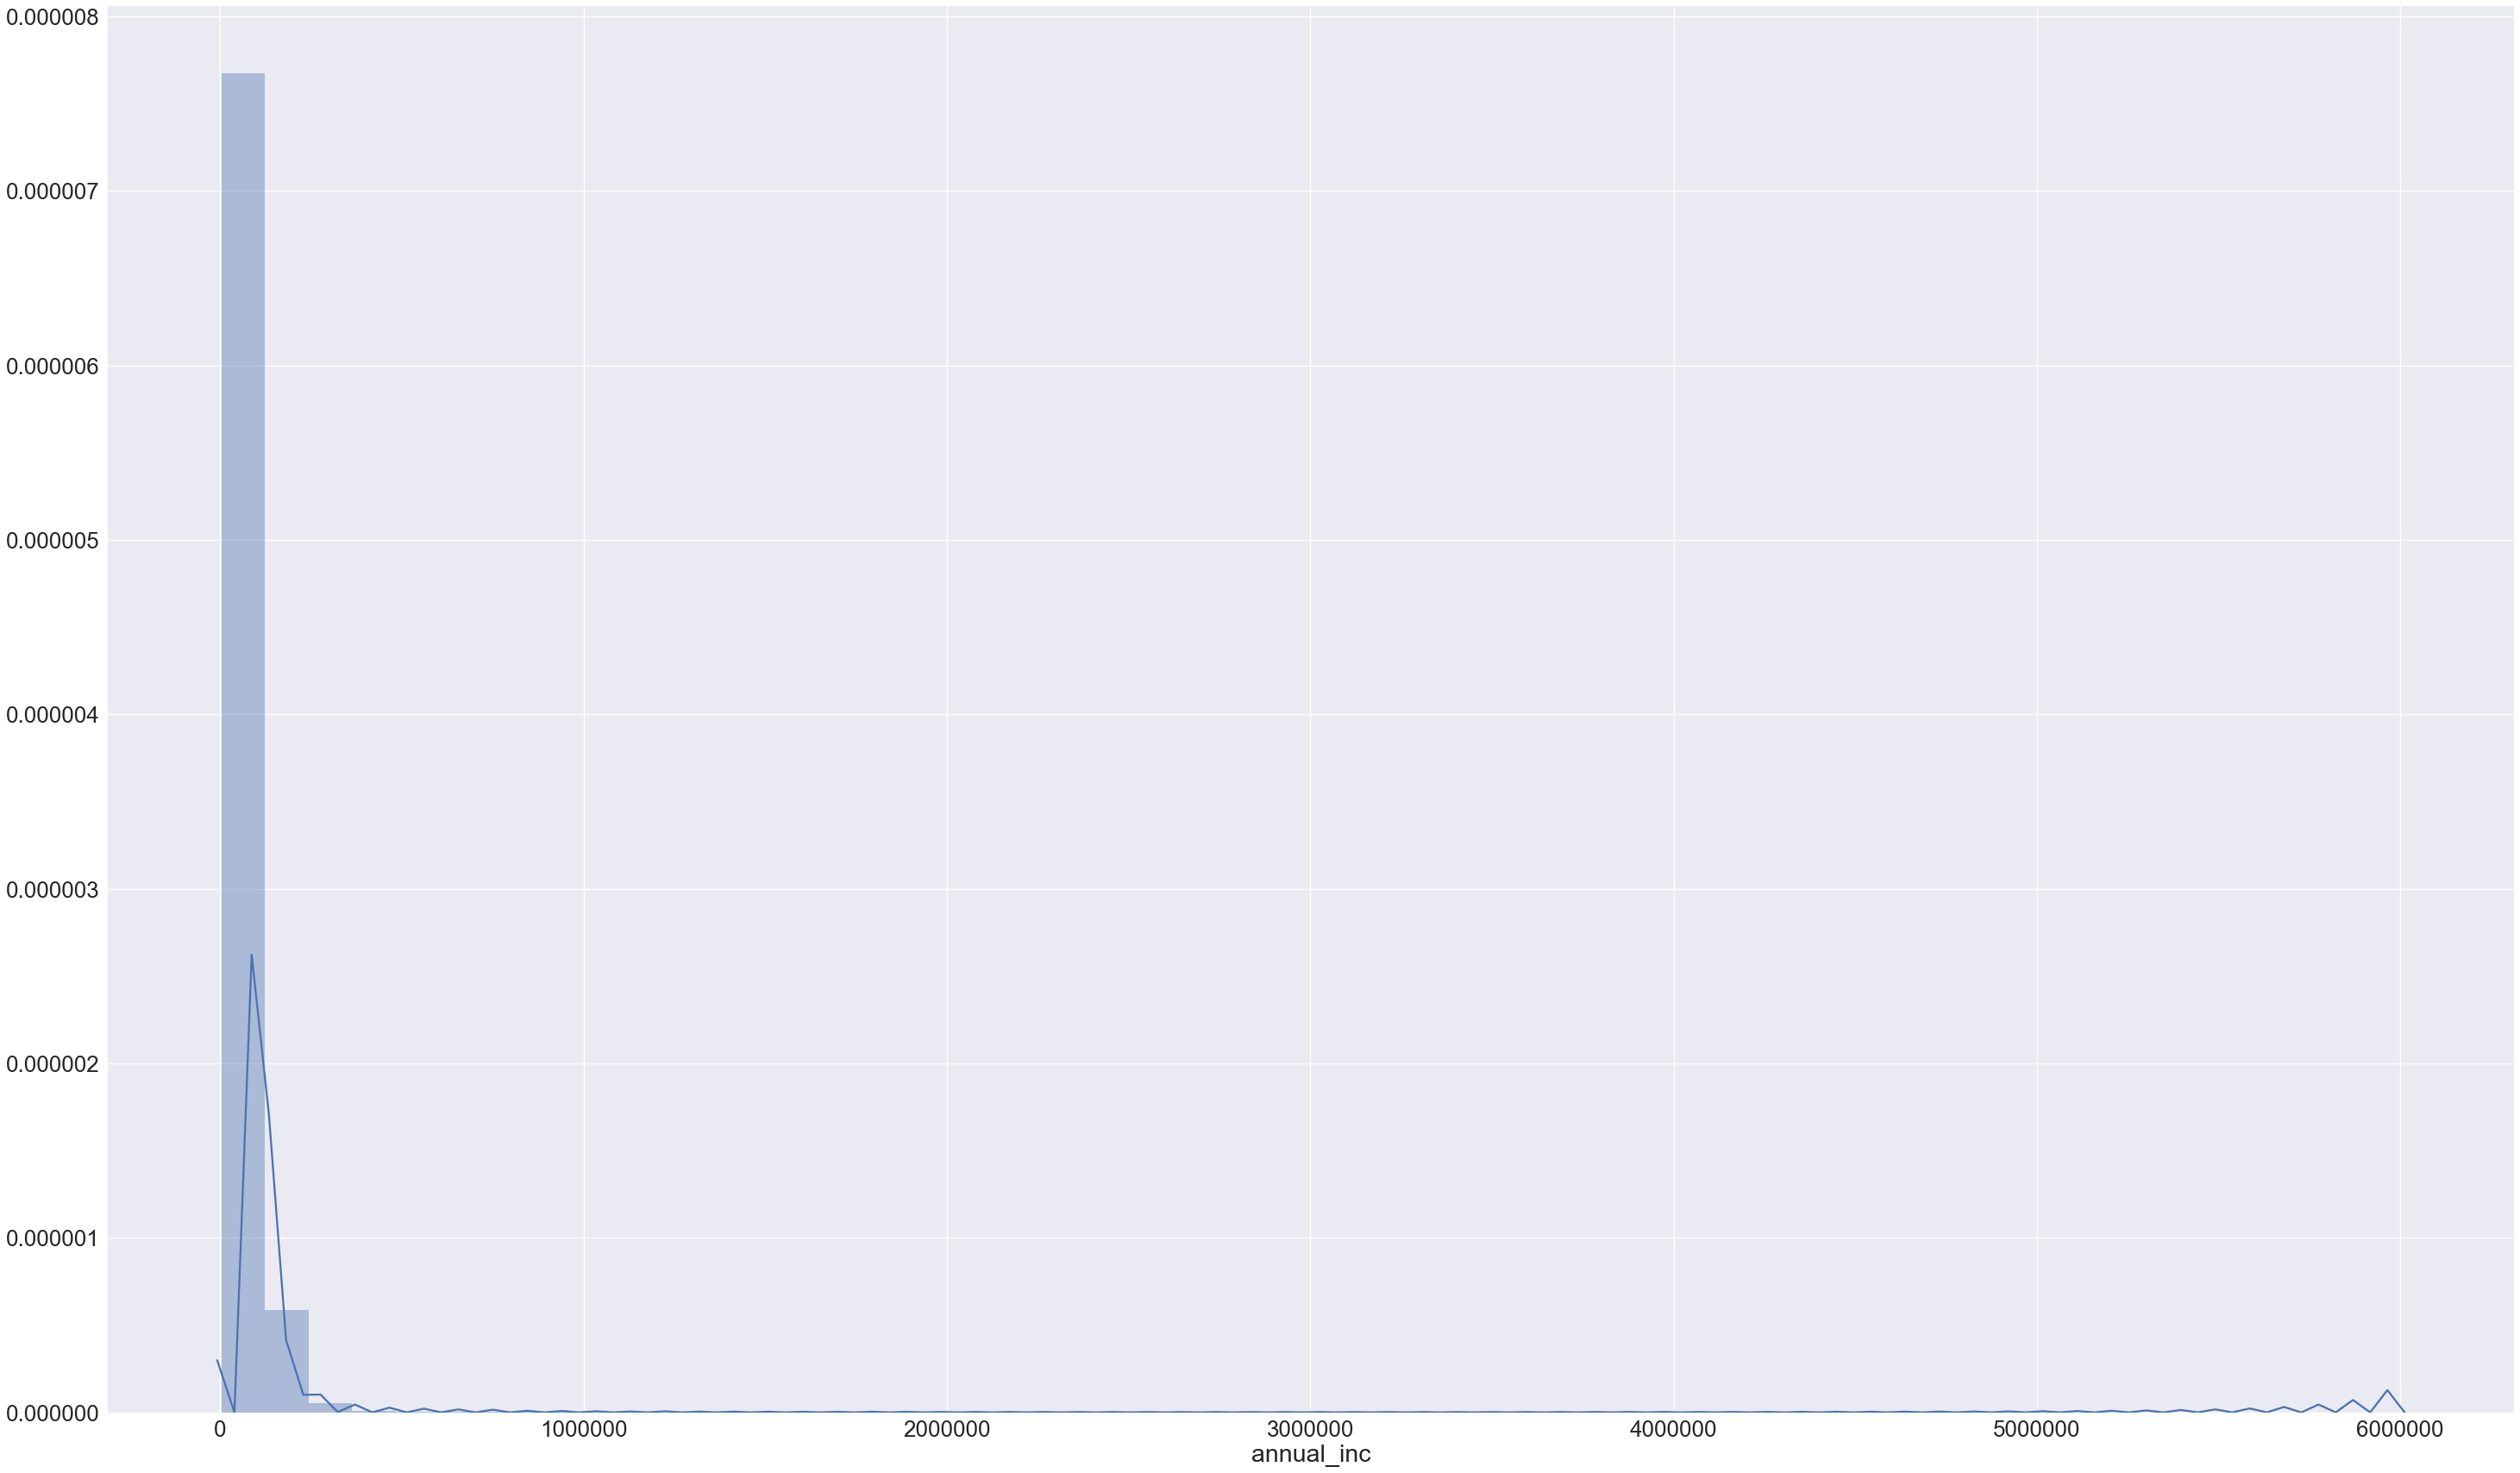

In [194]:
# Univariate Analysis on anual income annual_inc
print(Loan_nacol_rem_df.annual_inc.describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.annual_inc)

#here are some outliers beyond 75 percentile, most of the applicants are earning between 40000-80000
#Please look into this

count     37743.000000
mean      61071.860572
std       27830.995882
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64


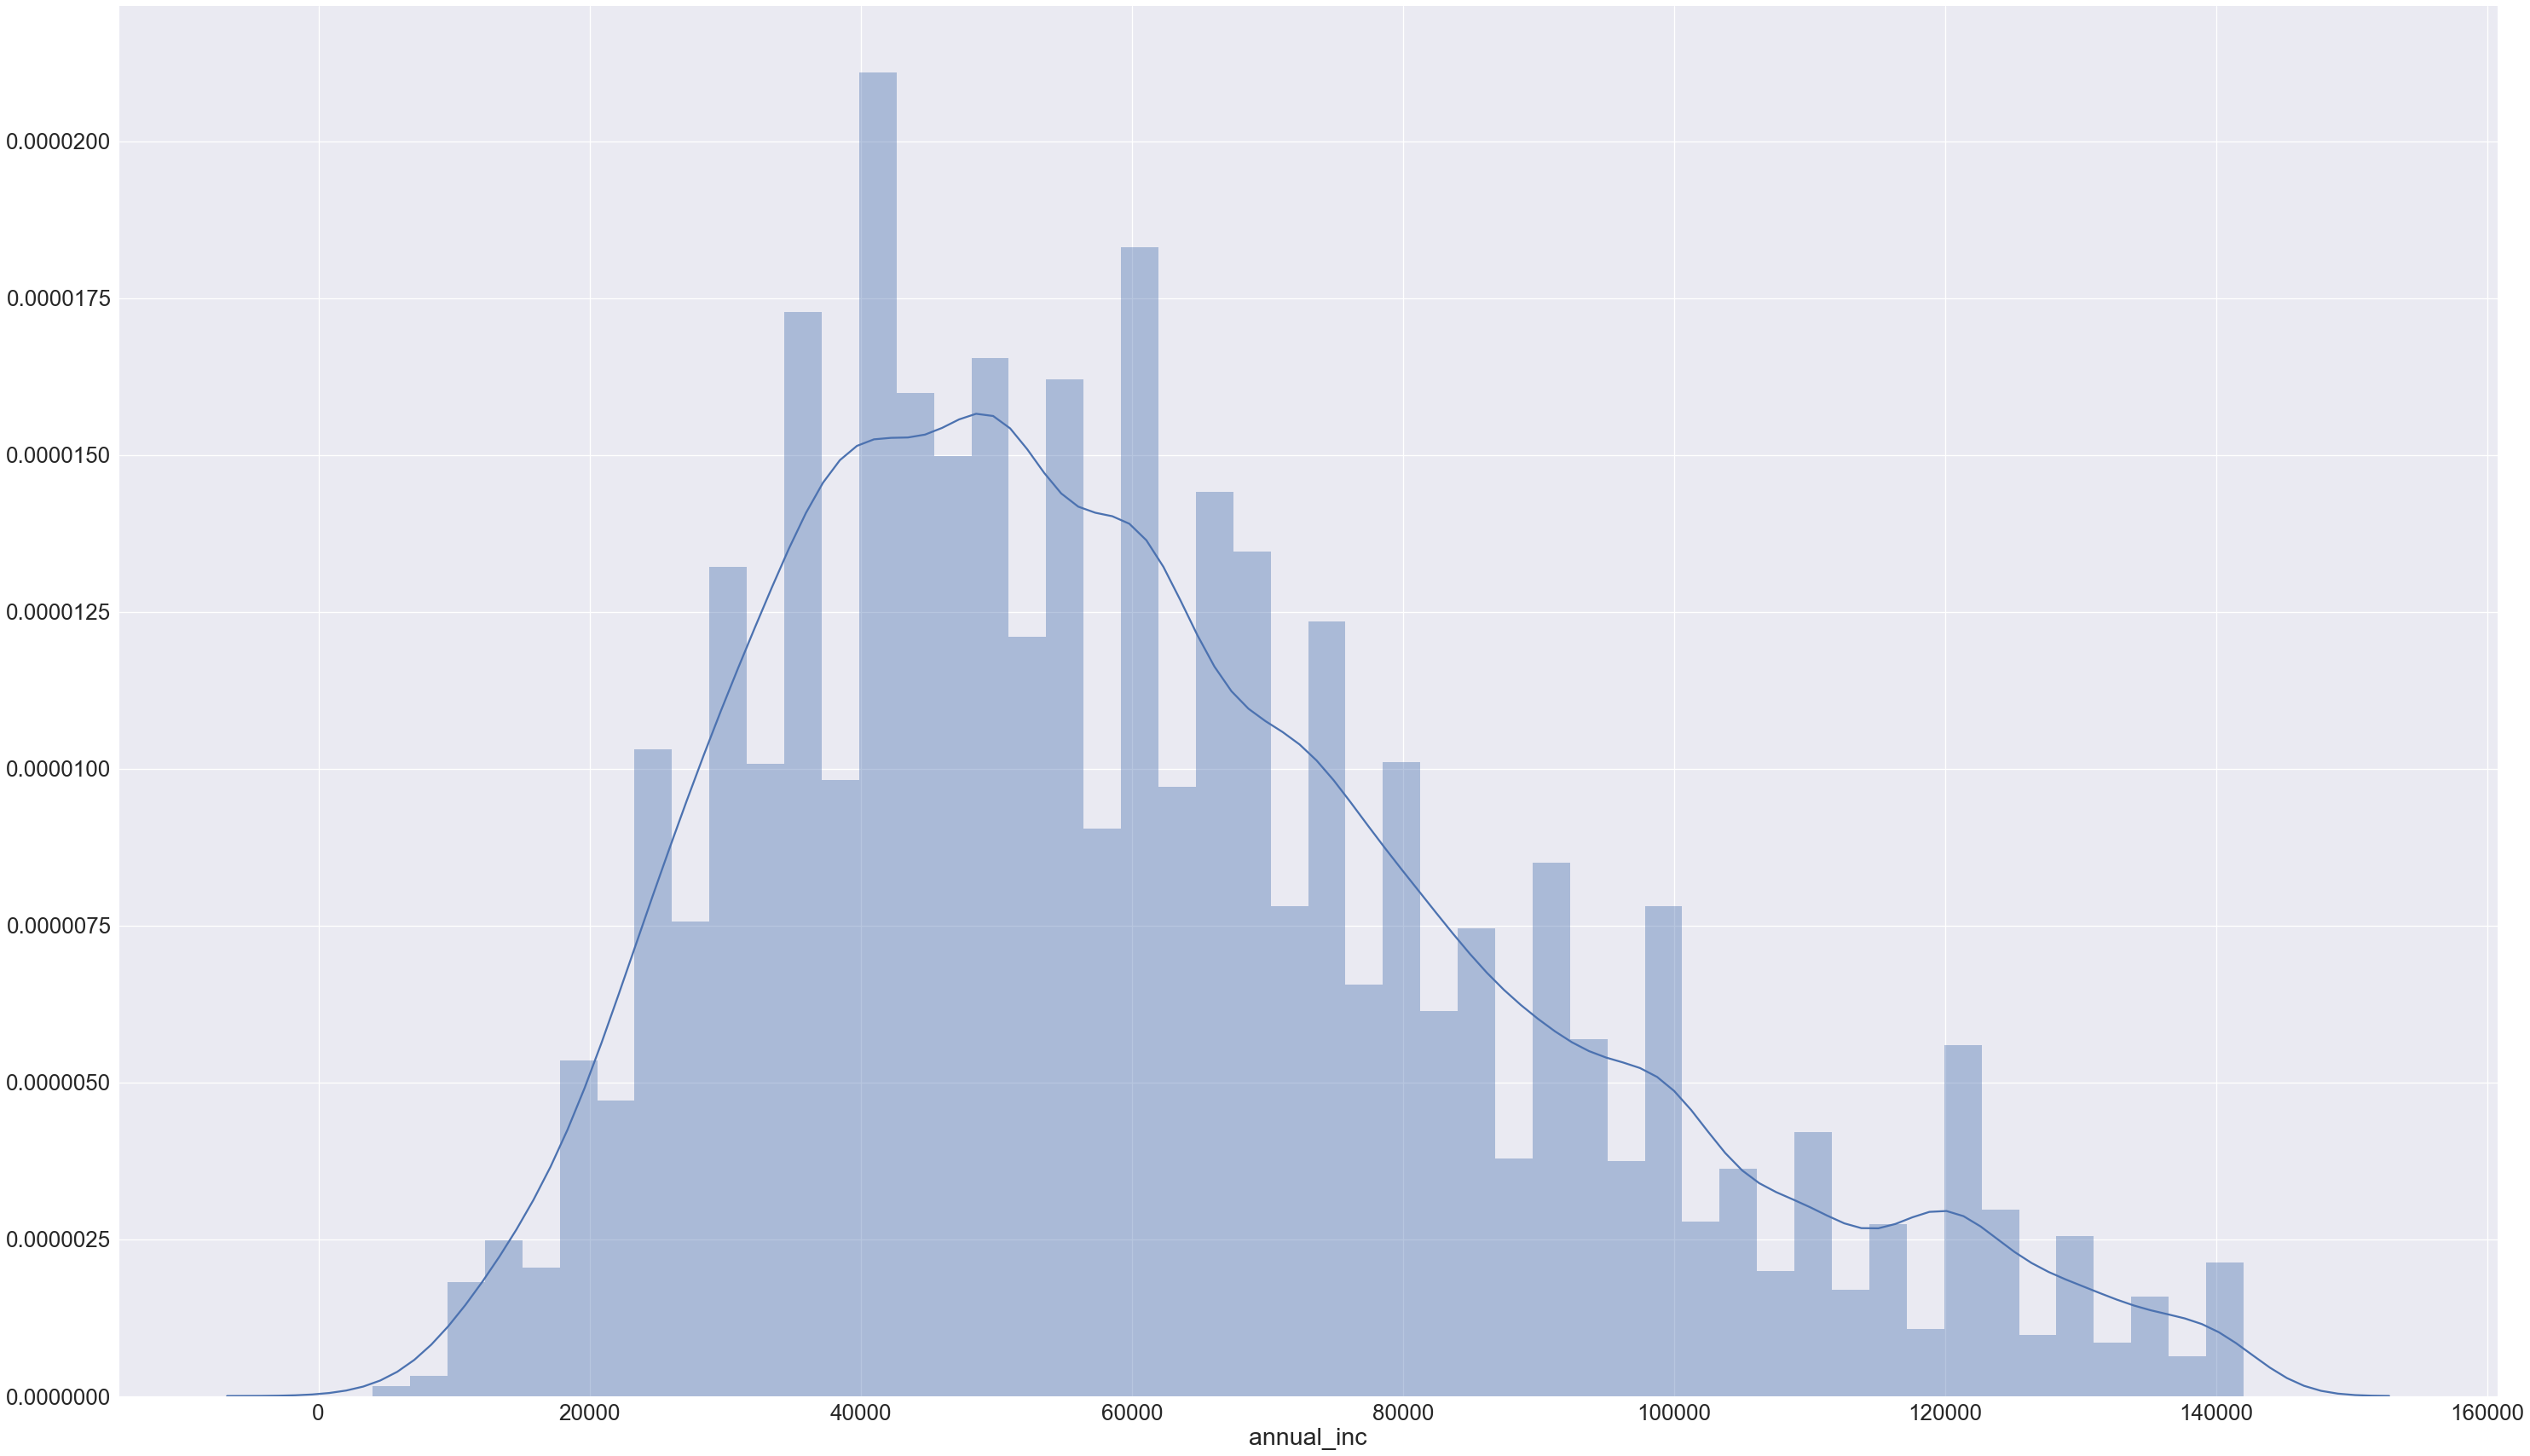

In [195]:
#lets remove outliers and check histogram for distribution
###Removing outlier income group i.e. annual_inc >95%
Loan_anuual_income95_df1=Loan_nacol_rem_df.copy()
Loan_anuual_income95_df1=Loan_anuual_income95_df1[Loan_anuual_income95_df1['annual_inc']<=Loan_anuual_income95_df1['annual_inc'].quantile(.95)]
print(Loan_anuual_income95_df1.annual_inc.describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_anuual_income95_df1.annual_inc)


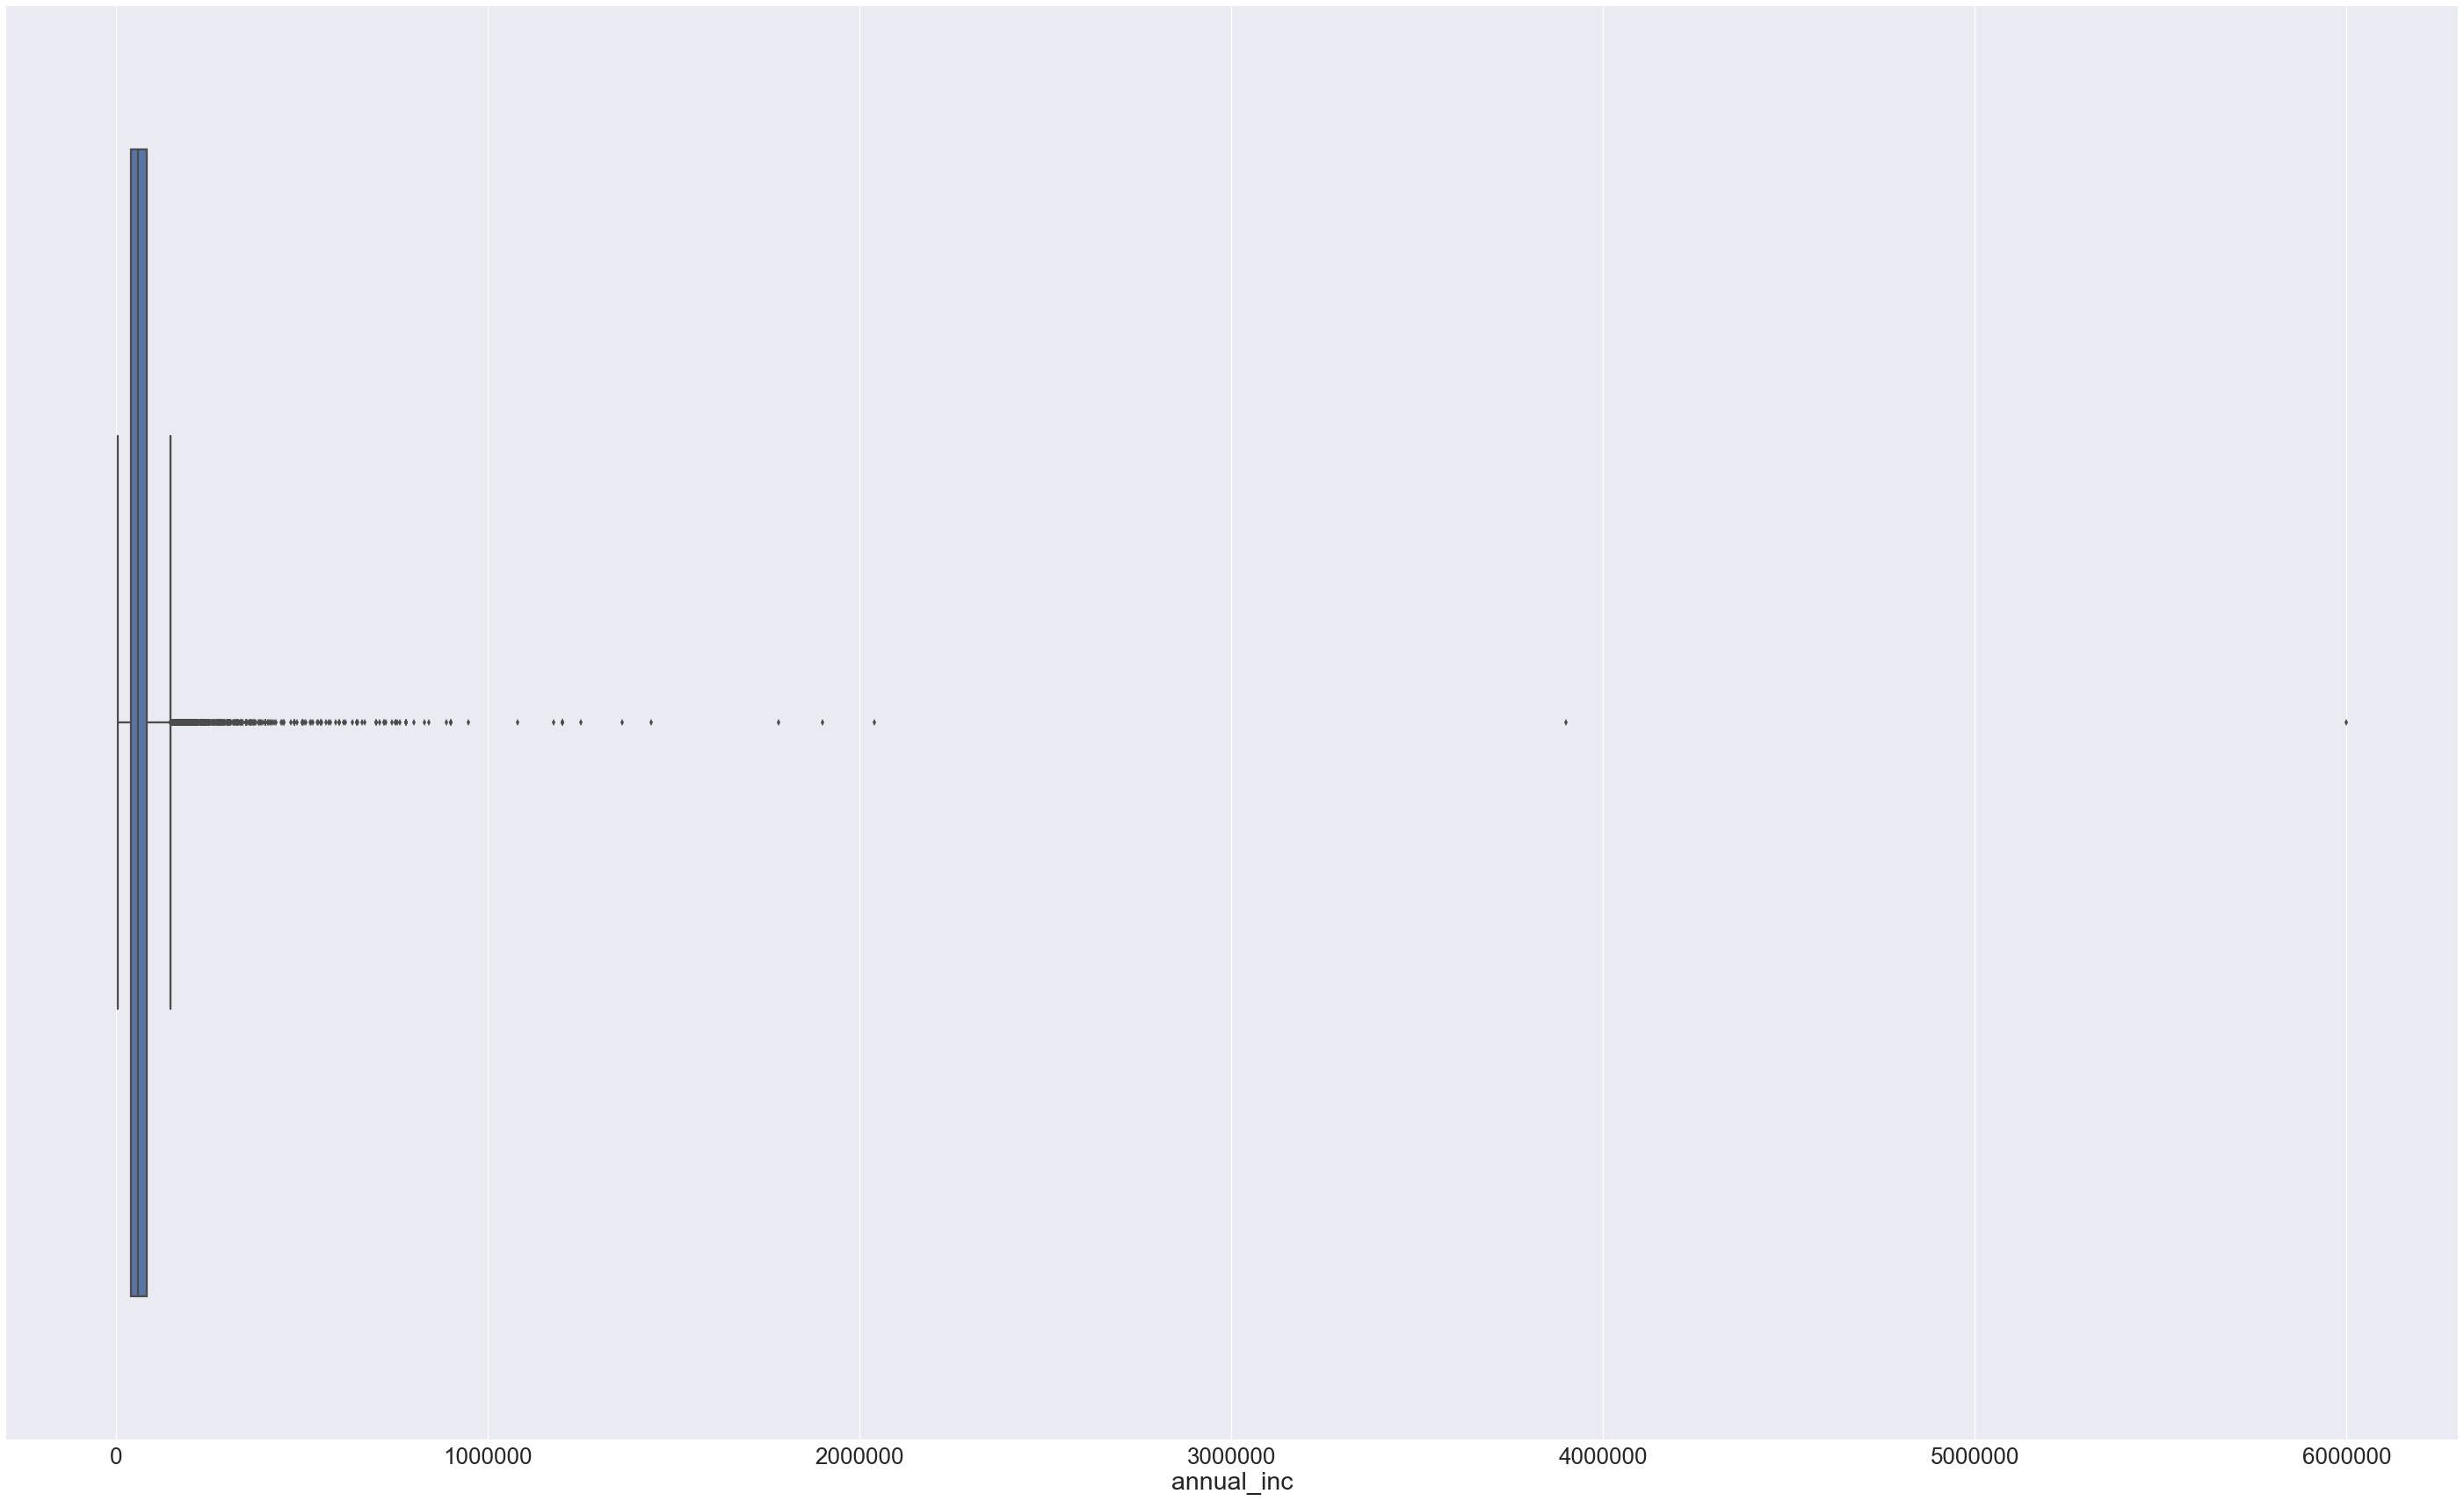

In [196]:
#Creating Box Plot for anual income and we observed it was skewed because of some outliers
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
g=sns.boxplot(Loan_nacol_rem_df.annual_inc)

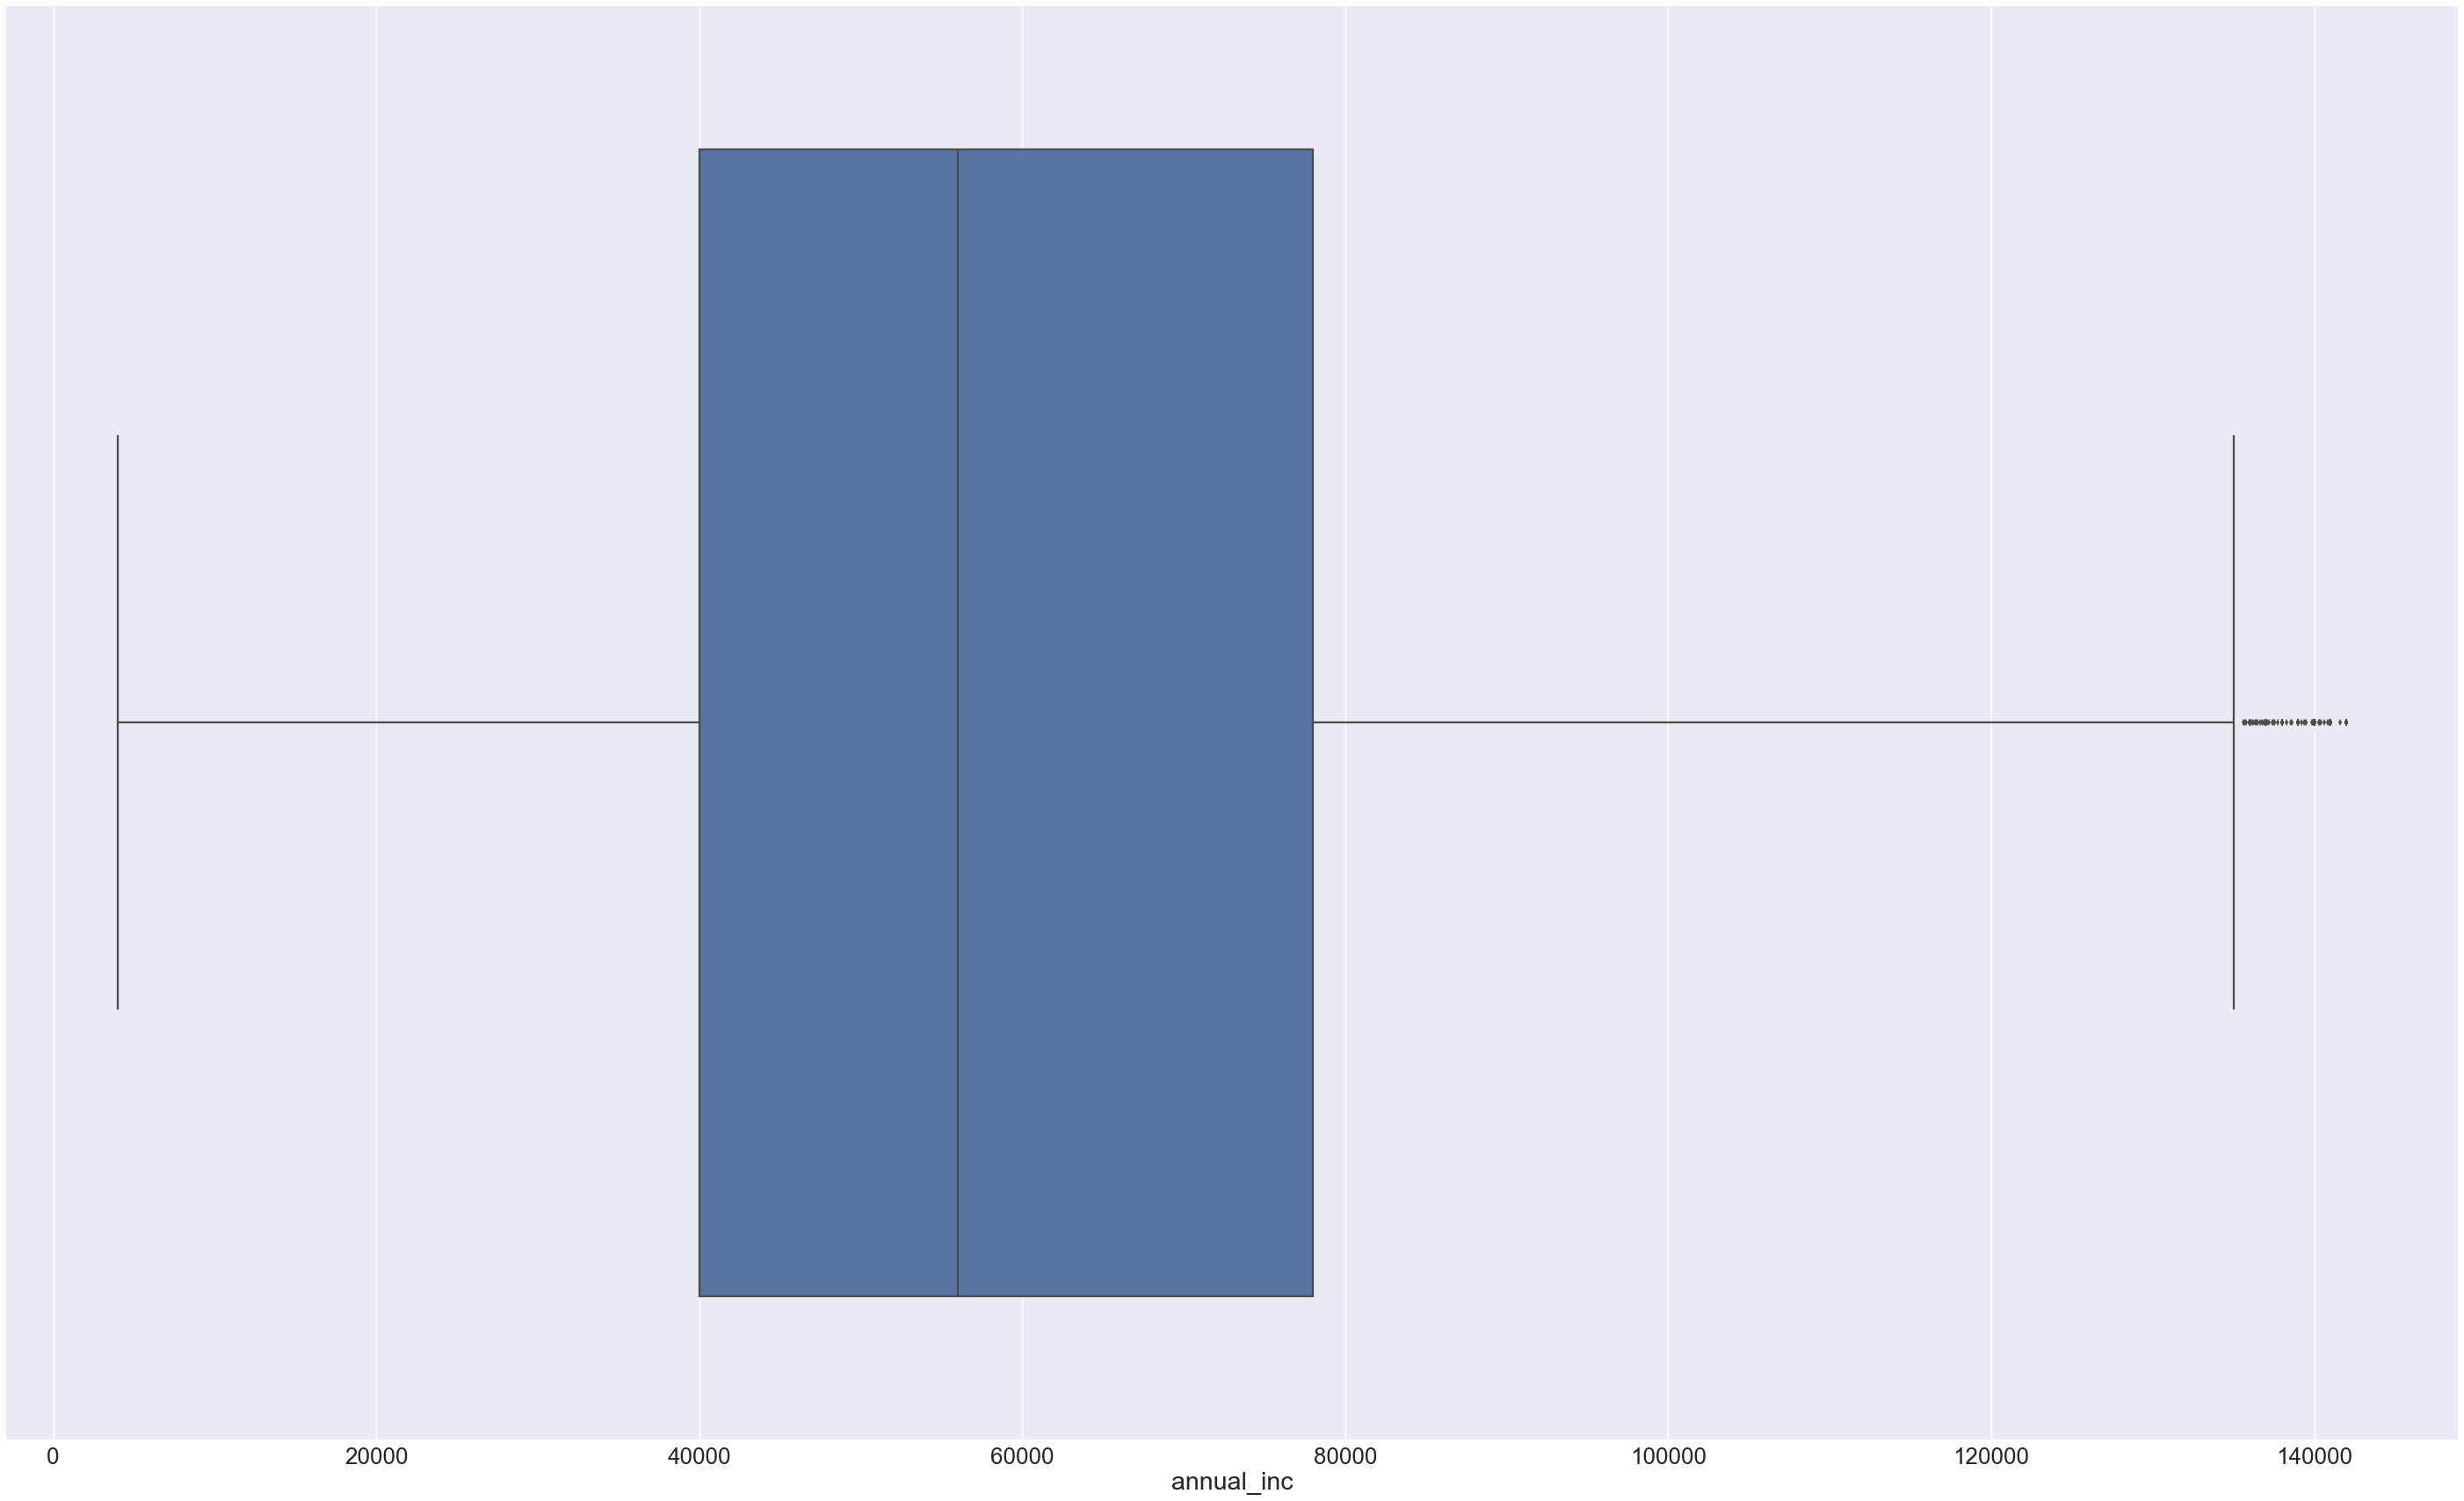

In [197]:
#After removing 95 percentile of outliers income 
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.boxplot(Loan_anuual_income95_df1.annual_inc)



### From above two box and distribution plots we have done Quantitative univariate analysis and removed outliers

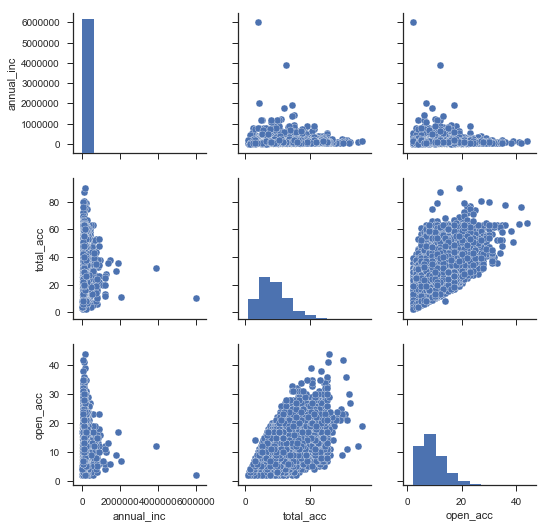

In [198]:
f = plt.figure(figsize=(30,30))
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Loan_nacol_rem_df[['annual_inc','total_acc','open_acc']])
# Total_acc vs open_acc shows positive correlation which is obviuos

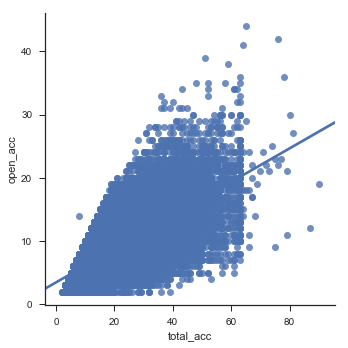

In [199]:
####Open acc incresaes with total acc
f = plt.figure(figsize=(80,60))
sns.lmplot('total_acc','open_acc',Loan_nacol_rem_df[['annual_inc','total_acc','open_acc']])

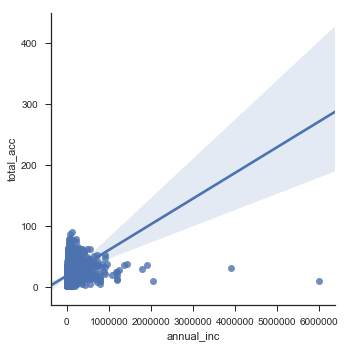

In [200]:
####total acc incresaes with income
f = plt.figure(figsize=(80,60))
sns.lmplot('annual_inc','total_acc',Loan_nacol_rem_df[['annual_inc','total_acc','open_acc']])

# Quantitative Univariate analysis Salary Interset rate dti

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


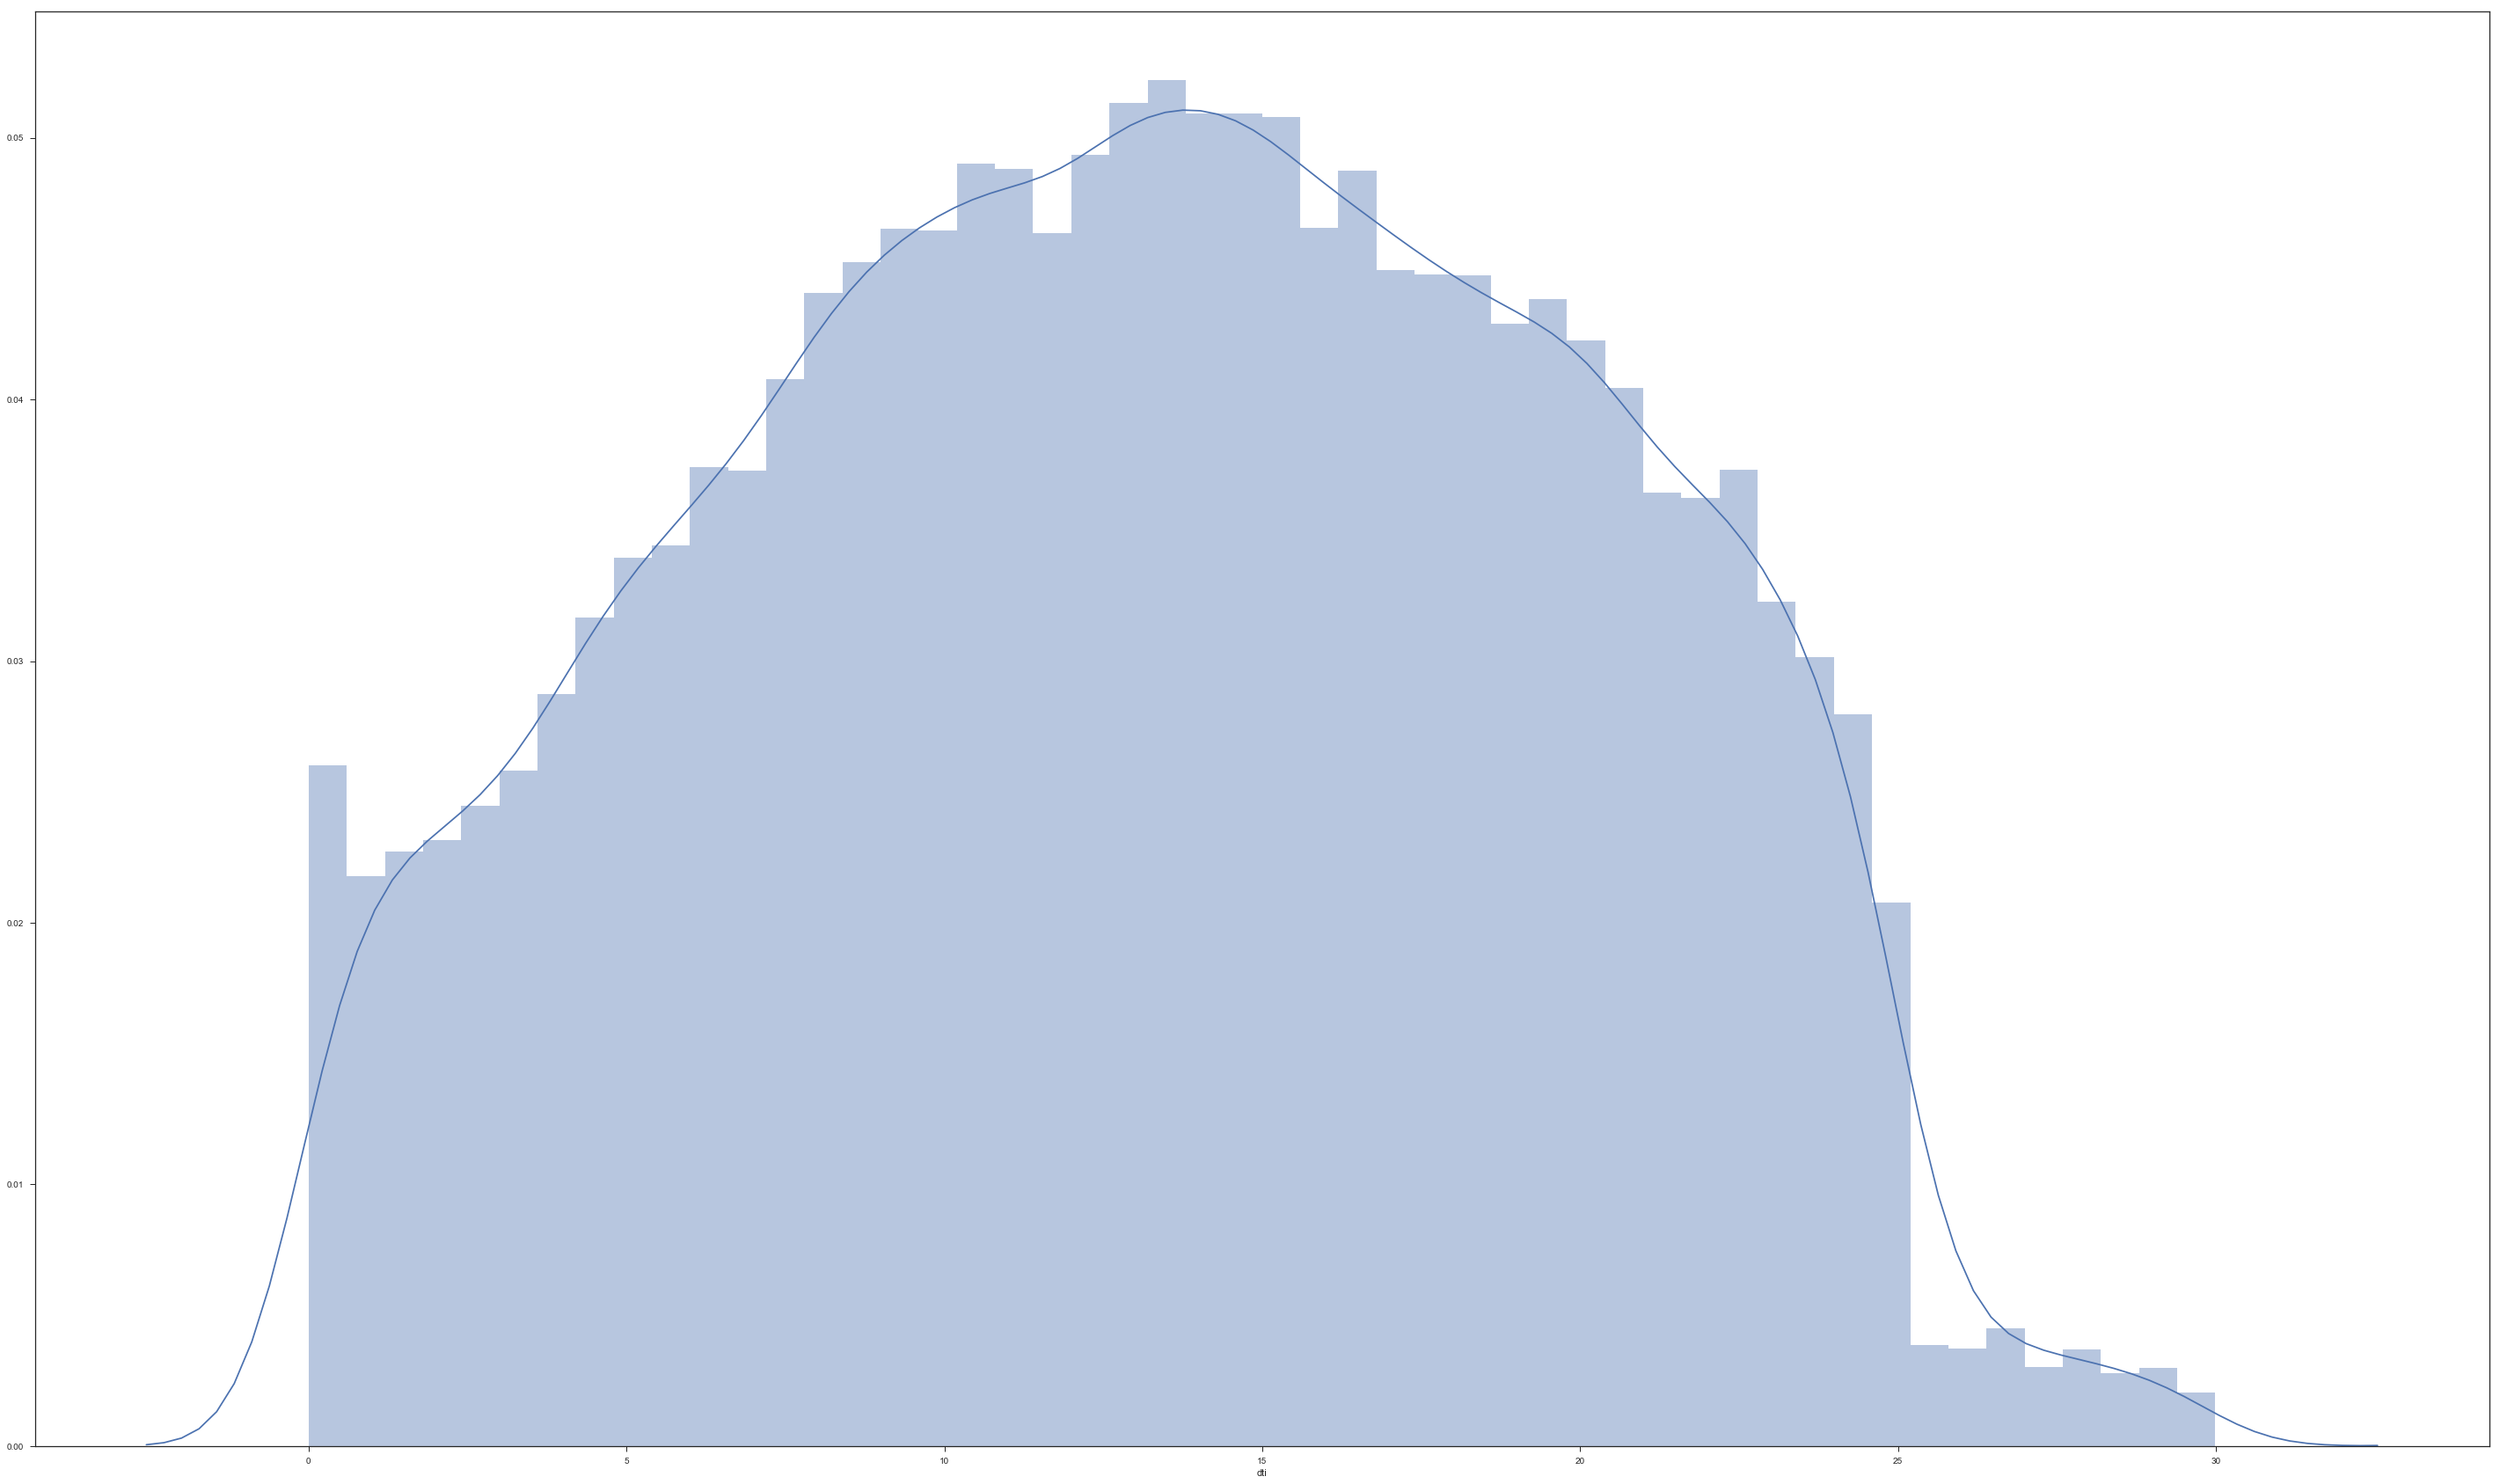

In [201]:
# Univariate Analysis on dti debt to interest ratio
print(Loan_nacol_rem_df.dti.describe())
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.dti)

# It seems majority of applications is having debt to income ratio between 13-18. It is following normal distribution

### Trying to plot dti,intallment , interest rate, Monthly salary. Salary has outliers so 2nd plot with 95 percentile

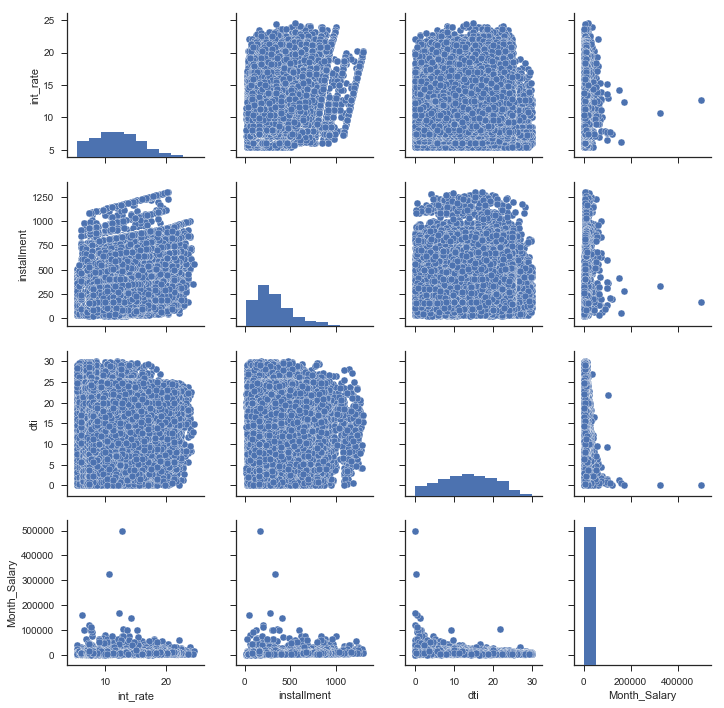

In [202]:
Loan_3qulitative_df=Loan_nacol_rem_df.copy()
Loan_3qulitative_df['Month_Salary']=Loan_3qulitative_df['annual_inc']/12

f = plt.figure(figsize=(30,30))
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Loan_3qulitative_df[['int_rate','installment','dti','Month_Salary']])
# NO reation found as such in these perticular variabl

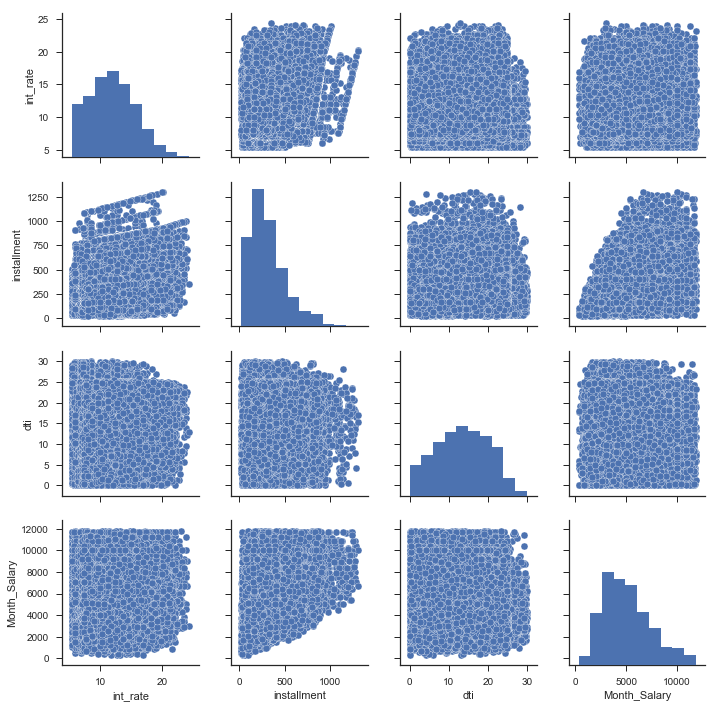

In [203]:
###Removing outlier income group i.e. annual_inc >95% and observing
Loan_3qulitative_df1=Loan_3qulitative_df[Loan_3qulitative_df['annual_inc']<=Loan_3qulitative_df['annual_inc'].quantile(.95)]

f = plt.figure(figsize=(30,30))
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Loan_3qulitative_df1[['int_rate','installment','dti','Month_Salary']])
#  installment vs monthly salary is correlated which is obvious but no relation found in other mentioned variable 

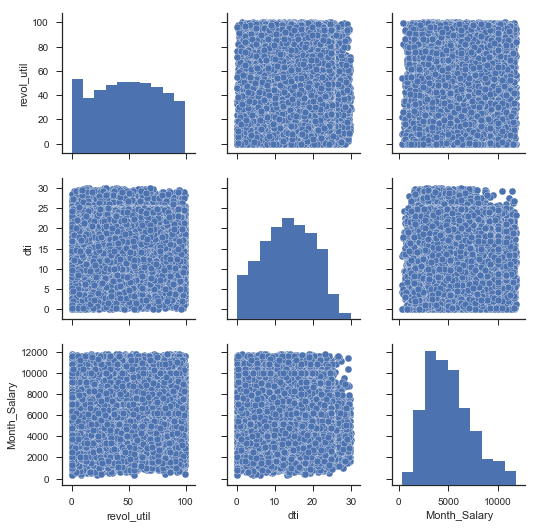

In [204]:
###Removing outlier income group i.e. annual_inc >95%
Loan_3qulitative_df1=Loan_3qulitative_df[Loan_3qulitative_df['annual_inc']<=Loan_3qulitative_df['annual_inc'].quantile(.95)]

f = plt.figure(figsize=(30,30))
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Loan_3qulitative_df1[['revol_util','dti','Month_Salary']])

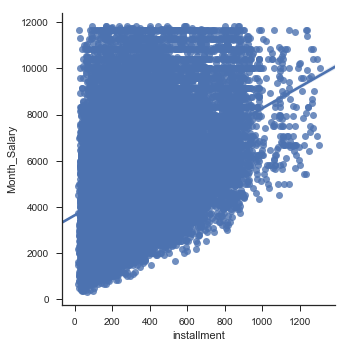

In [205]:
####installment incresaes with income
f = plt.figure(figsize=(80,60))
sns.lmplot('installment','Month_Salary',Loan_3qulitative_df1[['int_rate','installment','dti','Month_Salary']])

In [206]:
# Cleaning column 'emp_length
Loan_nacol_rem_df['emp_length']=Loan_nacol_rem_df.emp_length.str.extract('(\d+)')
Loan_nacol_rem_df['emp_length']=Loan_nacol_rem_df['emp_length'].apply(pd.to_numeric)


##Loan_nacol_rem_df['emp_length']=Loan_nacol_rem_df.emp_length.fillna(Loan_nacol_rem_df.emp_length.mean())
## Above imputation is shifting data towards mean as there are 1000 data with null hence commenting out bivariate analysis remove n/a (1075-rows)



#Breaking down loan_status
#[Fully Paid, Current and Charged Off into three new column to represent it with 0 and 1 where 1 if loan_status is true]

def loan_status_fully_paid(status):
    if (status=='Fully Paid'):
        return 1
    else:
        return 0
    
Loan_nacol_rem_df['loan_status_fully_paid']=Loan_nacol_rem_df['loan_status']\
                                                            .apply(lambda x: loan_status_fully_paid(x)) 

def loan_status_Current(status):
    if (status=='Current'):
        return 1
    else:
        return 0
    
Loan_nacol_rem_df['loan_status_current']=Loan_nacol_rem_df['loan_status']\
                                                          .apply(lambda x: loan_status_Current(x)) 

def loan_status_Charged_Off(status):
    if (status=='Charged Off'):
        return 1
    else:
        return 0
    
Loan_nacol_rem_df['loan_status_charged_off']=Loan_nacol_rem_df['loan_status']\
                                                             .apply(lambda x: loan_status_Charged_Off(x)) 



C:\Users\inpunabhr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [207]:
#analysing column chargeoff_within_12_mths
Loan_nacol_rem_df[~(Loan_nacol_rem_df['chargeoff_within_12_mths']==0) &\
                 (Loan_nacol_rem_df['chargeoff_within_12_mths'].isnull())]\
                  ['chargeoff_within_12_mths'].count()
    # Based on Result we can drop the chargeoff_within_12_mths column
    
    #analysing column chargeoff_within_12_mths
Loan_nacol_rem_df[~(Loan_nacol_rem_df['collections_12_mths_ex_med']==0) &\
                 (Loan_nacol_rem_df['collections_12_mths_ex_med'].isnull())]\
                  ['collections_12_mths_ex_med'].count()
    
        # Based on Result we can drop the chargeoff_within_12_mths column

0

In [208]:
Loan_nacol_rem_df.drop(columns=['chargeoff_within_12_mths','collections_12_mths_ex_med'],inplace=True)
##Loan_nacol_rem_df.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med'],inplace=True,axis=1)
#Loan_nacol_rem_df.drop(columns=['collections_12_mths_ex_med'],inplace=True)
Loan_nacol_rem_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 58 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null float64
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
url      

In [209]:
##import numpy as np
##Loan_nacol_rem_df[['loan_status','acc_now_delinq']].unique()
##np.unique(Loan_nacol_rem_df[['loan_status','acc_now_delinq']])

Loan_nacol_rem_df.groupby(['loan_status','acc_now_delinq']).sum()\
                                                           .sum(level=['loan_status','acc_now_delinq'])\
                                                           .unstack('loan_status')\
                                                           .fillna(0)\
                                                           .reset_index()


acc_now_delinq          id                            member_id  \
loan_status                Charged Off     Current   Fully Paid Charged Off   
0                        0  3926768268  1039288828  22165893095  4882841285   

                                       loan_amnt                       \
loan_status     Current   Fully Paid Charged Off   Current Fully Paid   
0            1285058304  27609961600    68111375  19441550  358049725   

               ...      tax_liens loan_status_fully_paid                     \
loan_status    ...     Fully Paid            Charged Off Current Fully Paid   
0              ...            0.0                      0       0      32950   

            loan_status_current                    loan_status_charged_off  \
loan_status         Charged Off Current Fully Paid             Charged Off   
0                             0    1140          0                    5627   

                                
loan_status Current Fully Paid  
0                 0          0  

[1 rows x 112 columns]

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


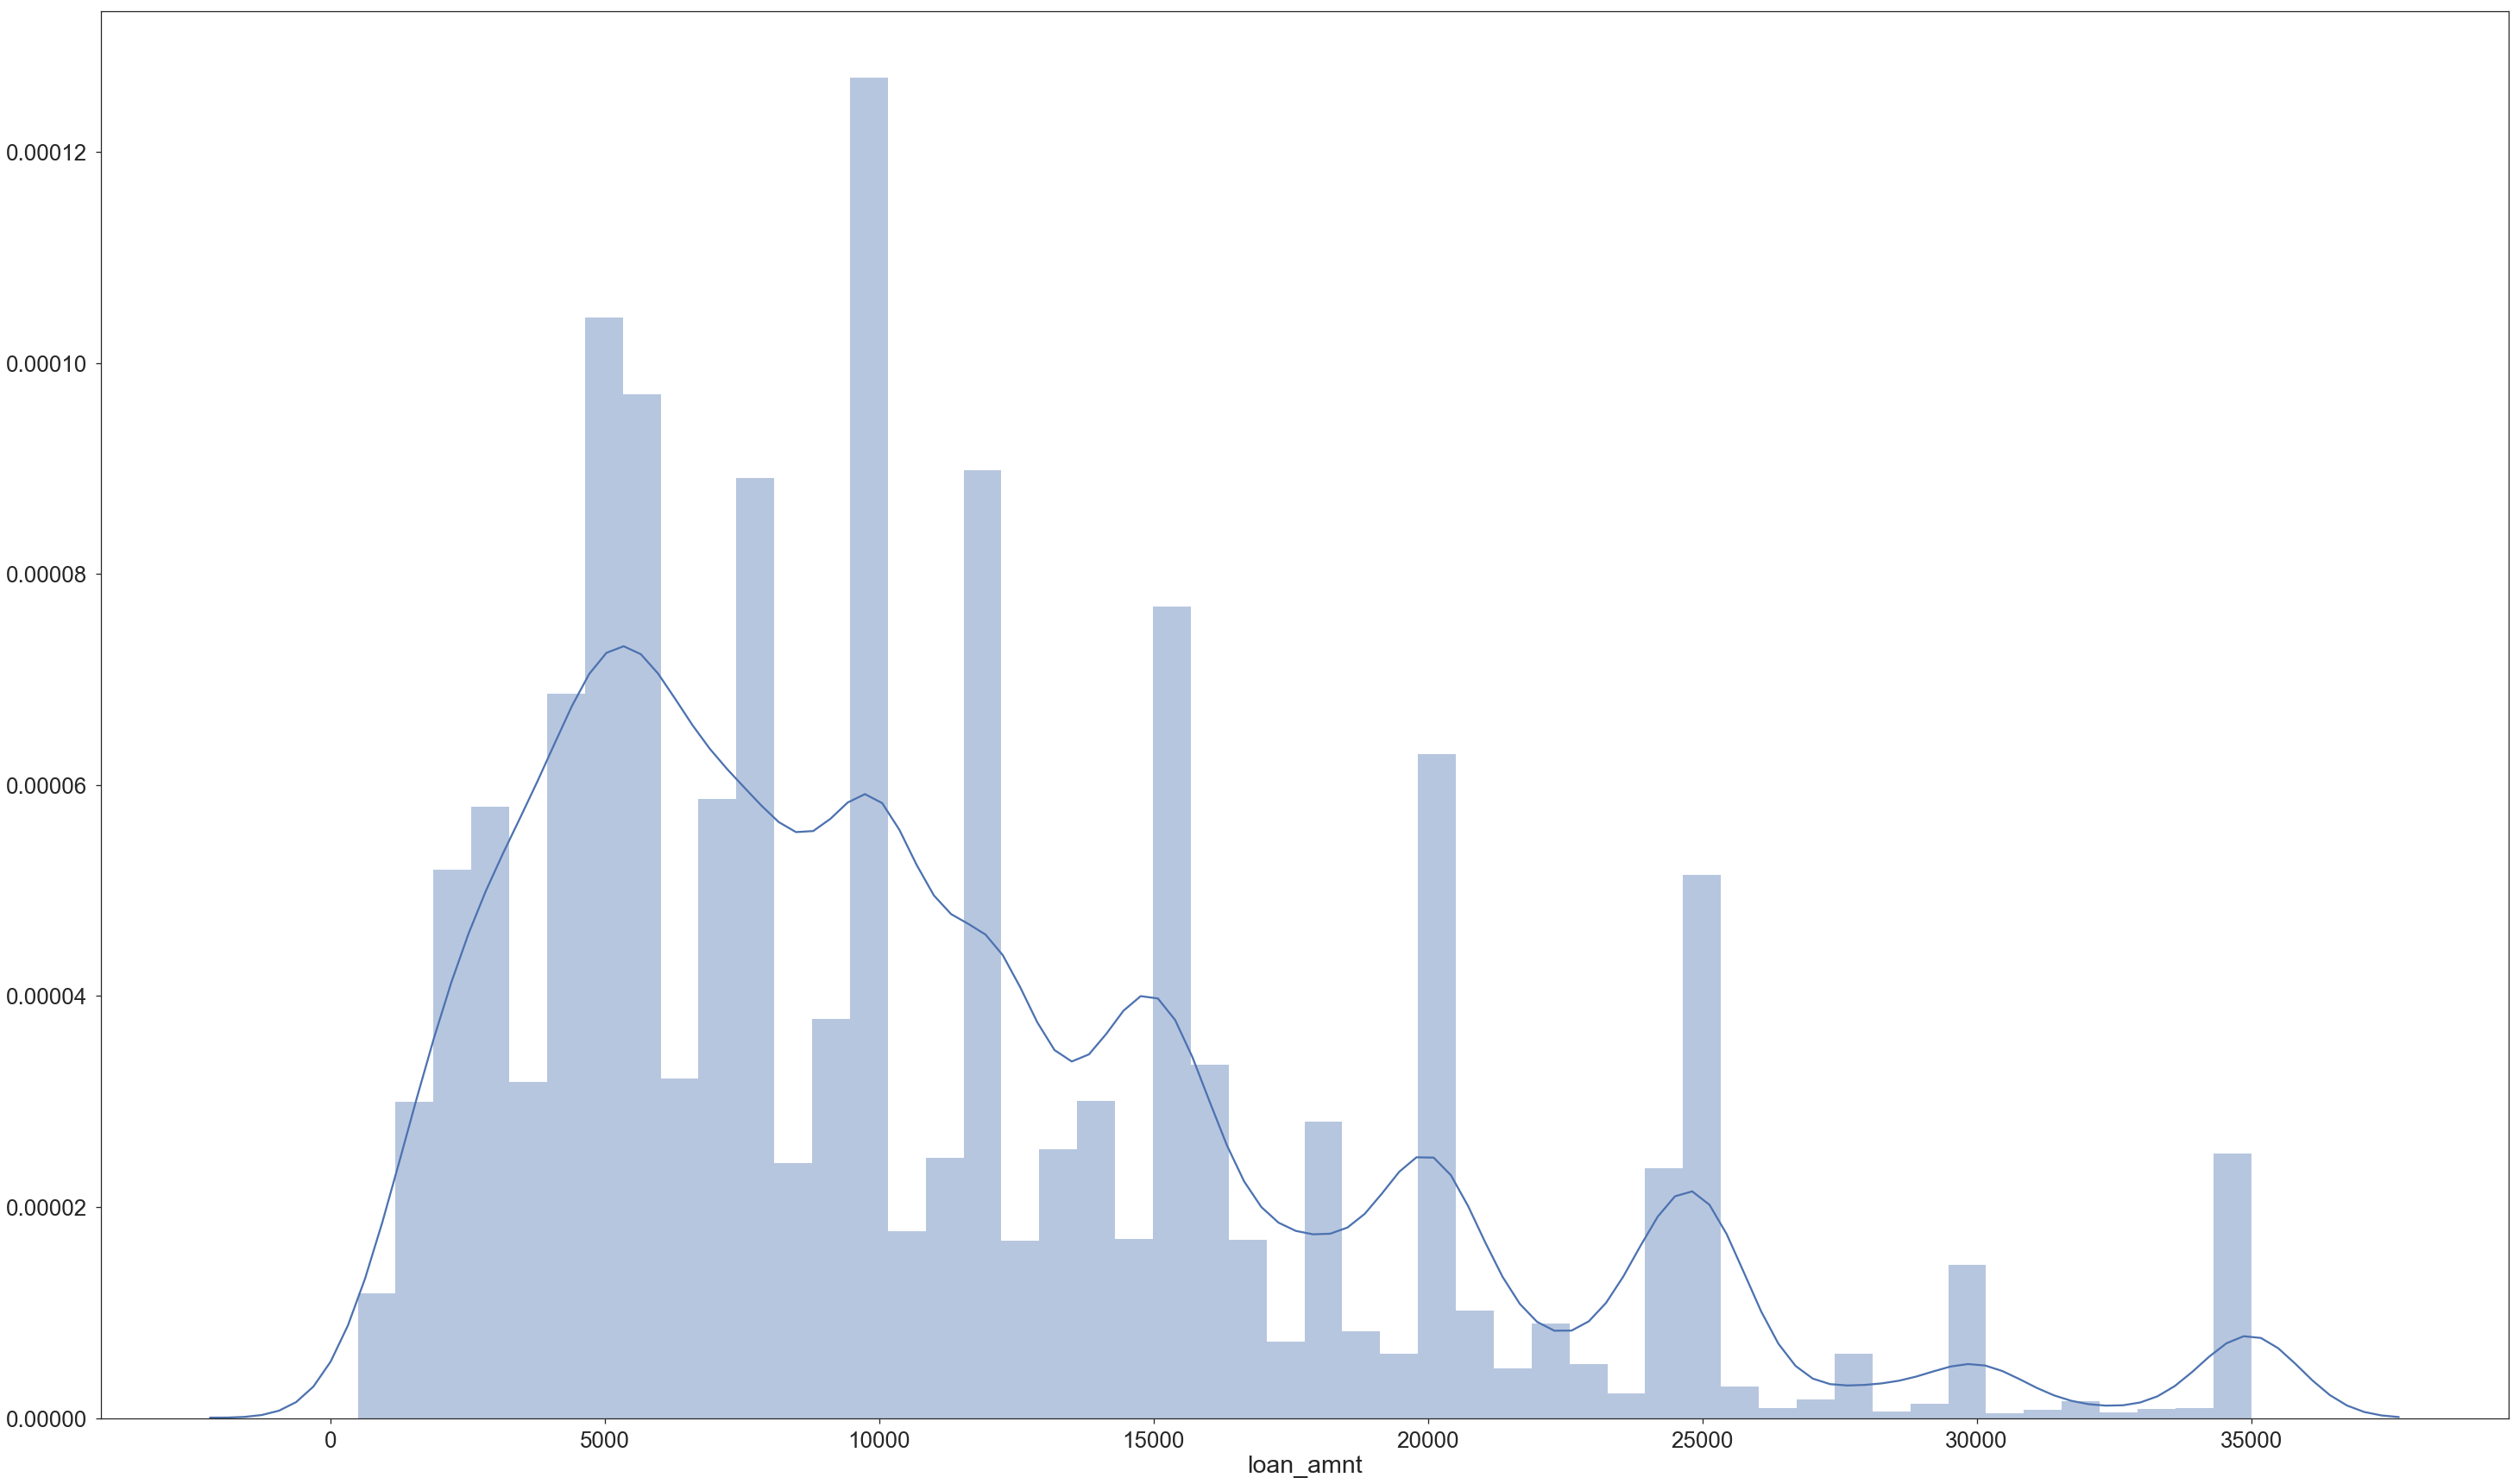

In [210]:
## Observing distribuction on loan amount
Loan_nacol_rem_df['loan_amnt'].value_counts()
print(Loan_nacol_rem_df['loan_amnt'].describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.loan_amnt)
## We see spike on all rounded figures like 5k,10k etc

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


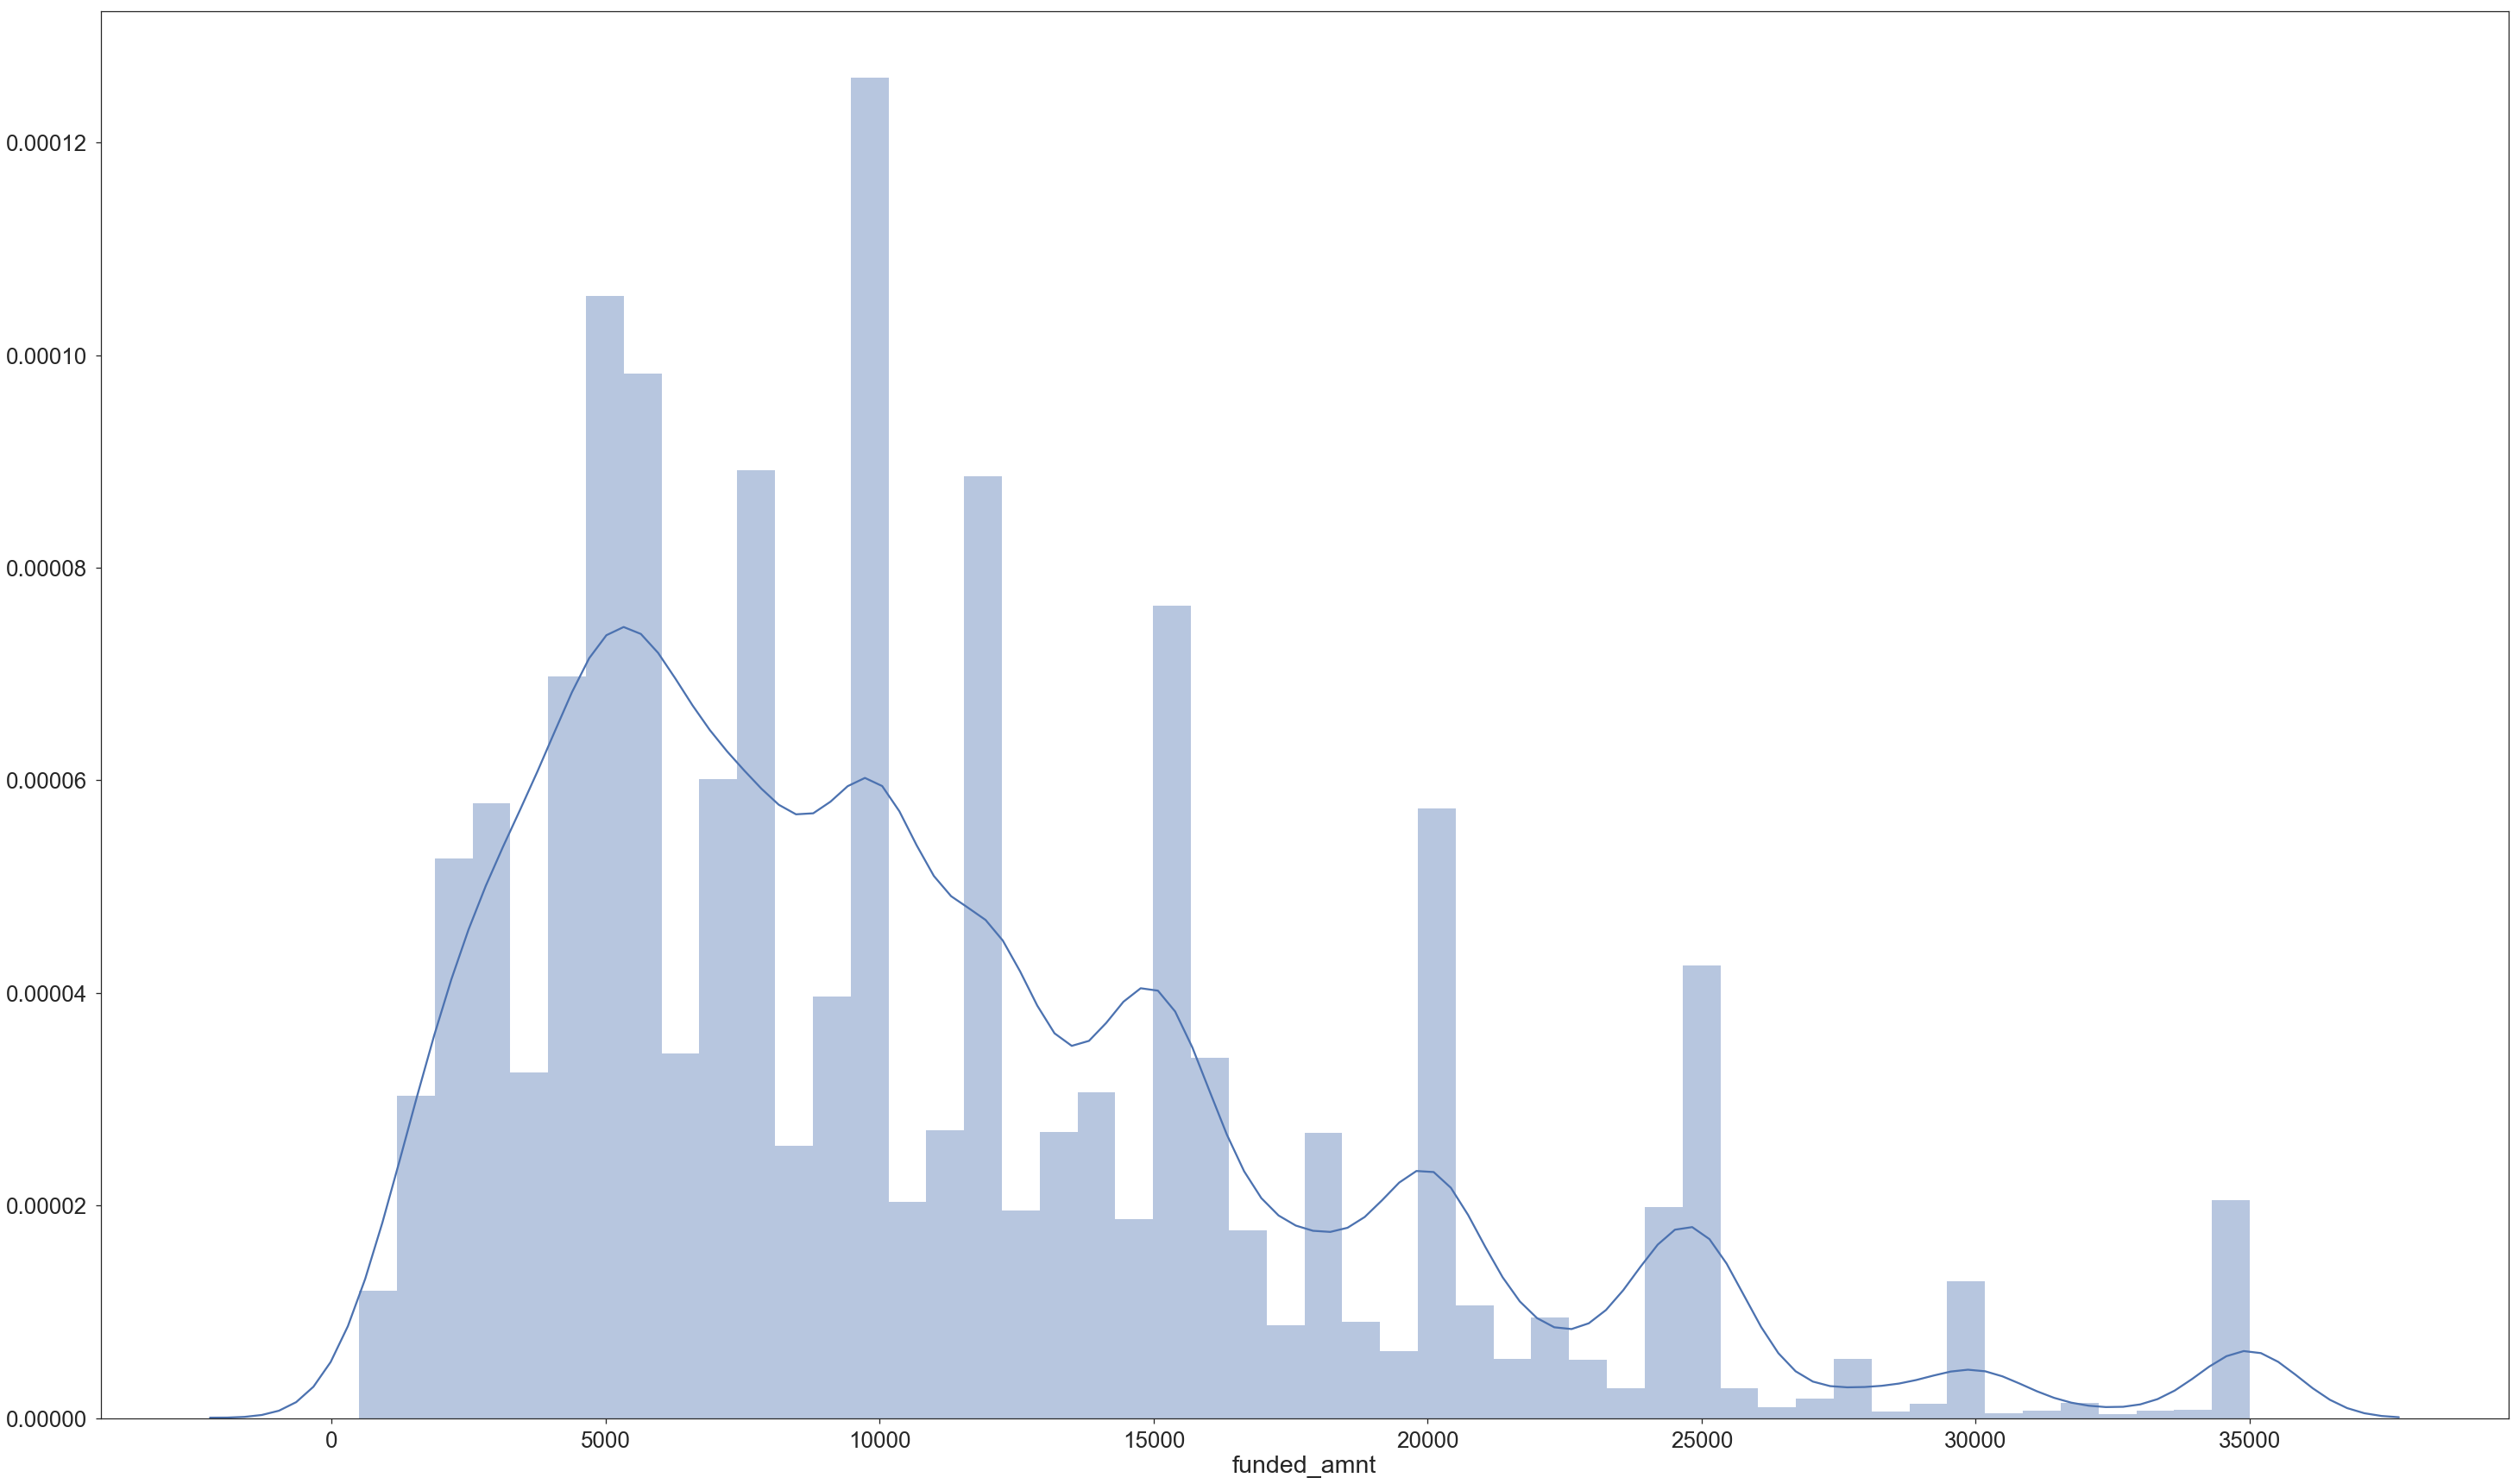

In [211]:
# Univariate Analysis on funded_amnt
print(Loan_nacol_rem_df.funded_amnt.describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.funded_amnt)
## We see spike on all rounded figures like 5k,10k etc

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64


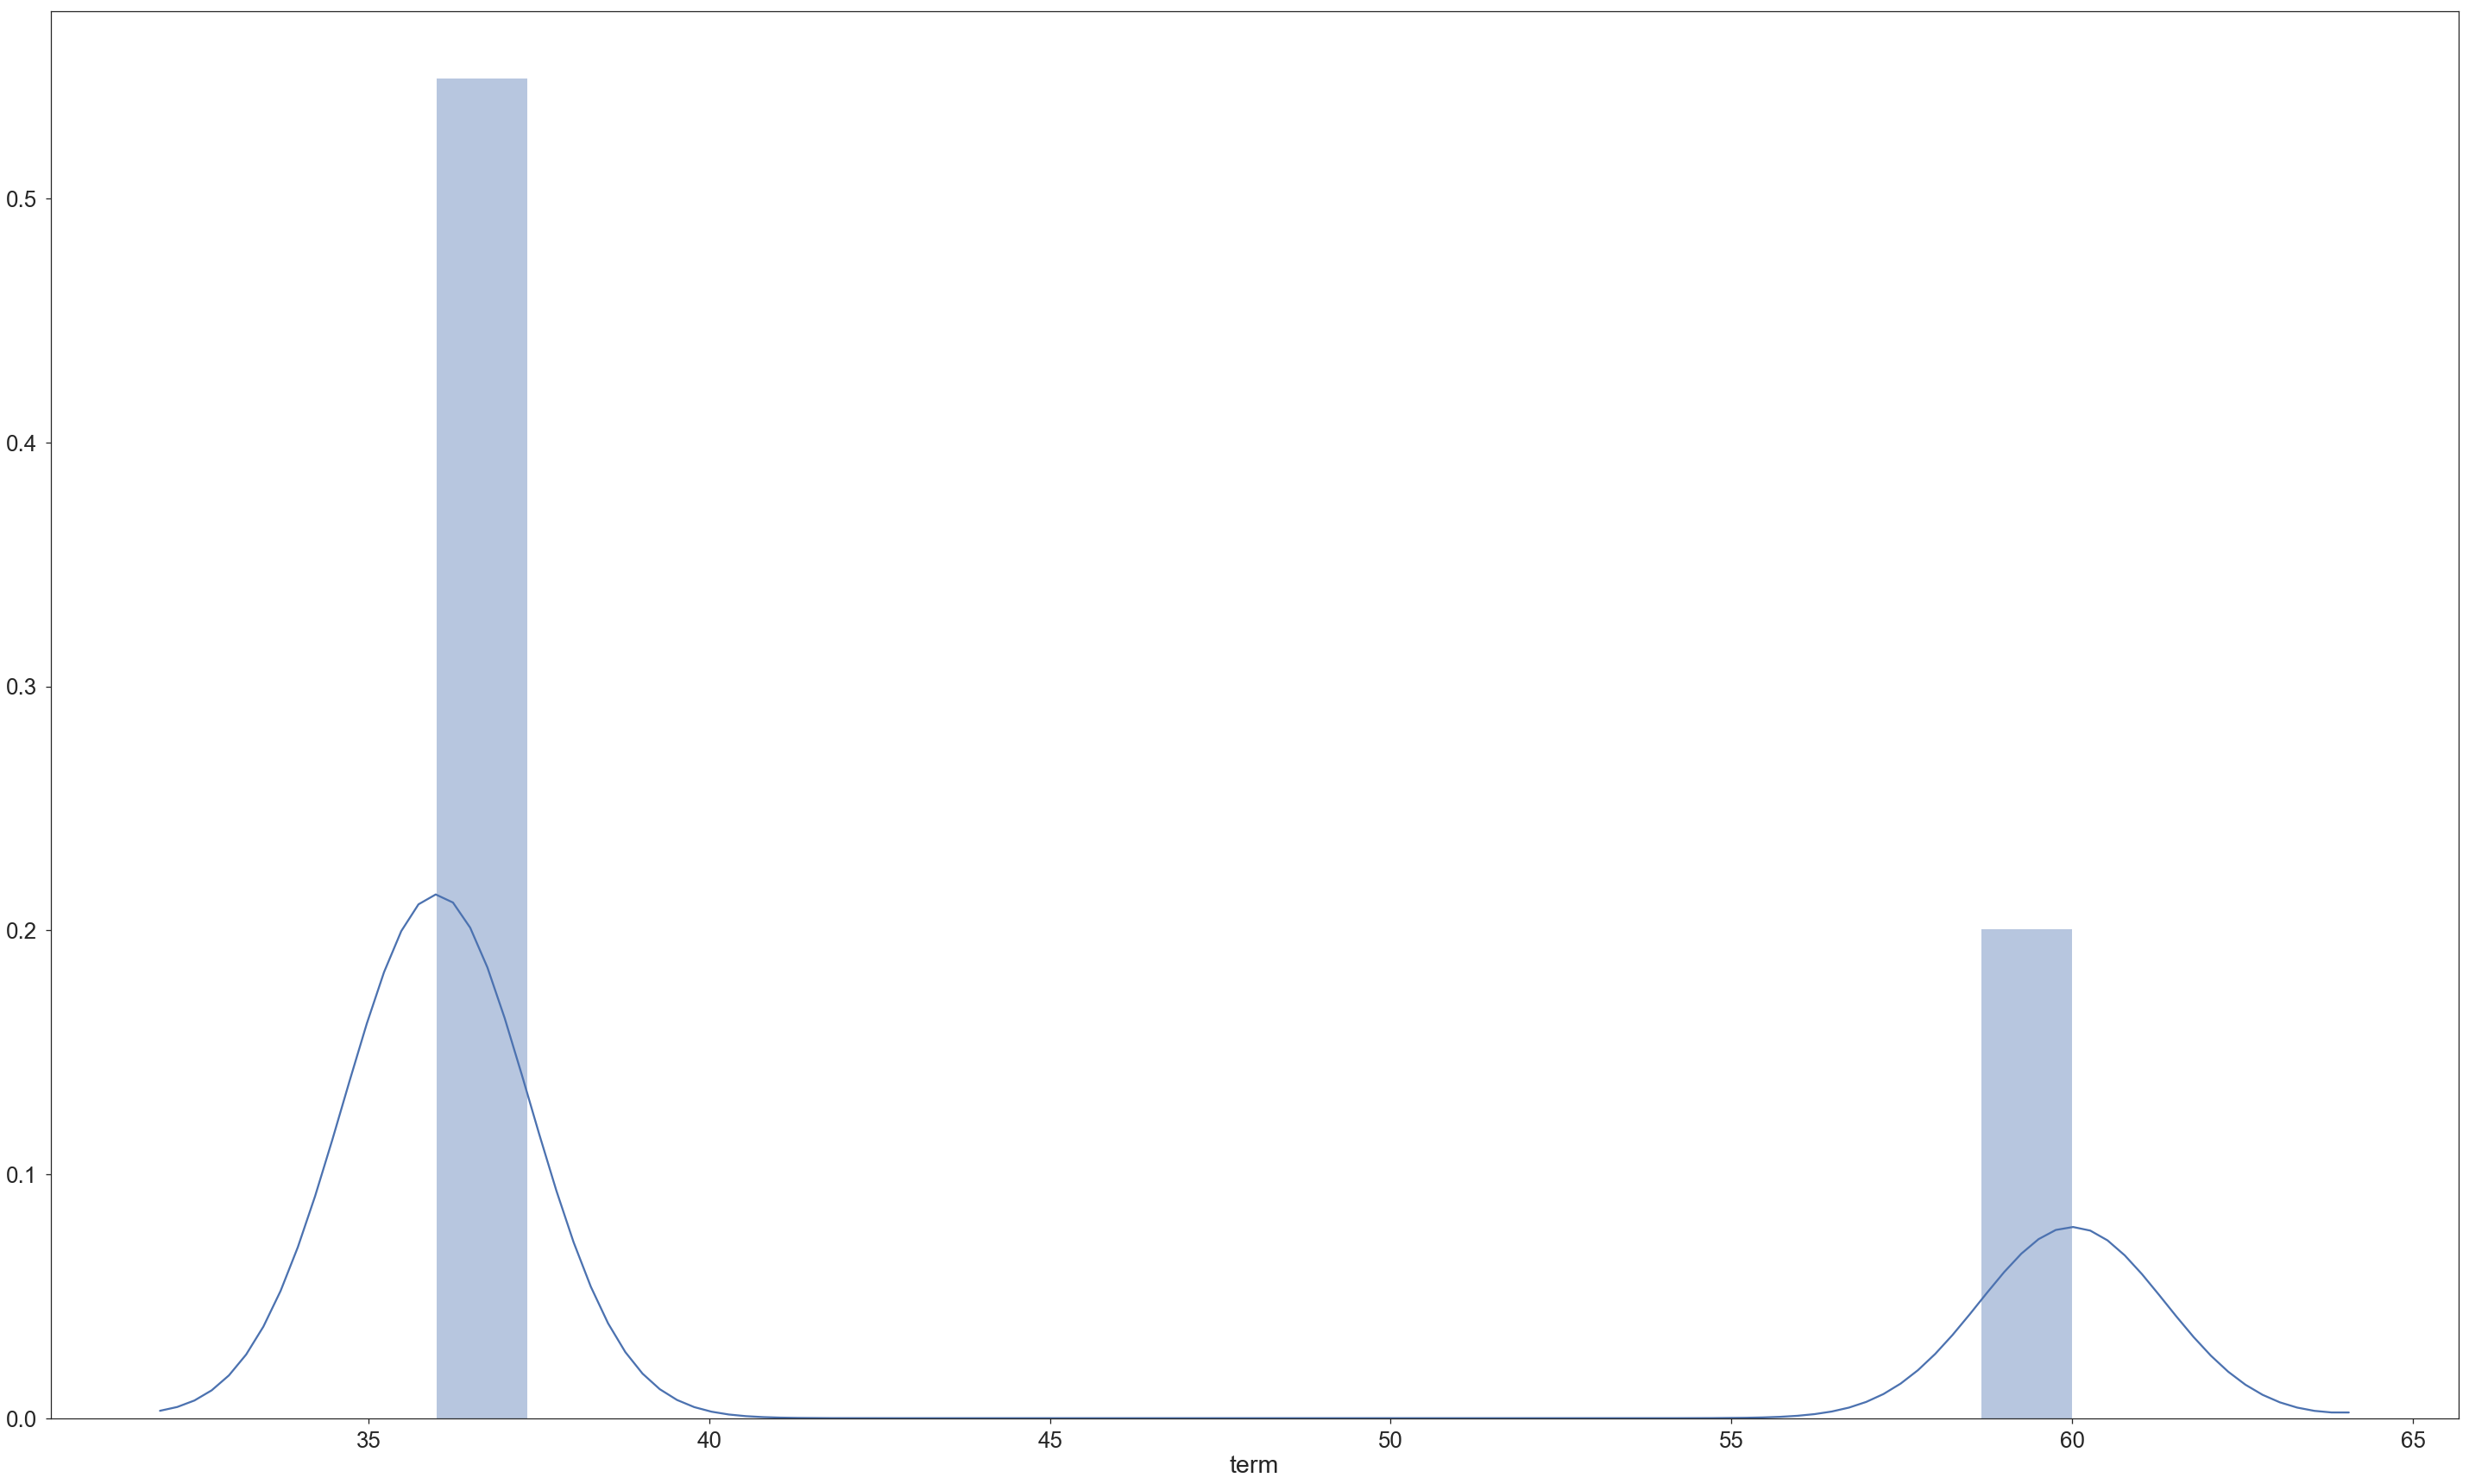

In [212]:
# Univariate Analysis on term
print(Loan_nacol_rem_df.term.describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.term) 

## Loan Applicant with 36 Year of Term is more than 60 Years of term

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


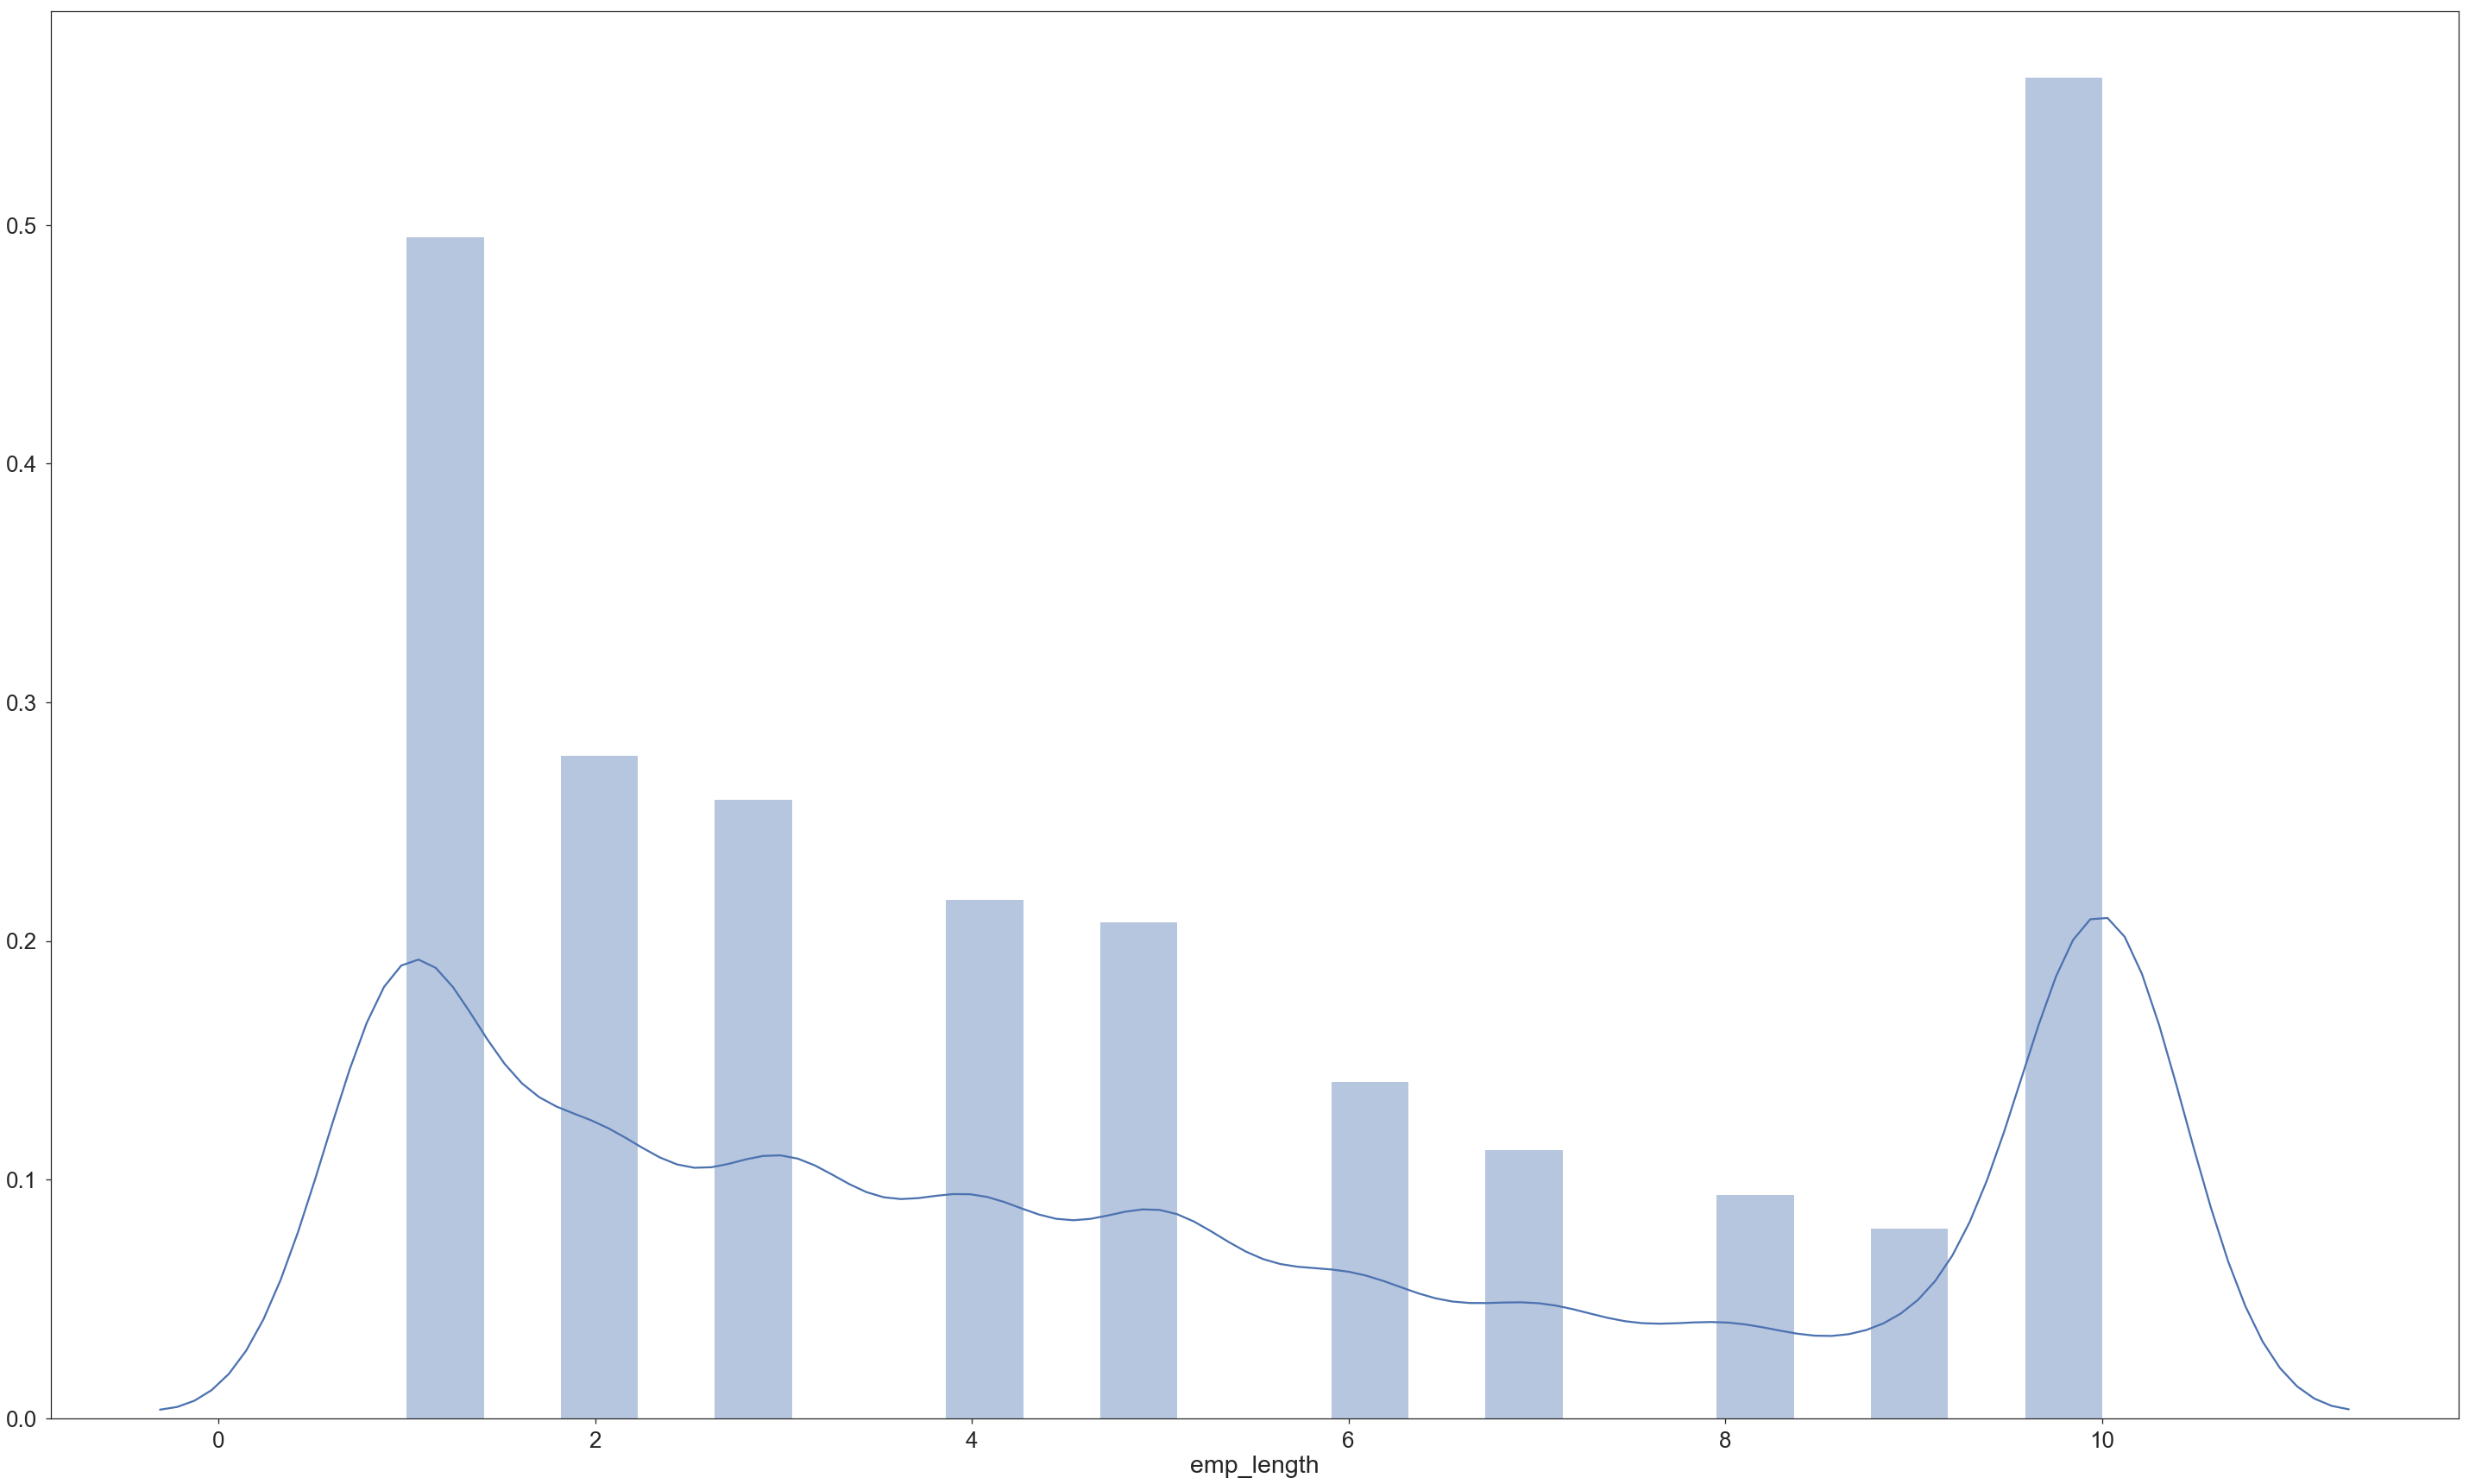

In [213]:
# Univariate Analysis on  emp_length 
print(Loan_nacol_rem_df.emp_length.describe())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.emp_length.dropna())

#Maximum applicant seems to be from 1 years and >10 years of experience, 
#We need to check from Bivariate on emp_length and loan_status to see if this age group are also in charged off( upcoming later)


count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


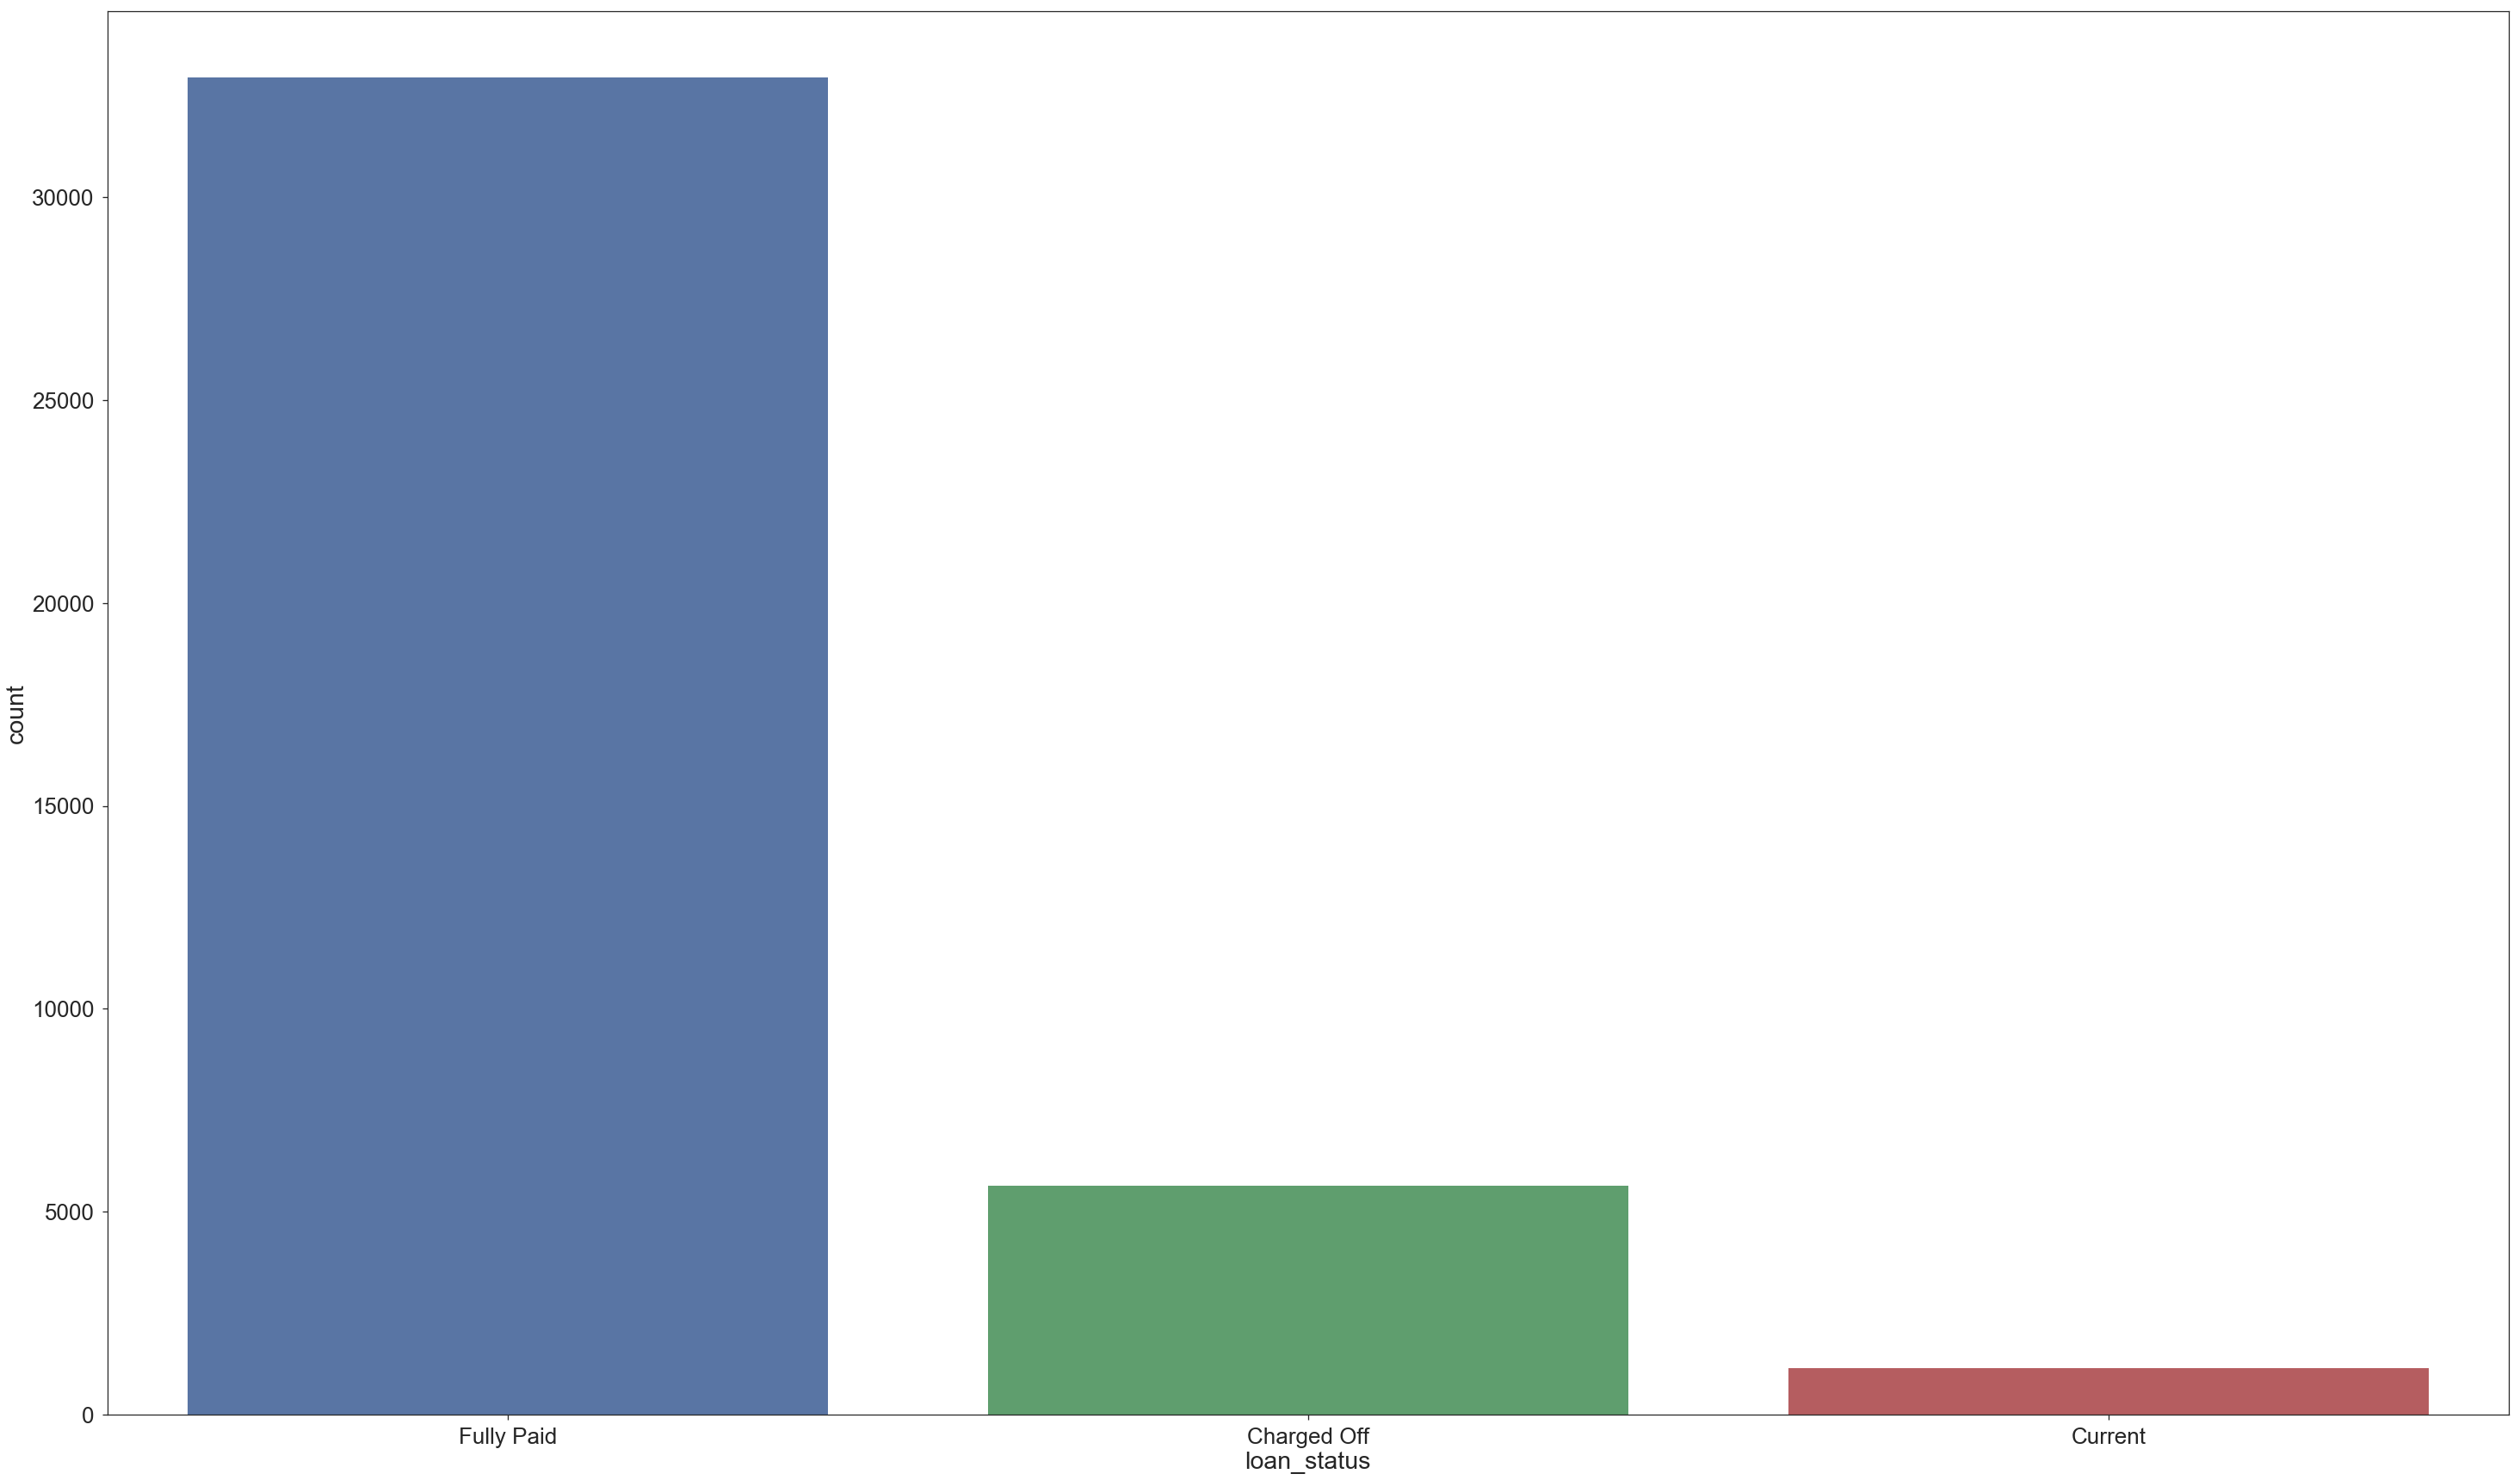

In [214]:
# Univariate Analysis on  loan_status 
print(Loan_nacol_rem_df.loan_status.describe())
print('')
print(Loan_nacol_rem_df.loan_status.value_counts())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.countplot(Loan_nacol_rem_df.loan_status)

# Majority of the Loan were Fully paid followed by Charged Off Account and Current Account

count                  39717
unique                    14
top       debt_consolidation
freq                   18641
Name: purpose, dtype: object

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

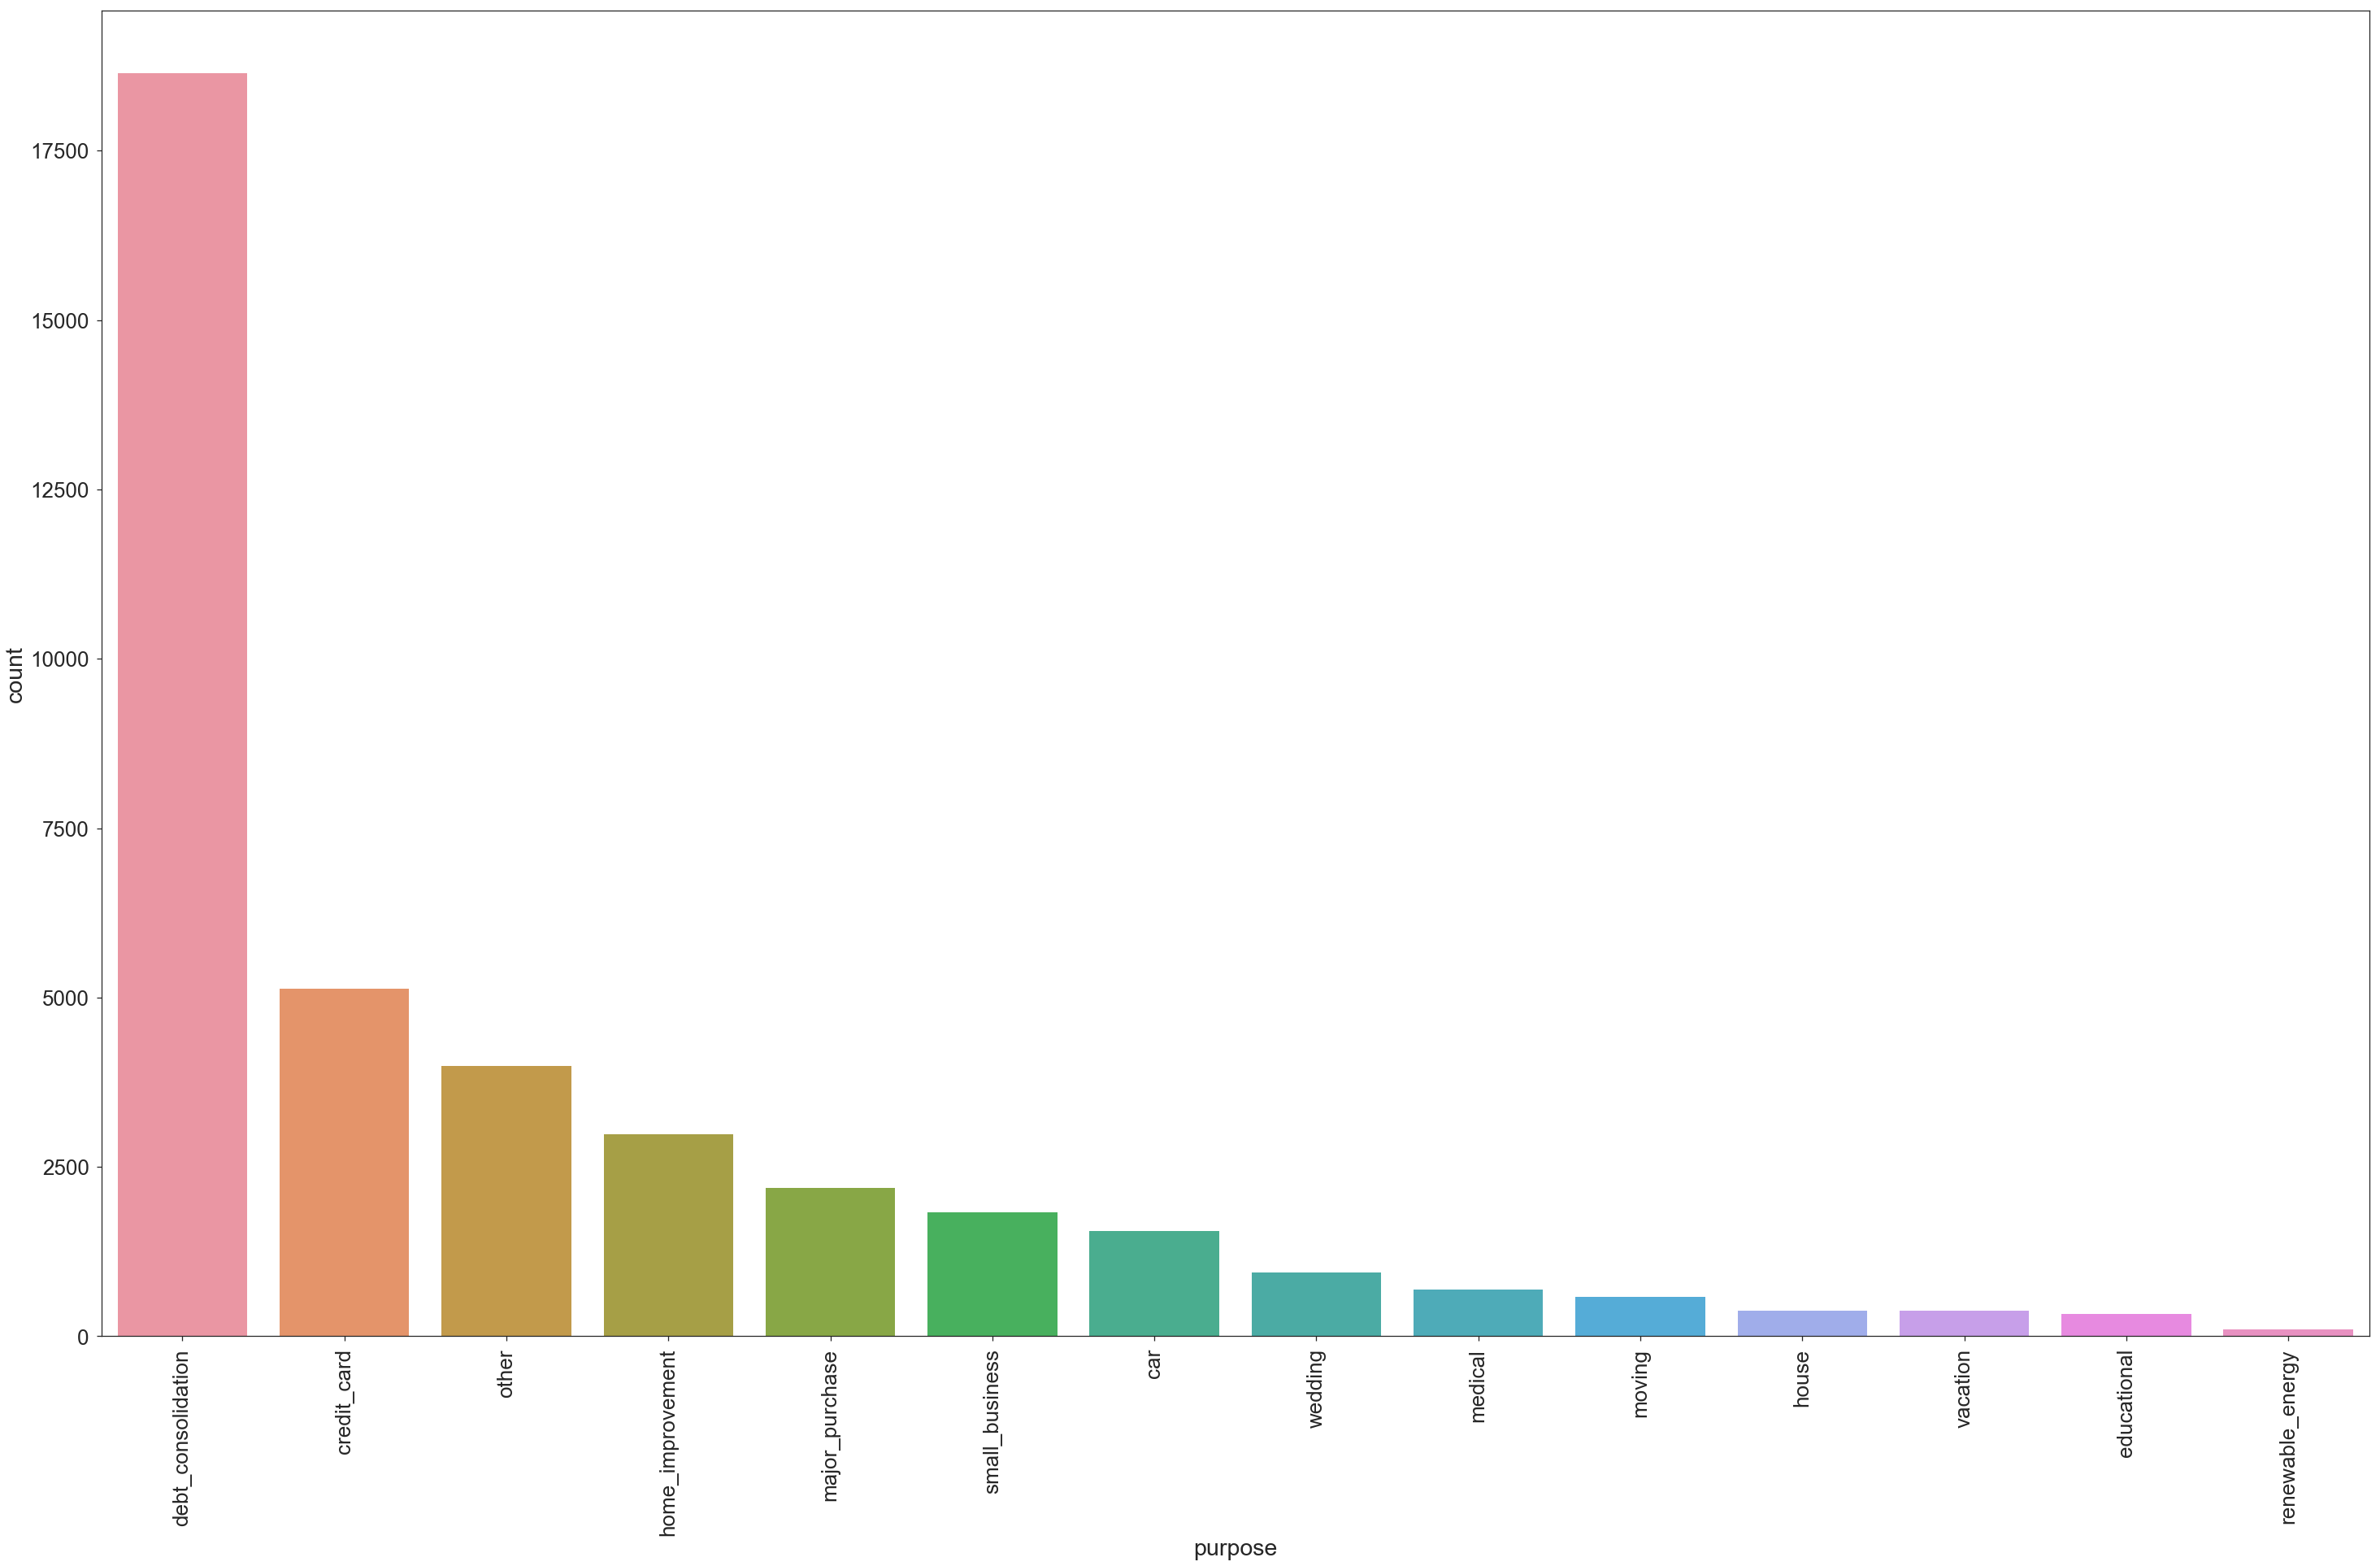

In [215]:
# Univariate Analysis on purpose
print(Loan_nacol_rem_df.purpose.describe())
print('')
print(Loan_nacol_rem_df.purpose.value_counts())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.countplot(Loan_nacol_rem_df.purpose,order=Loan_nacol_rem_df['purpose'].value_counts().index)
plt.xticks(rotation= 90)

# Debt consolidation is having maximum number of applicants

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64



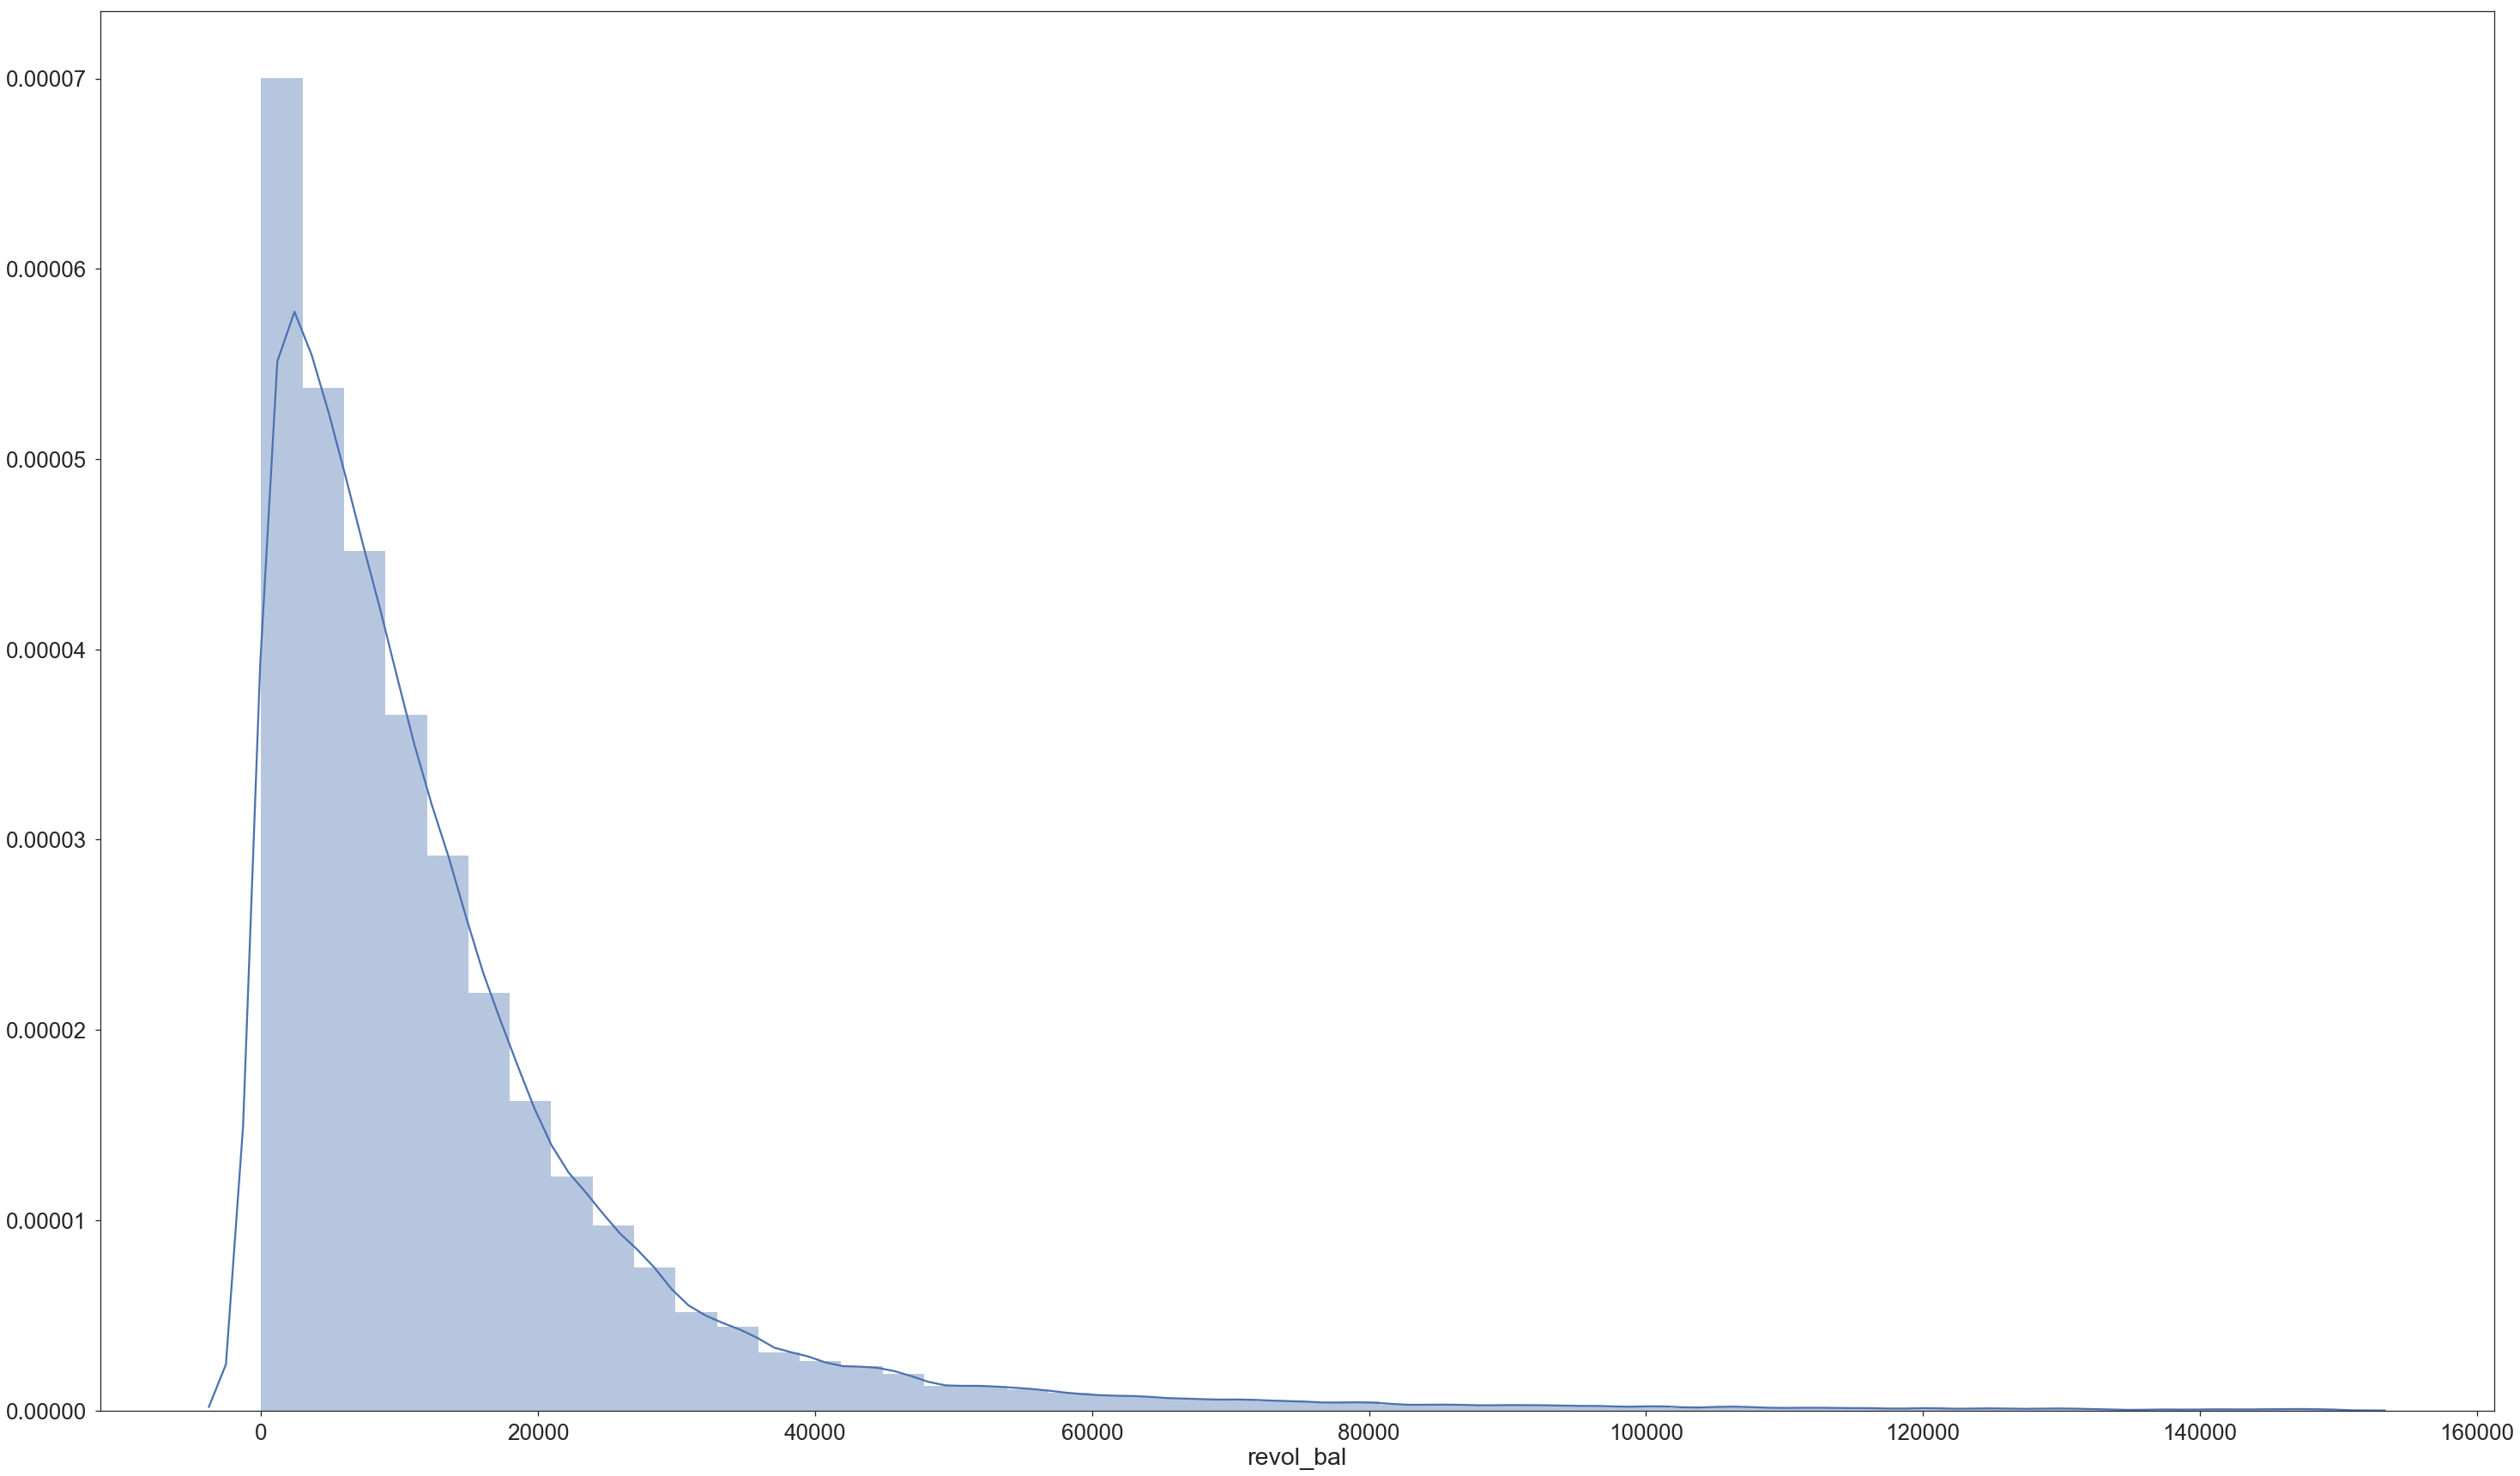

In [216]:
#Univariate Analysis on revol_bal
print(Loan_nacol_rem_df.revol_bal.describe())
print('')
Loan_nacol_rem_df['revol_bal']
#print(Loan_nacol_rem_df.revol_bal.value_counts())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.revol_bal)
plt.show()
# revol_bal is not normally distributed can be seen right skewness in graph which shows maximum people are in range of o to 20000

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64



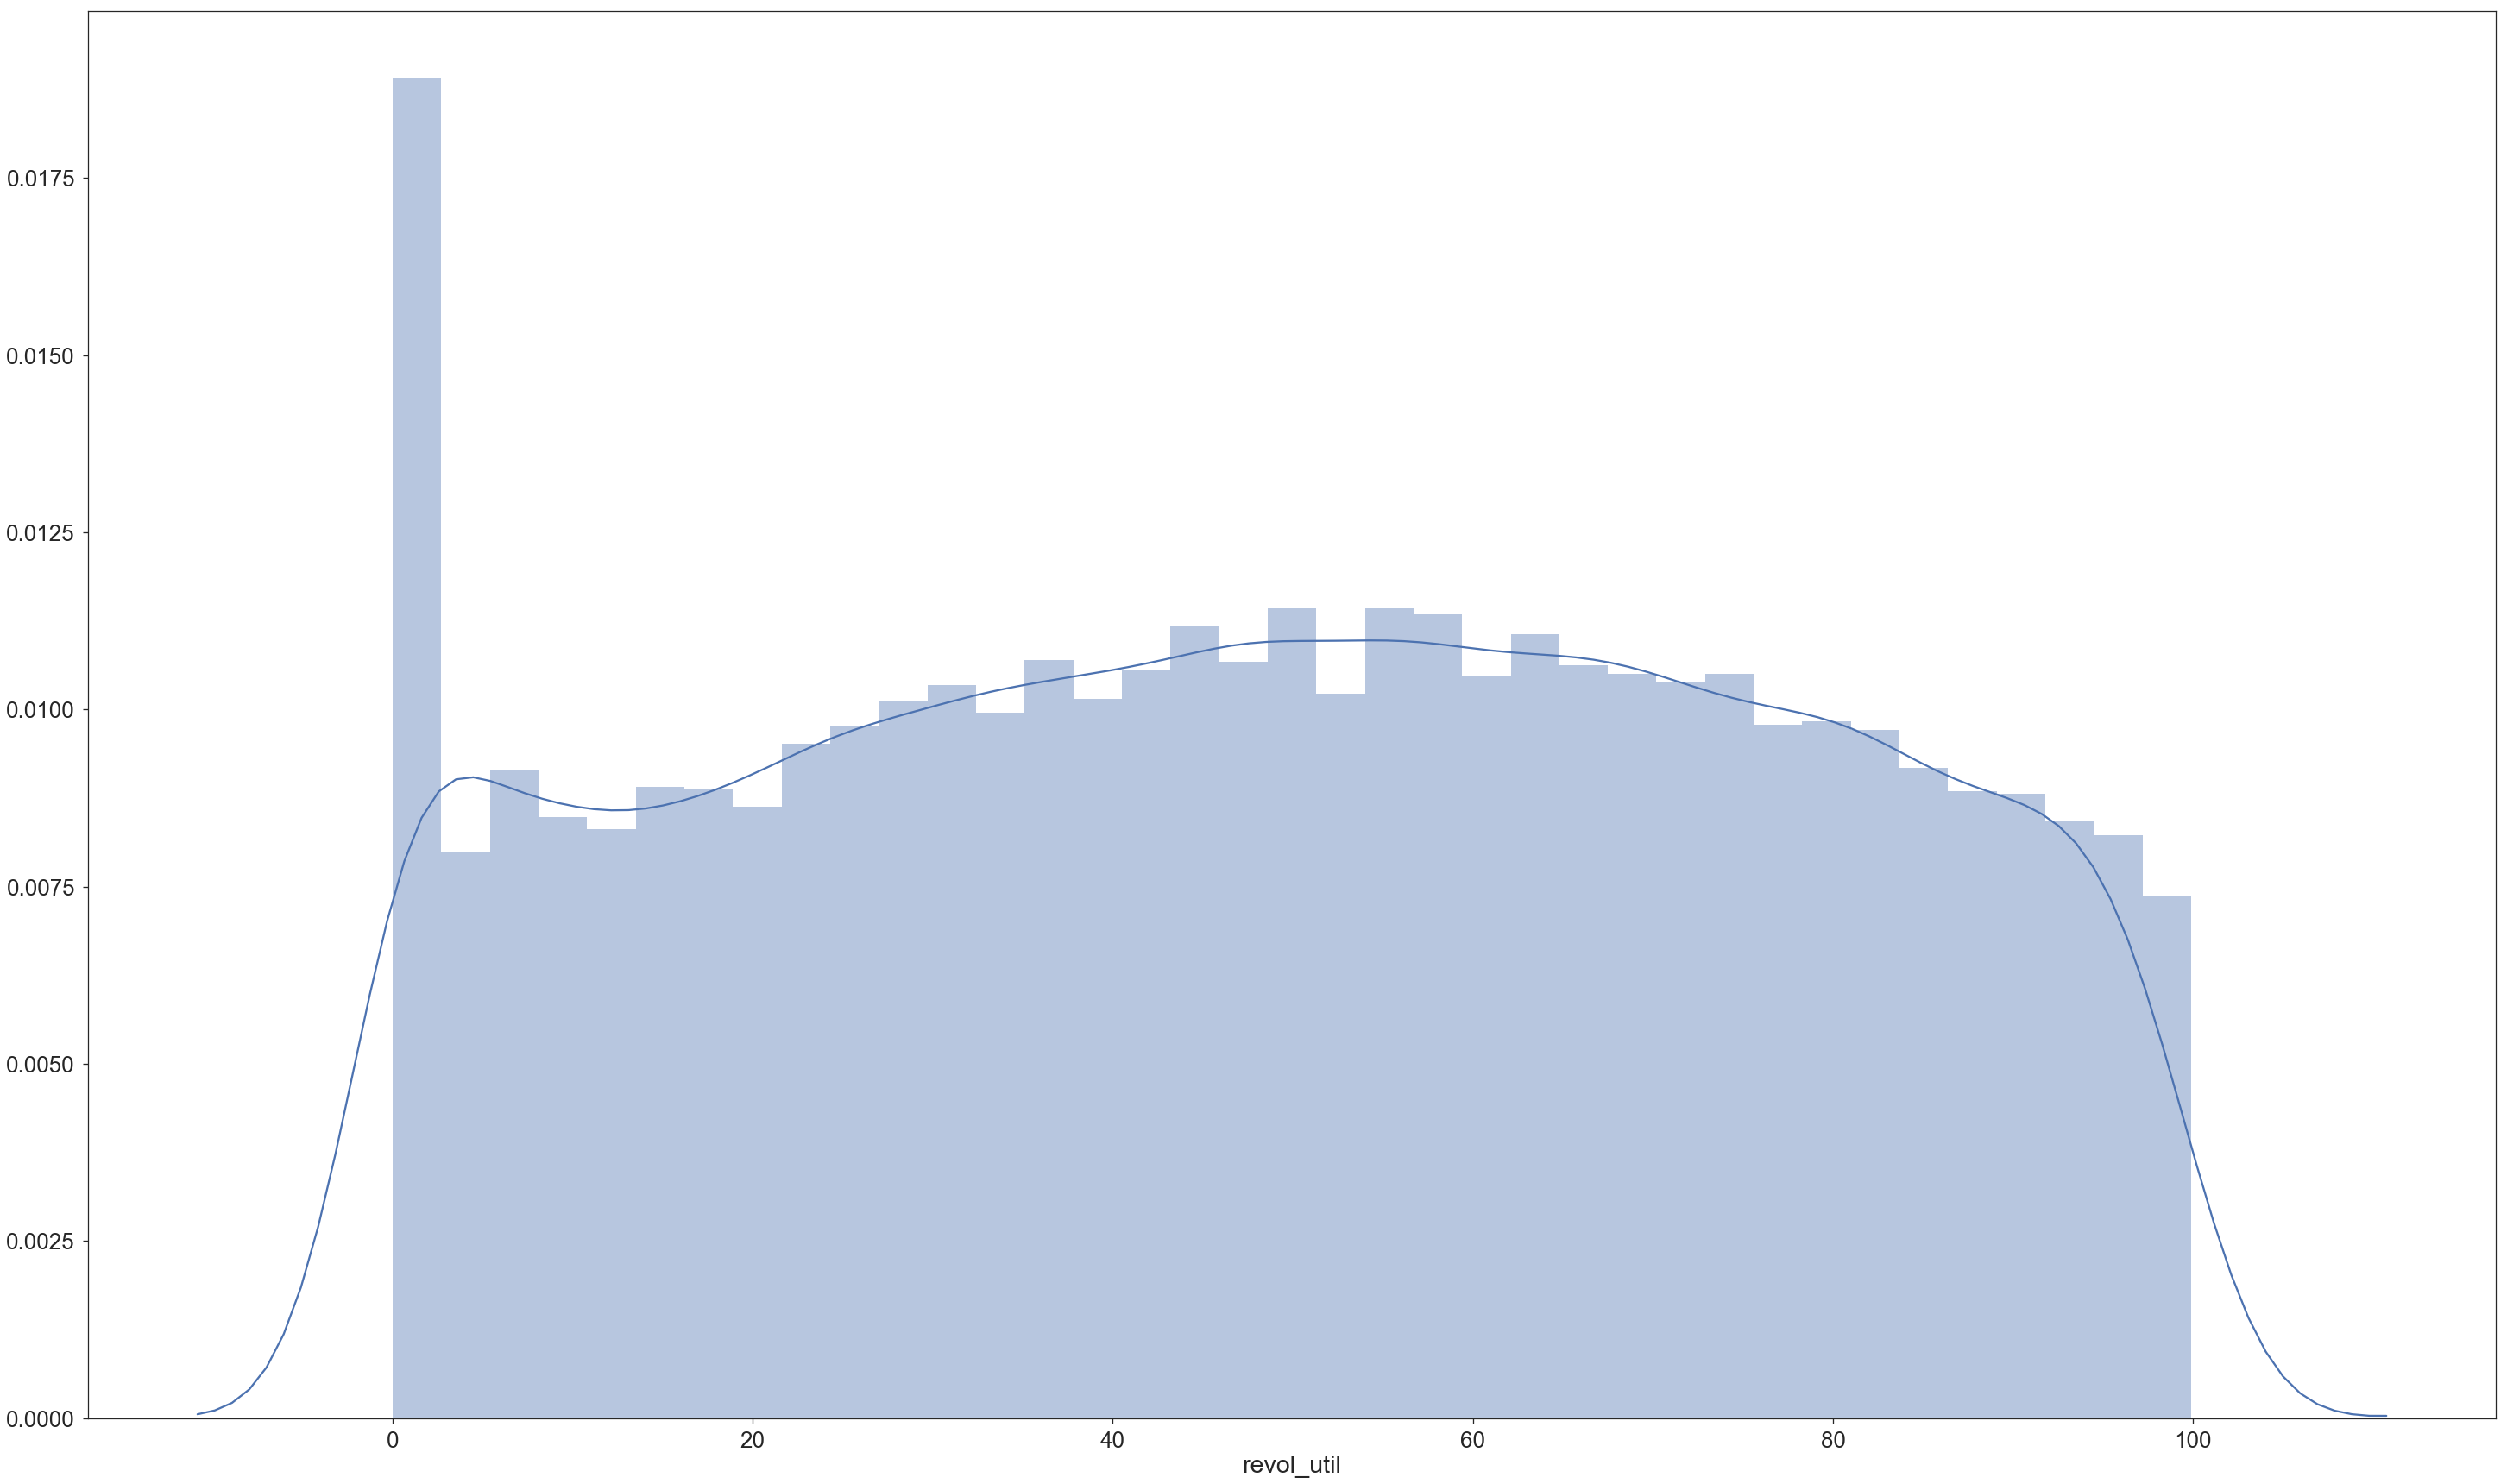

In [217]:
#Univariate Analysis on revol_util
print(Loan_nacol_rem_df.revol_util.describe())
print('')
Loan_nacol_rem_df['revol_util']
#print(Loan_nacol_rem_df.revol_bal.value_counts())
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(50,30))
grph=sns.distplot(Loan_nacol_rem_df.revol_util)
# revol_unti is normally distributed and mean and median are almost same

In [218]:
## Checking bad data if % >100
Loan_nacol_rem_df[Loan_nacol_rem_df.revol_util>100][['id','loan_amnt','revol_bal' ,'revol_util']]

Empty DataFrame
Columns: [id, loan_amnt, revol_bal, revol_util]
Index: []

## Bivariate analysis starts from here

In [219]:
#Bivarriate Analysis on Loan_status, dti,anual Inc and revol_util
df=Loan_nacol_rem_df[['loan_status','dti','annual_inc','revol_util']]
df_grp=df.groupby('loan_status').agg({'dti':['mean','median'],'annual_inc':['mean','median'],'revol_util':['mean','median']})
df_grp
#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

dti           annual_inc          revol_util       
                  mean median          mean   median       mean median
loan_status                                                           
Charged Off  14.000624  14.29  62427.298034  53000.0  55.414095  58.20
Current      14.750009  15.05  75430.665105  65000.0  53.204482  54.95
Fully Paid   13.148421  13.20  69862.503328  60000.0  47.482755  47.50

        emp_length
count  5399.000000
mean      5.199296
std       3.445429
min       1.000000
25%       2.000000
50%       5.000000
75%       9.000000
max      10.000000


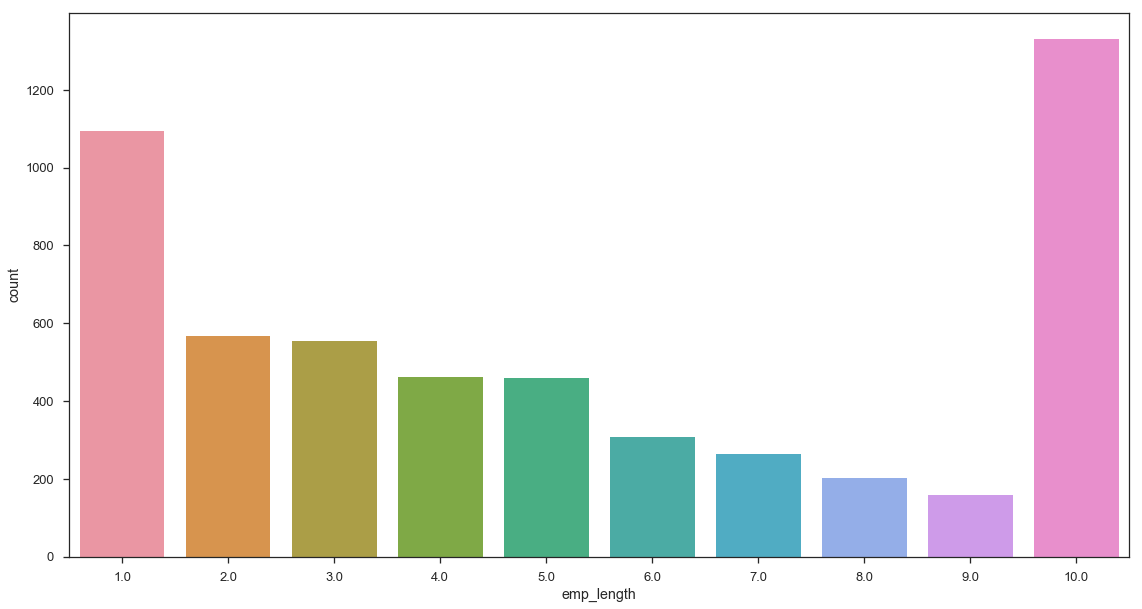

In [220]:
#Bivariate on emp_length and loan_status
df=Loan_nacol_rem_df[['loan_status','emp_length']]
df=df[df.loan_status=='Charged Off']
sns.set_context("talk", font_scale=1)
f = plt.figure(figsize=(19,10))
print(df.describe())
sns.countplot(df['emp_length'])

# We can see from below graph that Maximum charged off accounts are from-
#-people who is having emp_length of 1 year or 10or greater than 10 years

         emp_length
count  38642.000000
mean       5.092050
std        3.408338
min        1.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       10.000000


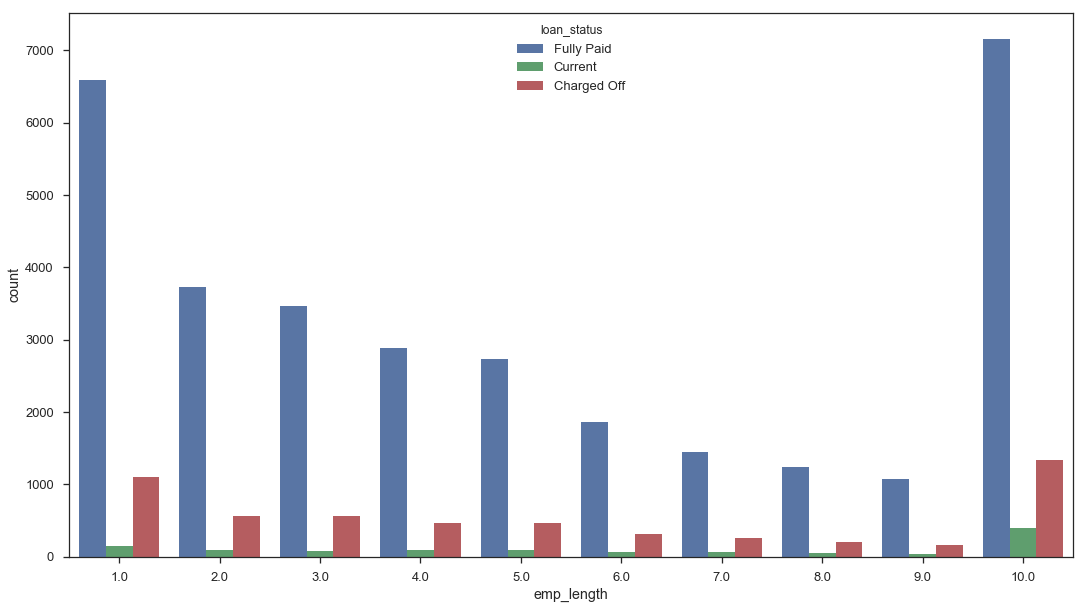

In [221]:
#Bivariate on emp_length and loan_status
df=Loan_nacol_rem_df[['loan_status','emp_length']]
##df=df[df.loan_status=='Fully Paid']
sns.set_context("talk", font_scale=1)
f = plt.figure(figsize=(18,10))
print(df.describe())

sns.countplot(x='emp_length', hue='loan_status', data=df ,hue_order=['Fully Paid','Current', 'Charged Off'])

#We can see from below graph that Maximum Fully Paid,Charged off accounts are from
#people who is having emp_length of 1 year or 10or greater than 10 years. 
#So this means there are more people in these range taking loans so freq is high in both status Fully Paid,Charged off,Current.

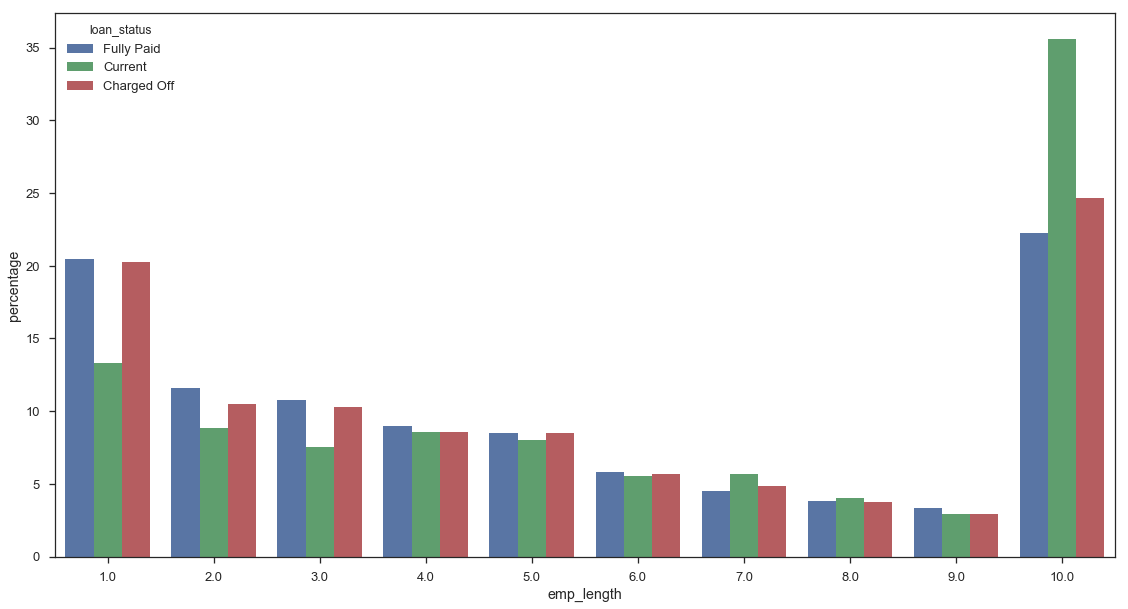

In [222]:
###Bivariate on emp_length and loan_status with grouped percentage
df1=df.groupby(['loan_status','emp_length']).size()
df2=df1.groupby(level=[0]).apply(lambda x:x/x.sum()*100)
newdf2=df2.reset_index(name='percentage')
newdf2
f = plt.figure(figsize=(19,10))
sns.barplot(x='emp_length',y='percentage', hue='loan_status', data=newdf2 ,hue_order=['Fully Paid','Current', 'Charged Off'])

#Compared to status Fully Paid,Charged off,Current in diffrent years of emp_length it seem there are more charged off in near mean and >10 Years  

               term      int_rate
count  39717.000000  39717.000000
mean      42.418007     12.021177
std       10.622815      3.724825
min       36.000000      5.420000
25%       36.000000      9.250000
50%       36.000000     11.860000
75%       60.000000     14.590000
max       60.000000     24.590000


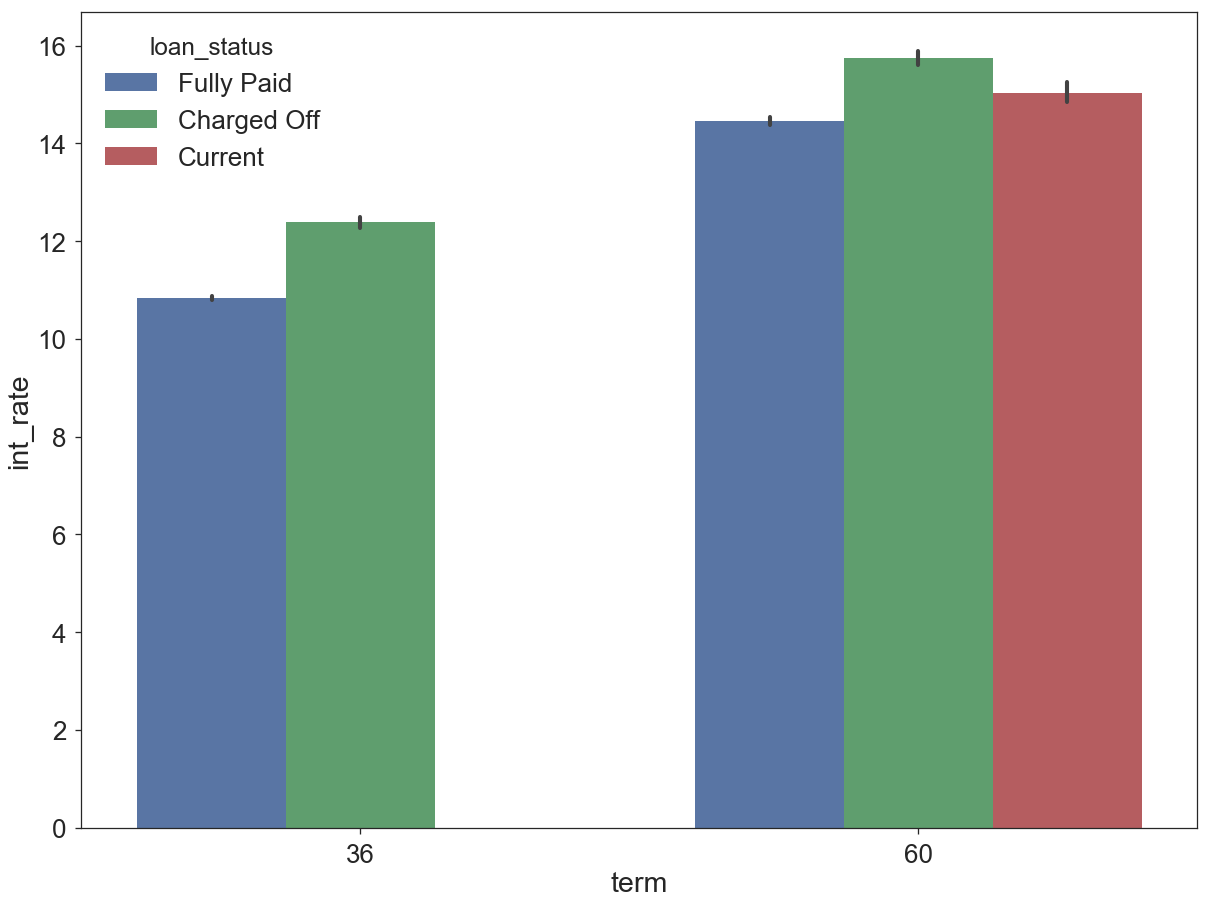

In [223]:
#bivariate analysis on term and Rate of Interest and loan_status
df=Loan_nacol_rem_df[['term','int_rate','loan_status']]
df.groupby('term').mean()
sns.set_context("talk", font_scale=2)
f = plt.figure(figsize=(20,15))
print(df.describe())
grph=sns.barplot(x=df.term,y=df.int_rate,hue=df.loan_status)

# We can see from below table and graph that higher the term higher the interest rates.

         revol_util      int_rate
count  39717.000000  39717.000000
mean      48.770677     12.021177
std       28.367689      3.724825
min        0.000000      5.420000
25%       25.300000      9.250000
50%       49.200000     11.860000
75%       72.300000     14.590000
max       99.900000     24.590000


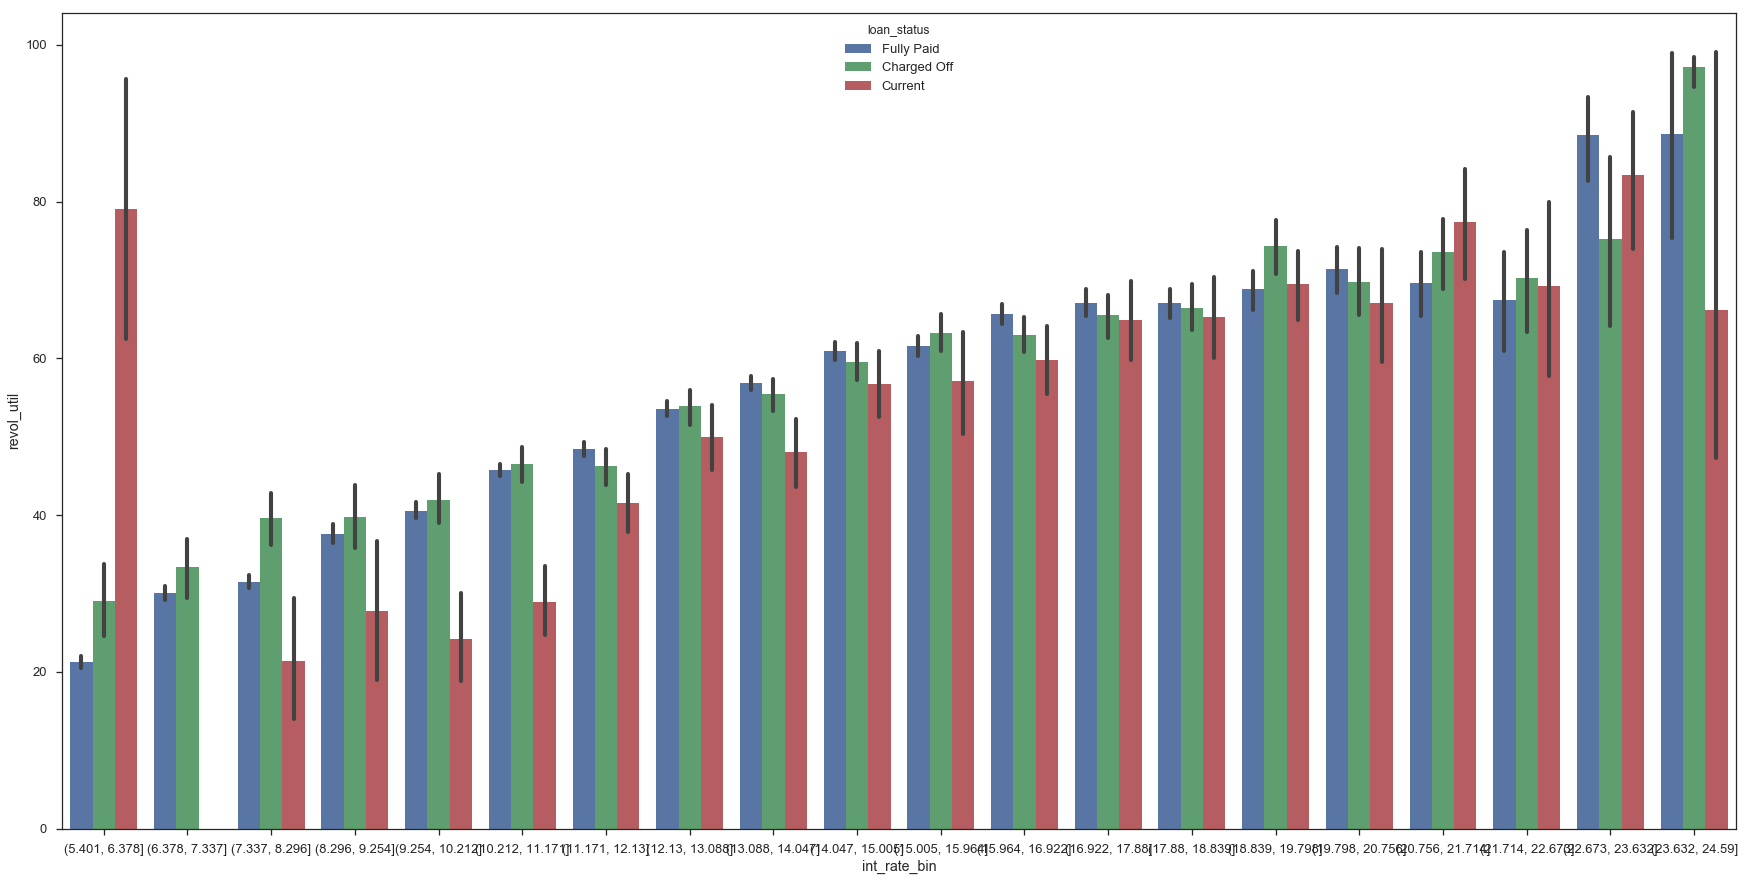

In [224]:
#bivariate analysis on term and Rate of Interest and loan_status
df=Loan_nacol_rem_df[['revol_util','int_rate','loan_status']]
df.groupby('loan_status').mean()
sns.set_context("talk", font_scale=1)
f = plt.figure(figsize=(30,15))
df['int_rate_bin']=pd.cut(df.int_rate,20)
print(df.describe())
grph=sns.barplot(x=df.int_rate_bin,y=df.revol_util,hue=df.loan_status,)

# We can see from below table and graph that higher the term higher the interest rates.

### Identifying the various Loan Purpose categories where we have greater than 90% loan amount got sanctioned

In [225]:
loan_purpose_analysis=Loan_nacol_rem_df.copy()

temp_df=loan_purpose_analysis[['purpose','funded_amnt','loan_amnt','int_rate']]

temp_dfgrp=temp_df.groupby('purpose').sum().sort_values(by='funded_amnt',ascending=False).reset_index()

sumtotal=temp_dfgrp['funded_amnt'].sum()

temp_dfgrp['percent_contribution']=temp_dfgrp['funded_amnt'].apply(lambda x: 100*(x/sumtotal))

print(temp_dfgrp)
print('')
temp_dfgrp[0:6]['percent_contribution'].sum()


               purpose  funded_amnt  loan_amnt   int_rate  \
0   debt_consolidation    230937800  236647300  232786.76   
1          credit_card     58749550   60142150   60027.02   
2     home_improvement     33392050   34334725   33927.19   
3                other     31517000   32213975   47177.74   
4       small_business     23792875   24800975   23780.54   
5       major_purchase     17430925   17835925   23713.78   
6                  car     10400450   10498375   16311.12   
7              wedding      9236050    9352600   11255.61   
8              medical      5615650    5726725    7964.04   
9                house      4843500    4980050    4658.92   
10              moving      3793550    3877050    6741.59   
11         educational      2174925    2213400    3786.52   
12            vacation      2049575    2081525    4136.17   
13    renewable_energy       876425     897875    1178.07   

    percent_contribution  
0              53.112308  
1              13.511535  
2  

91.032842883848261

## Taking sum upto major_purchase (sum upto 91.03% of total fund value) to calculate to contribution of listed above

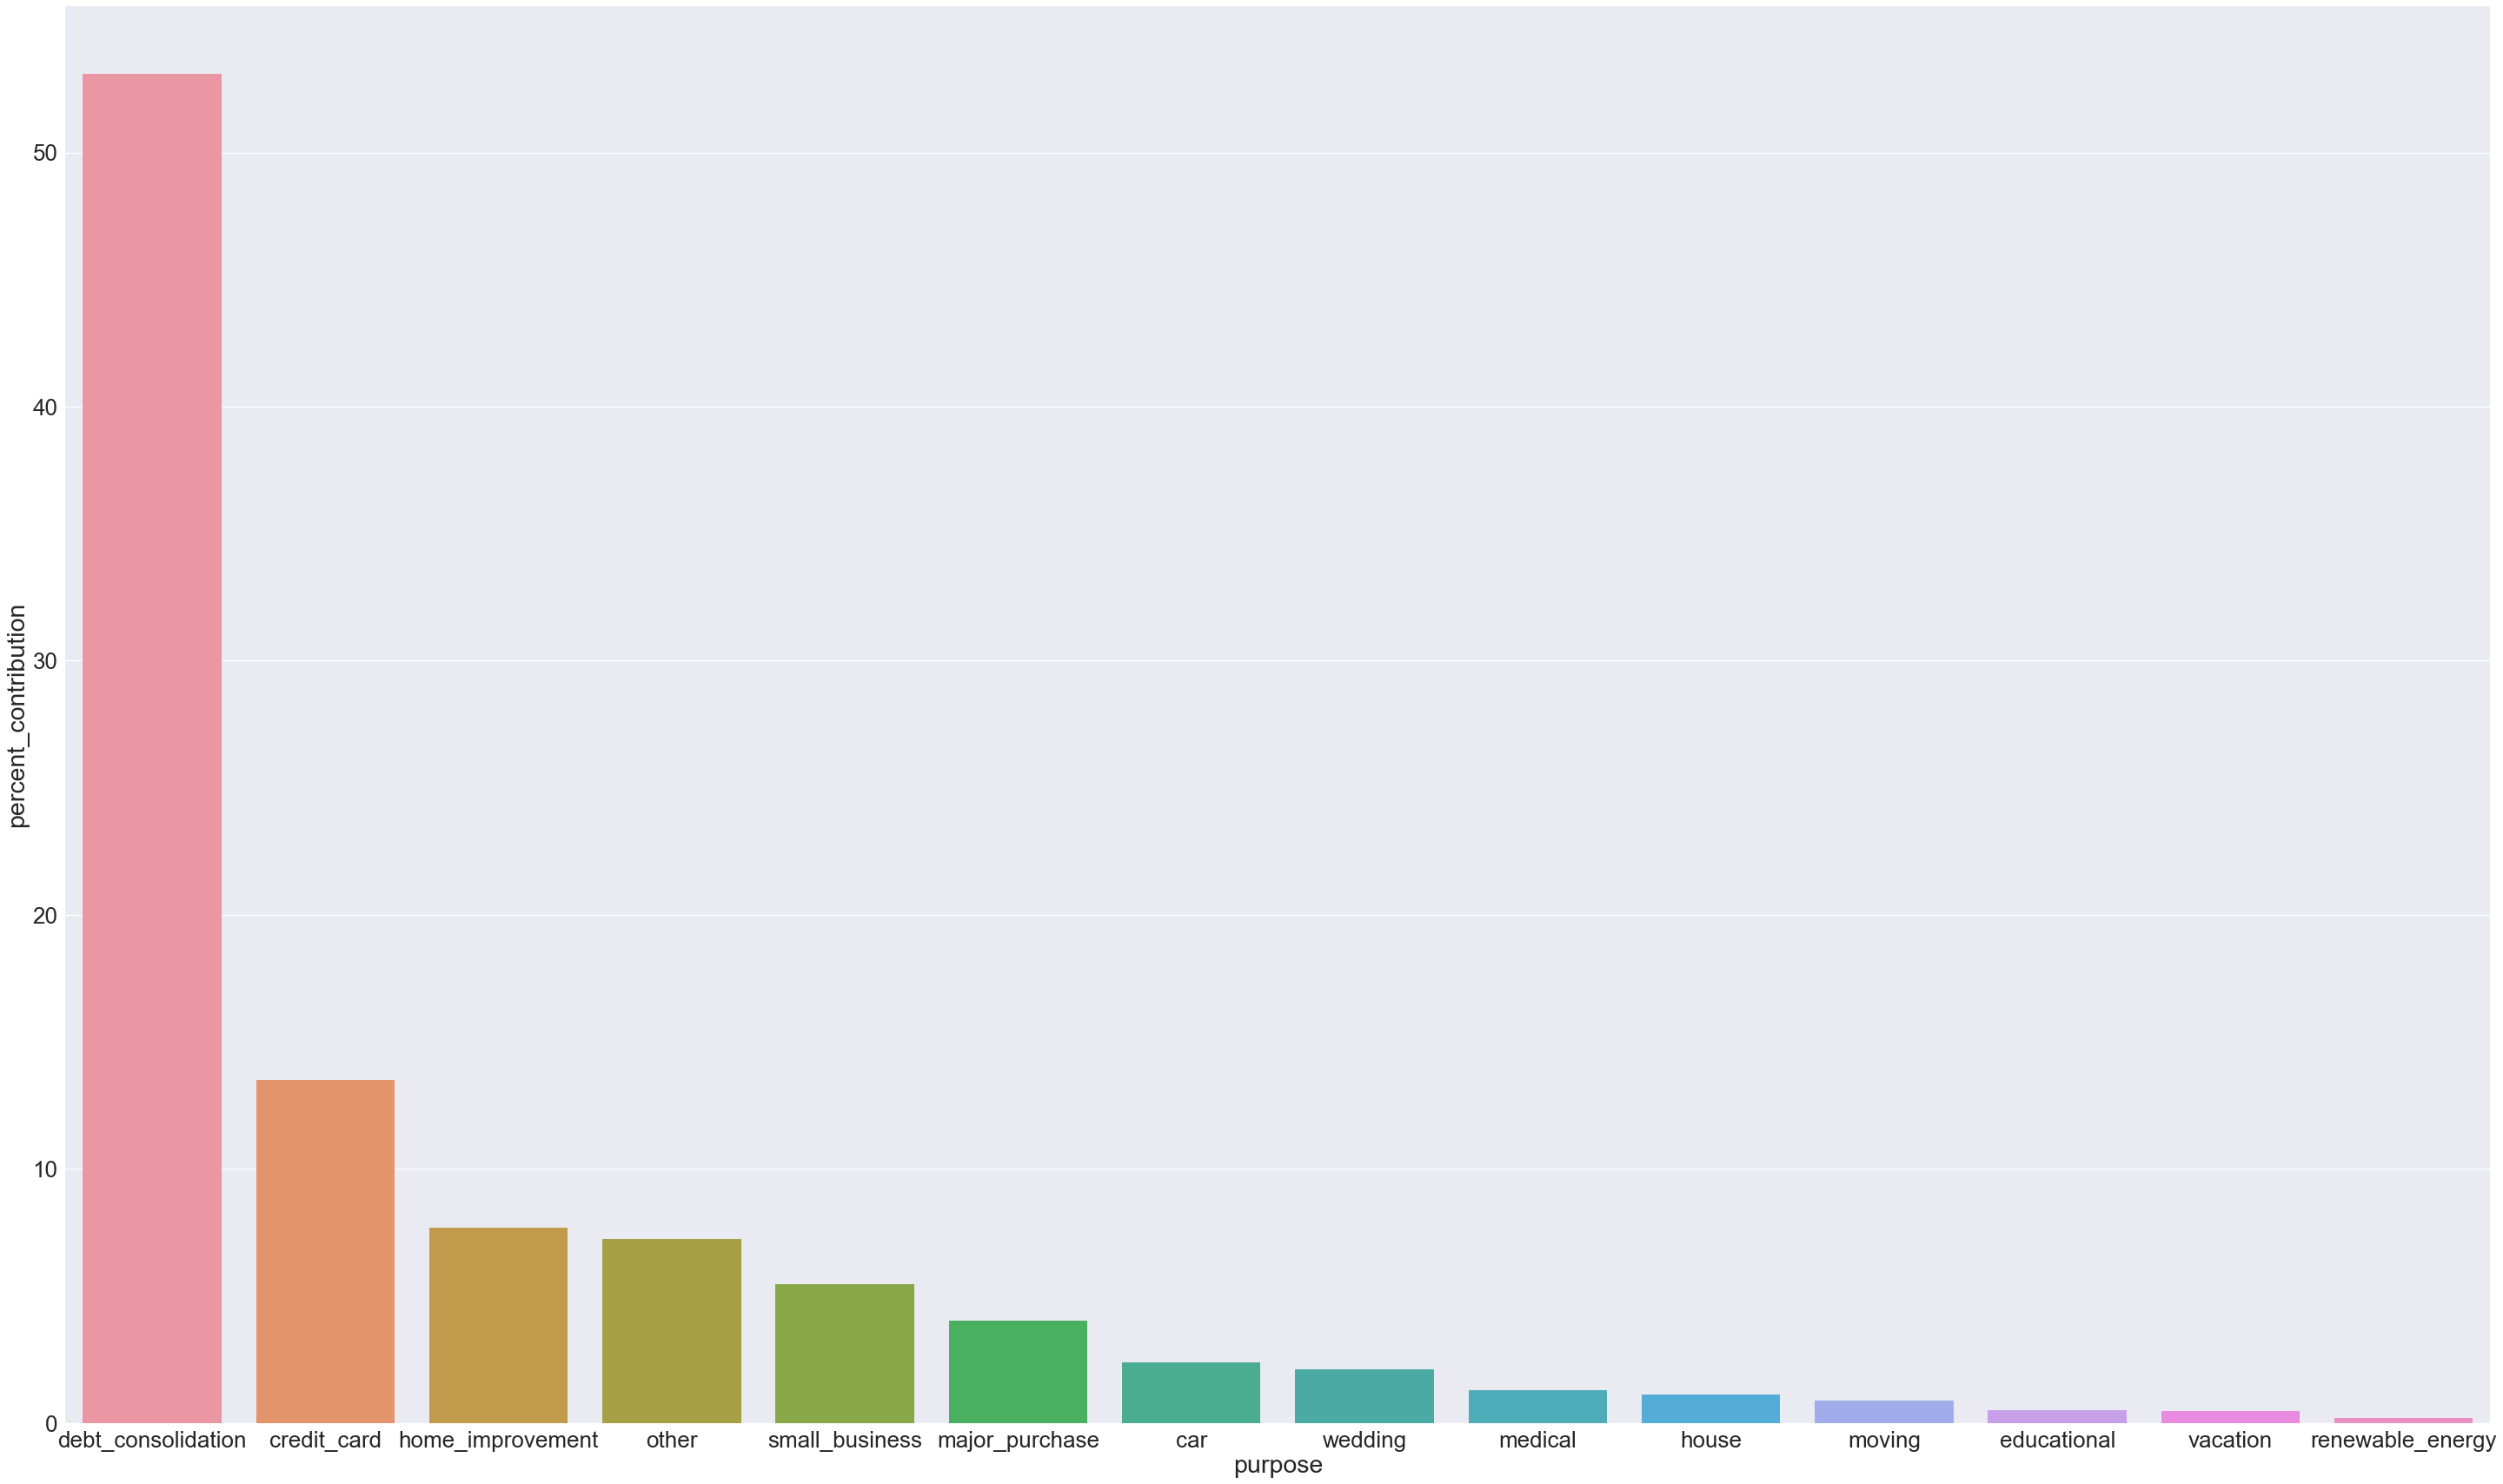

In [226]:
plt.show()
sns.set(color_codes=True)
sns.set_context("talk", font_scale=2)
#f, ax = plt.subplots(figsize=(10))
f = plt.figure(figsize=(50,30))
grph=sns.barplot(x='purpose',y='percent_contribution',data=temp_dfgrp)


#### From above analysis we identify the top purpose contributing in loan amounts
we can select the first 6 (contributing >90%) of the total loan amount as subject of this case study

In [227]:
df_purpose=temp_dfgrp[0:6]['purpose']
#df_purpose
loan_purpose_analysis=loan_purpose_analysis[loan_purpose_analysis['purpose'].isin(df_purpose)]

loan_purpose_analysis.head() # Data Frame now used for further Analysis

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   
6  1069639    1304742       7000         7000           7000.0    60   

   int_rate  installment grade sub_grade           ...            \
0     10.65       162.87     B        B2           ...             
2     15.96        84.33     C        C5           ...             
3     13.49       339.31     C        C1           ...             
4     12.69        67.79     B        B5           ...             
6     15.96       170.08     C        C5           ...             

  last_credit_pull_d  policy_code application_type  acc_now_delinq  \
0             May-16            1       INDIVIDUAL               0   
2             May-16            1       INDIVIDUAL               0   
3             Apr-16            1       INDIVIDUAL               0   
4             May-16            1       INDIVIDUAL               0   
6             May-16            1       INDIVIDUAL               0   

  delinq_amnt pub_rec_bankruptcies tax_liens loan_status_fully_paid  \
0           0                  0.0       0.0                      1   
2           0                  0.0       0.0                      1   
3           0                  0.0       0.0                      1   
4           0                  0.0       0.0                      0   
6           0                  0.0       0.0                      1   

  loan_status_current loan_status_charged_off  
0                   0                       0  
2                   0                       0  
3                   0                       0  
4                   1                       0  
6                   0                       0  

[5 rows x 58 columns]

 ### Analysing the Data for Delinquent behaviour. 

In [228]:
# Analysing the Data for Delinquent ('acc_now_delinq') behaviour. 
loan_delinquent_analysis=loan_purpose_analysis.copy()
loan_delinquent_analysis[~(loan_delinquent_analysis.acc_now_delinq==0)]
# Results shows 0 account are delinquent or failed for payments or past dues

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, policy_code, application_type, acc_now_delinq, delinq_amnt, pub_rec_bankruptcies, tax_liens, loan_status_fully_paid, loan_status_current, loan_status_charged_off]
Index: []

[0 rows x 58 columns]

In [229]:
# Analysing for number of account delinquent in past 2 years and finding highest of it
loan_delinquent_analysis['delinq_2yrs'].describe() # Results show it is very few

count    34755.000000
mean         0.143231
std          0.478249
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: delinq_2yrs, dtype: float64

In [230]:
#Analysing delinquent fund or The past-due amount owed for the accounts on which the borrower is now delinquent.
loan_delinquent_analysis.delinq_amnt.sum()
# Results shows the past due amount is zero for delinq

0

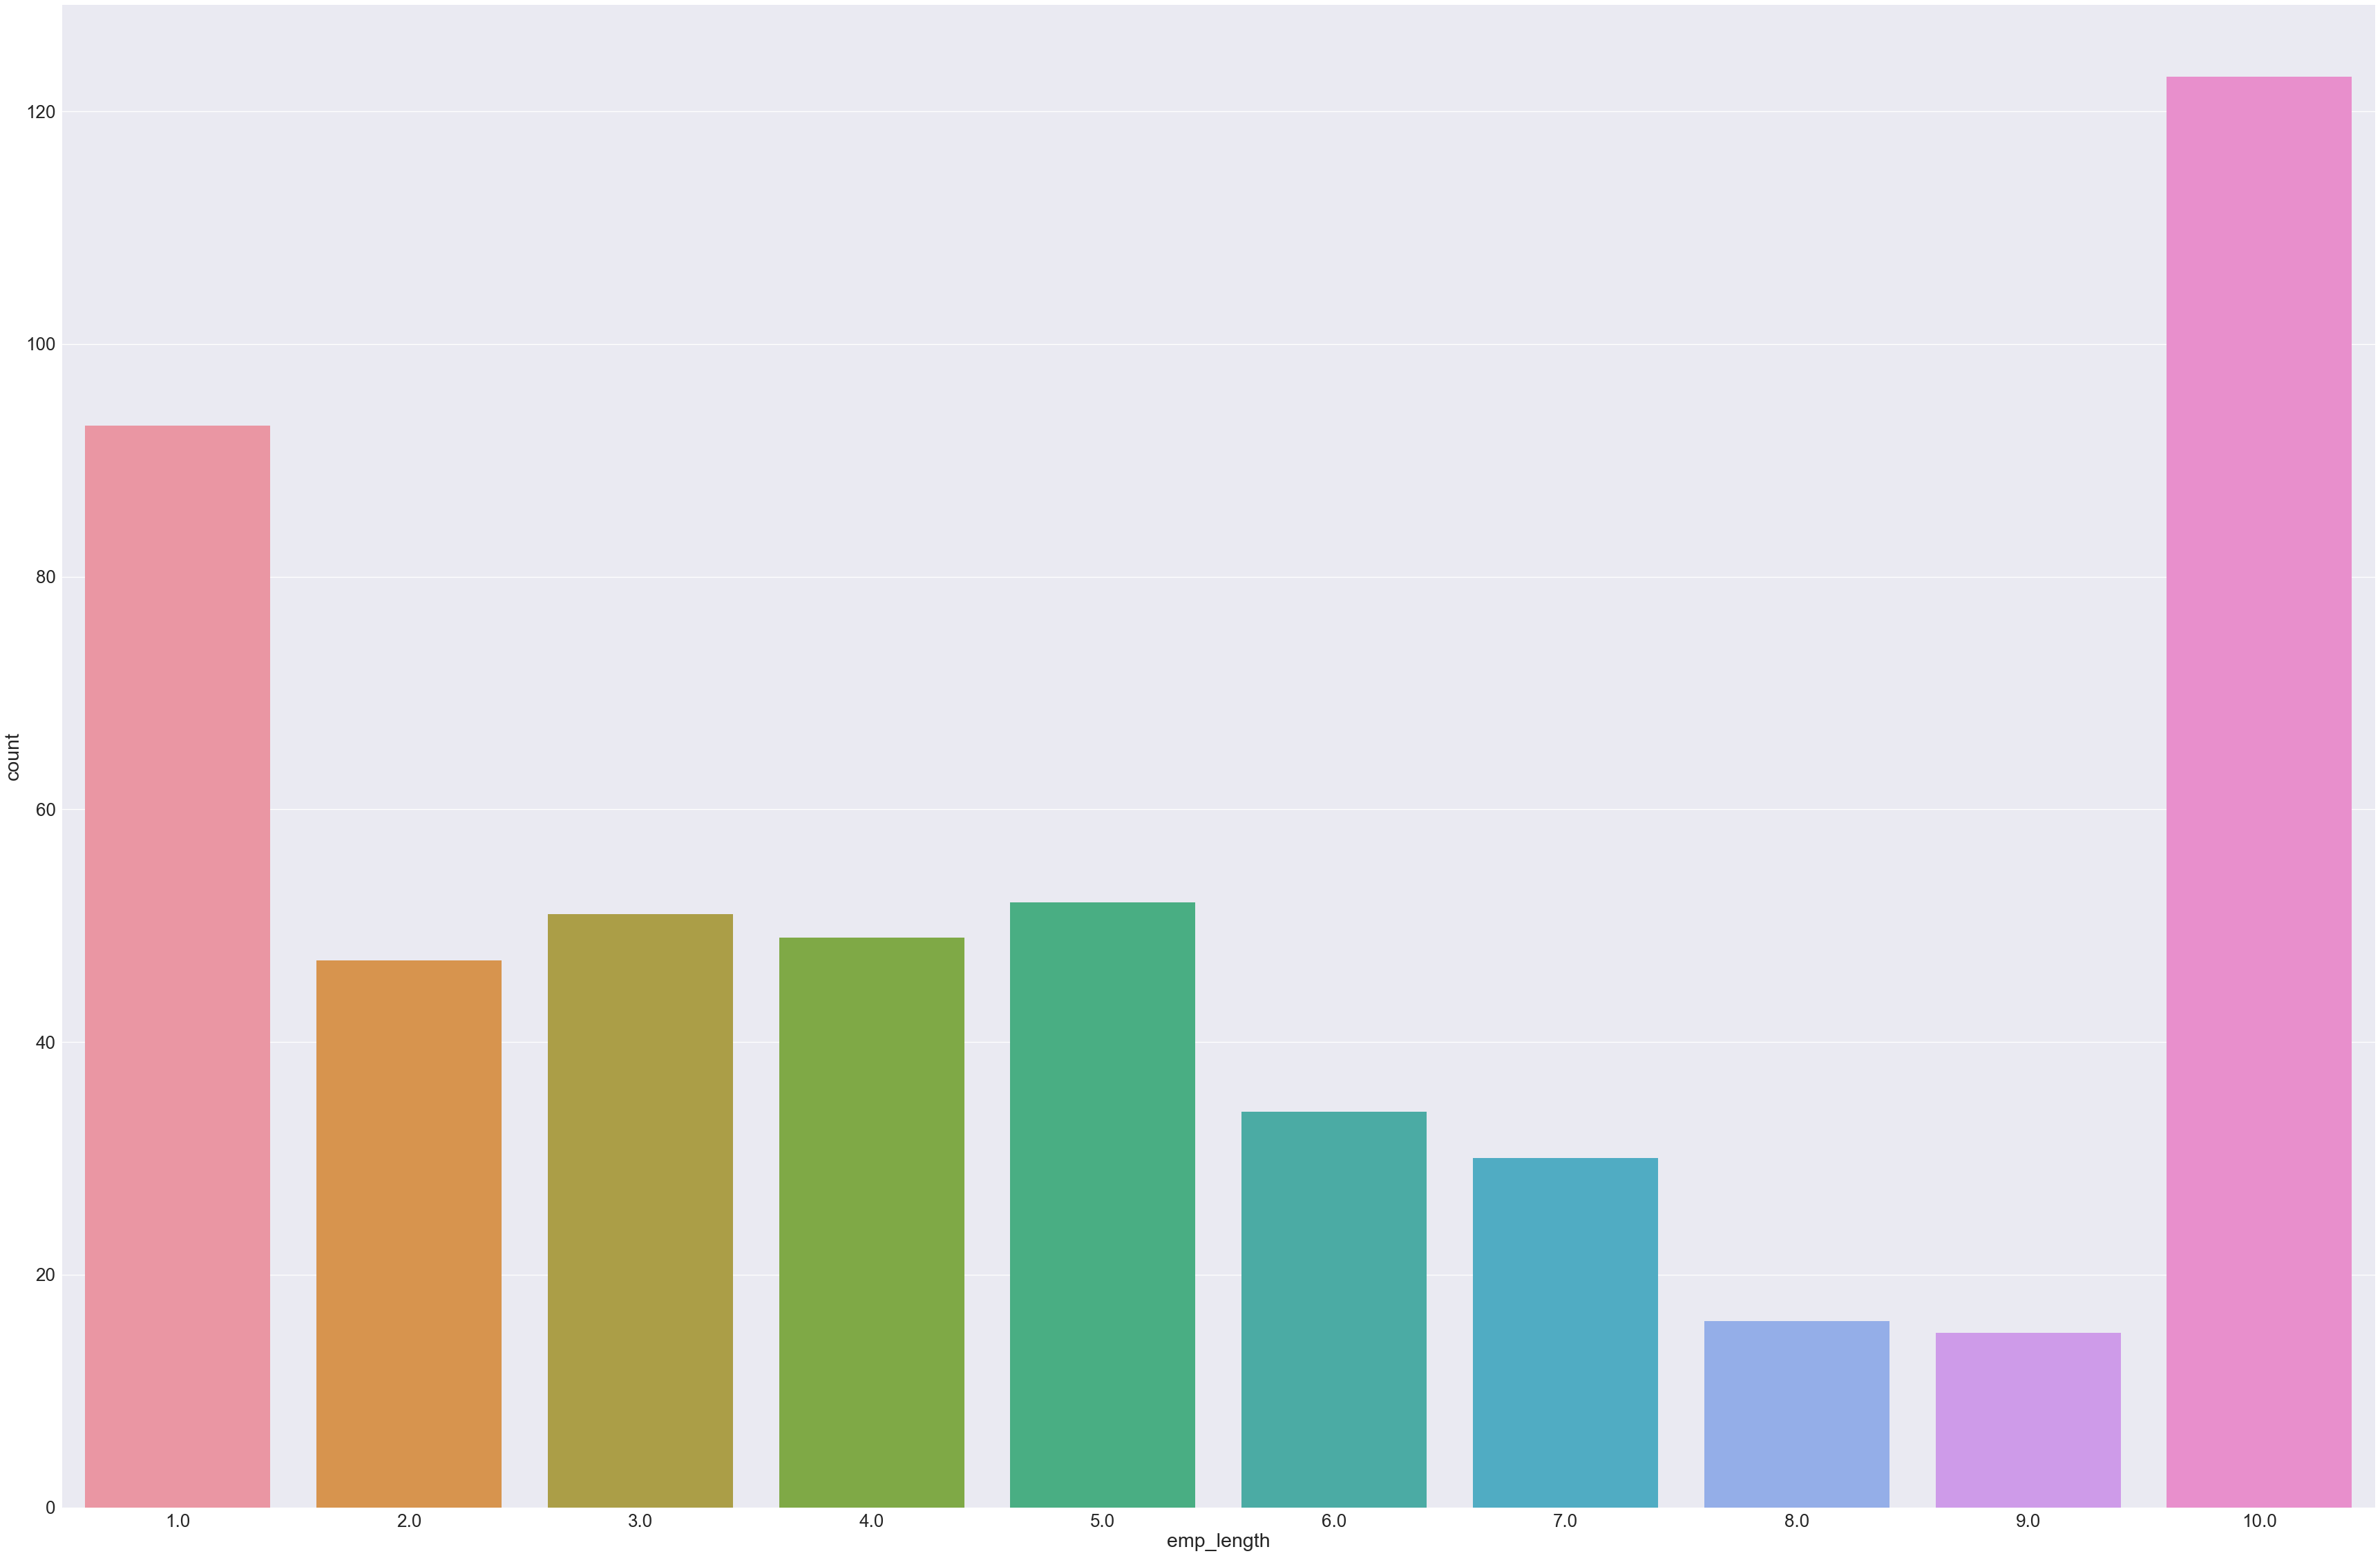

In [231]:
df=Loan_nacol_rem_df[['loan_status','purpose','emp_length']]
df=df[(df.purpose=='credit_card')&(df.loan_status=='Charged Off')]
f = plt.figure(figsize=(60,40))

grph=sns.countplot(df.emp_length)
# In credit card loans defaulters more in 1 and 10 years

#### Based on above results we can eliminate the delinquency factor from our analysis of risk assesment

## Analysing the loan status in identified 'purpose' group from above

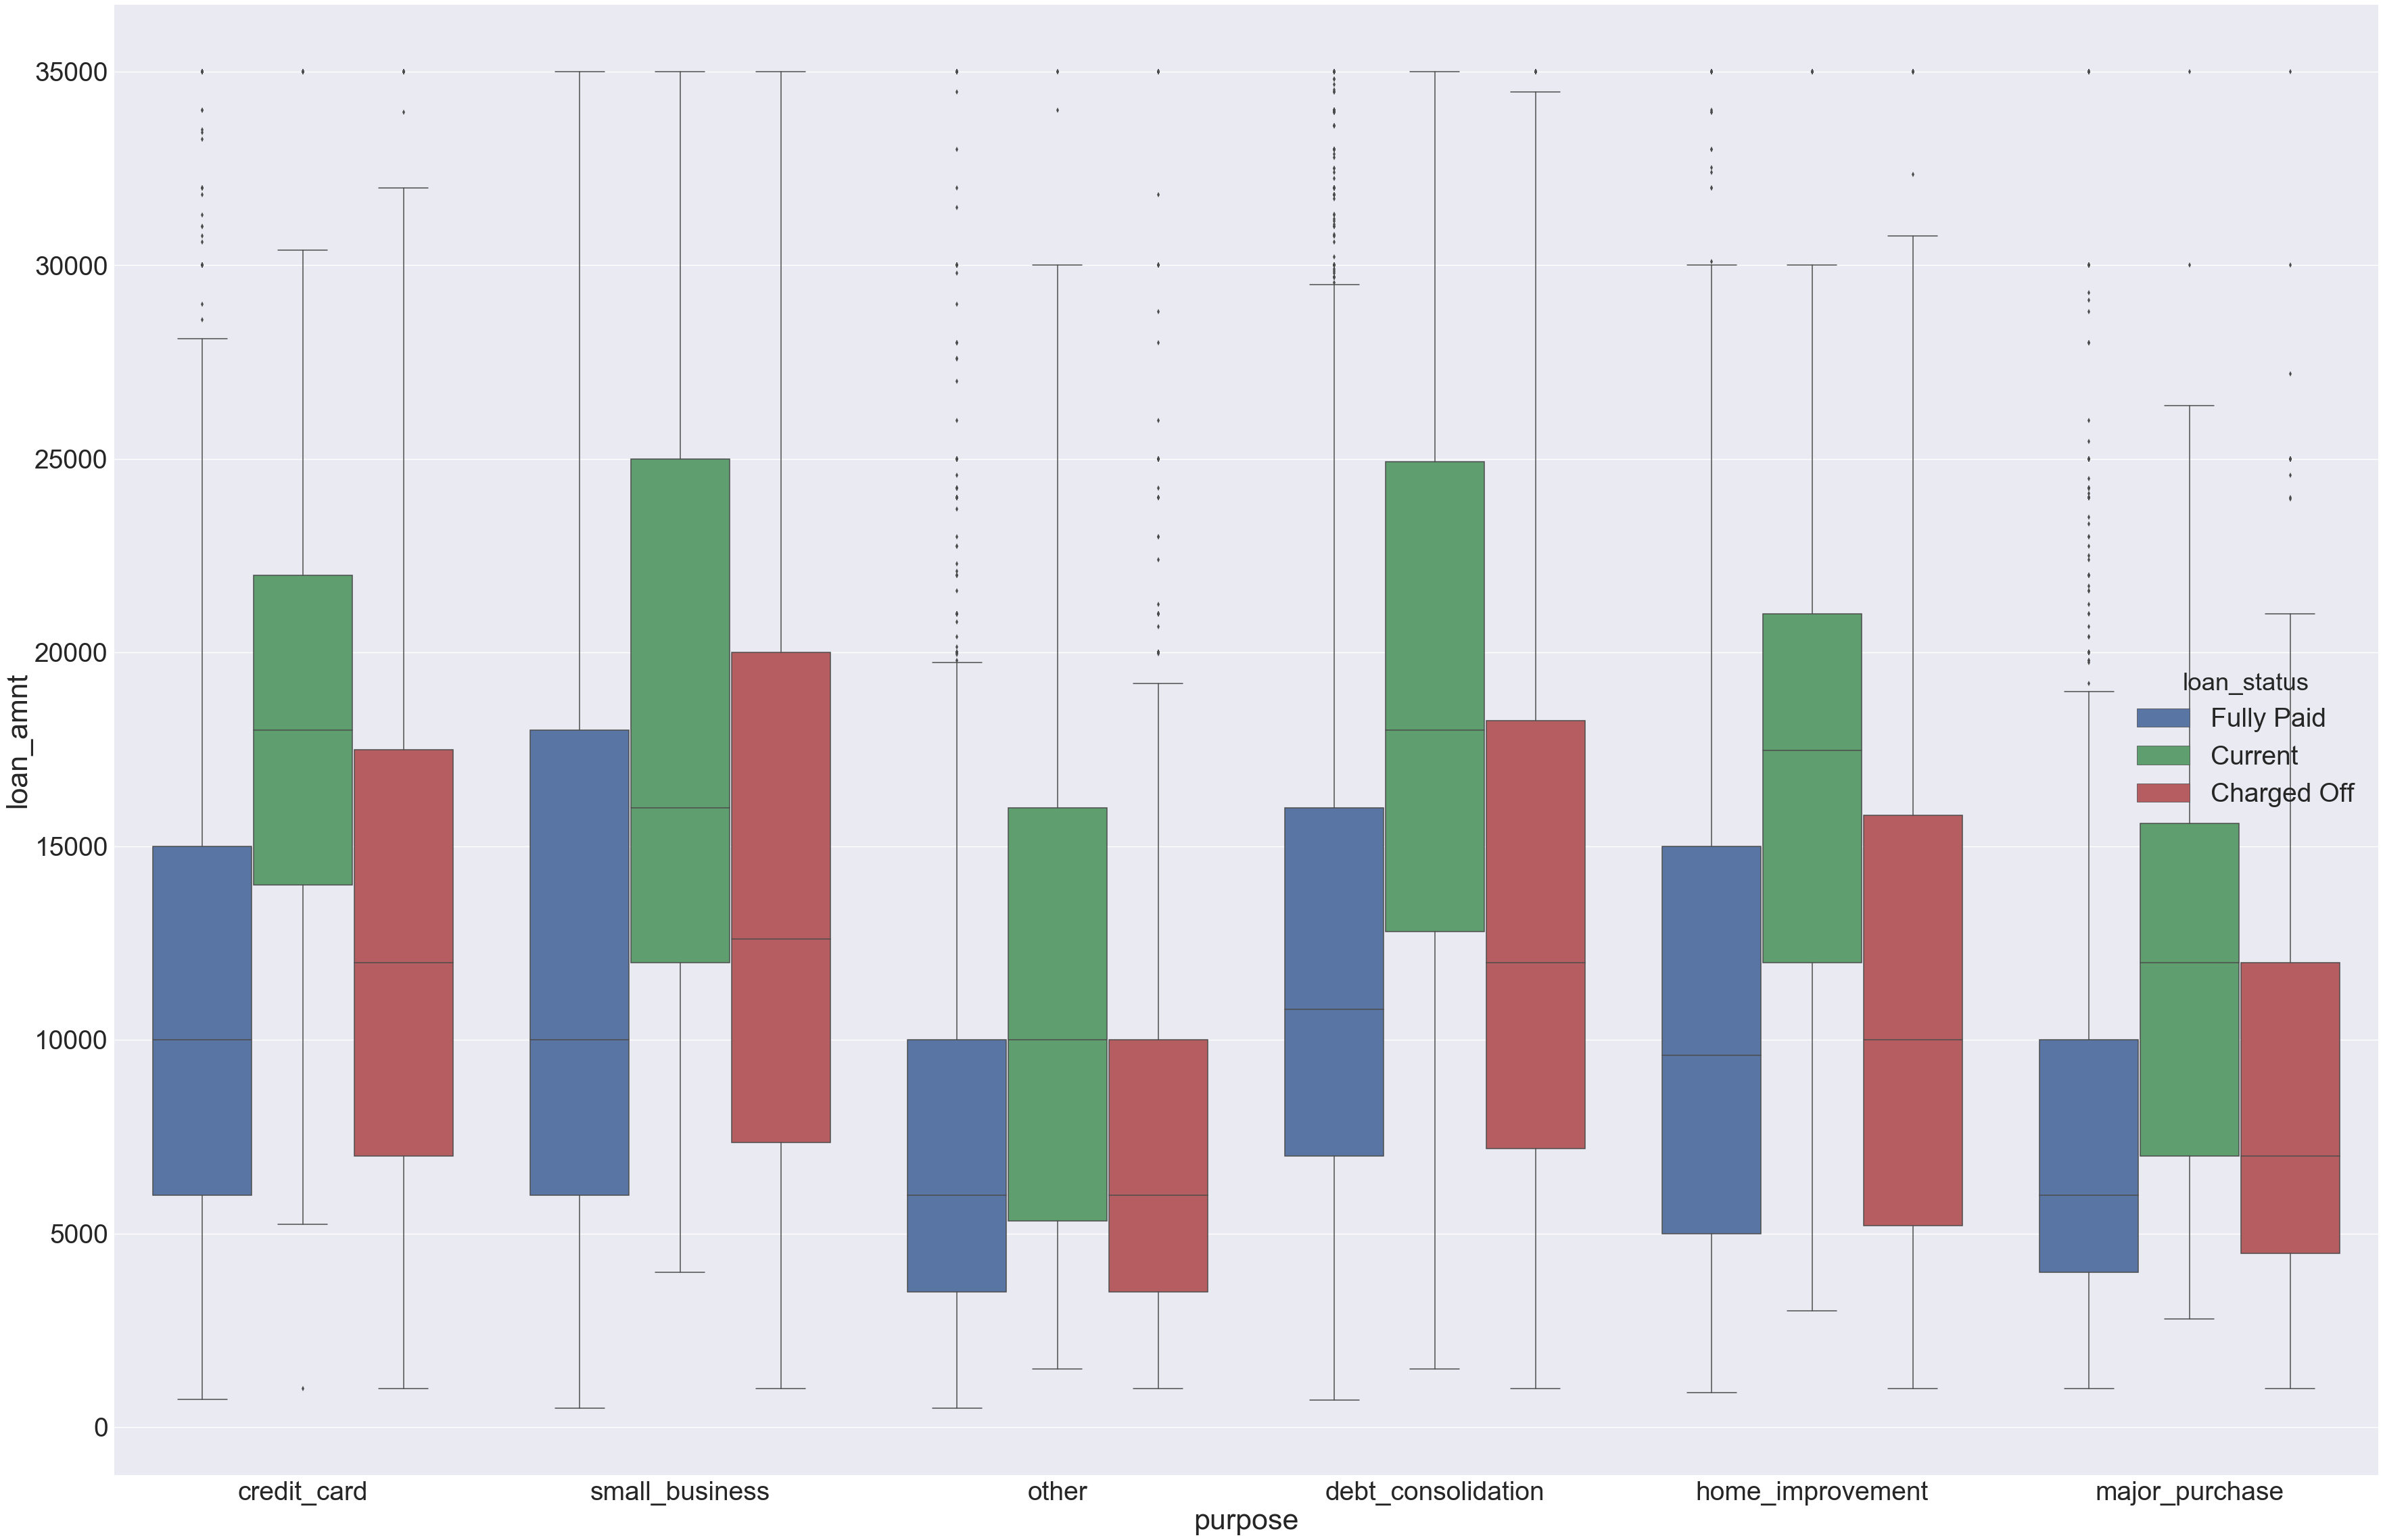

In [232]:
loan_status_analysis=loan_purpose_analysis.copy()
plt.show()
sns.set(color_codes=True)
sns.set_context("talk", font_scale=3)
##f, ax = plt.subplots(figsize=(10))
f = plt.figure(figsize=(60,40))

grph=sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_status_analysis, linewidth=1.5)
### small business and debit consolidation shows similar behaviour  , similar in credit cards and home improvement

##### From above graphs we can observe following points
- The Current account of small_business is having similar behaviour as that of debt consolidation.
- The Median of Charged off of small_business is higher than all other (- we will try to verify that further next)
- Below we will try to analys the charged off account behaviour of the loan

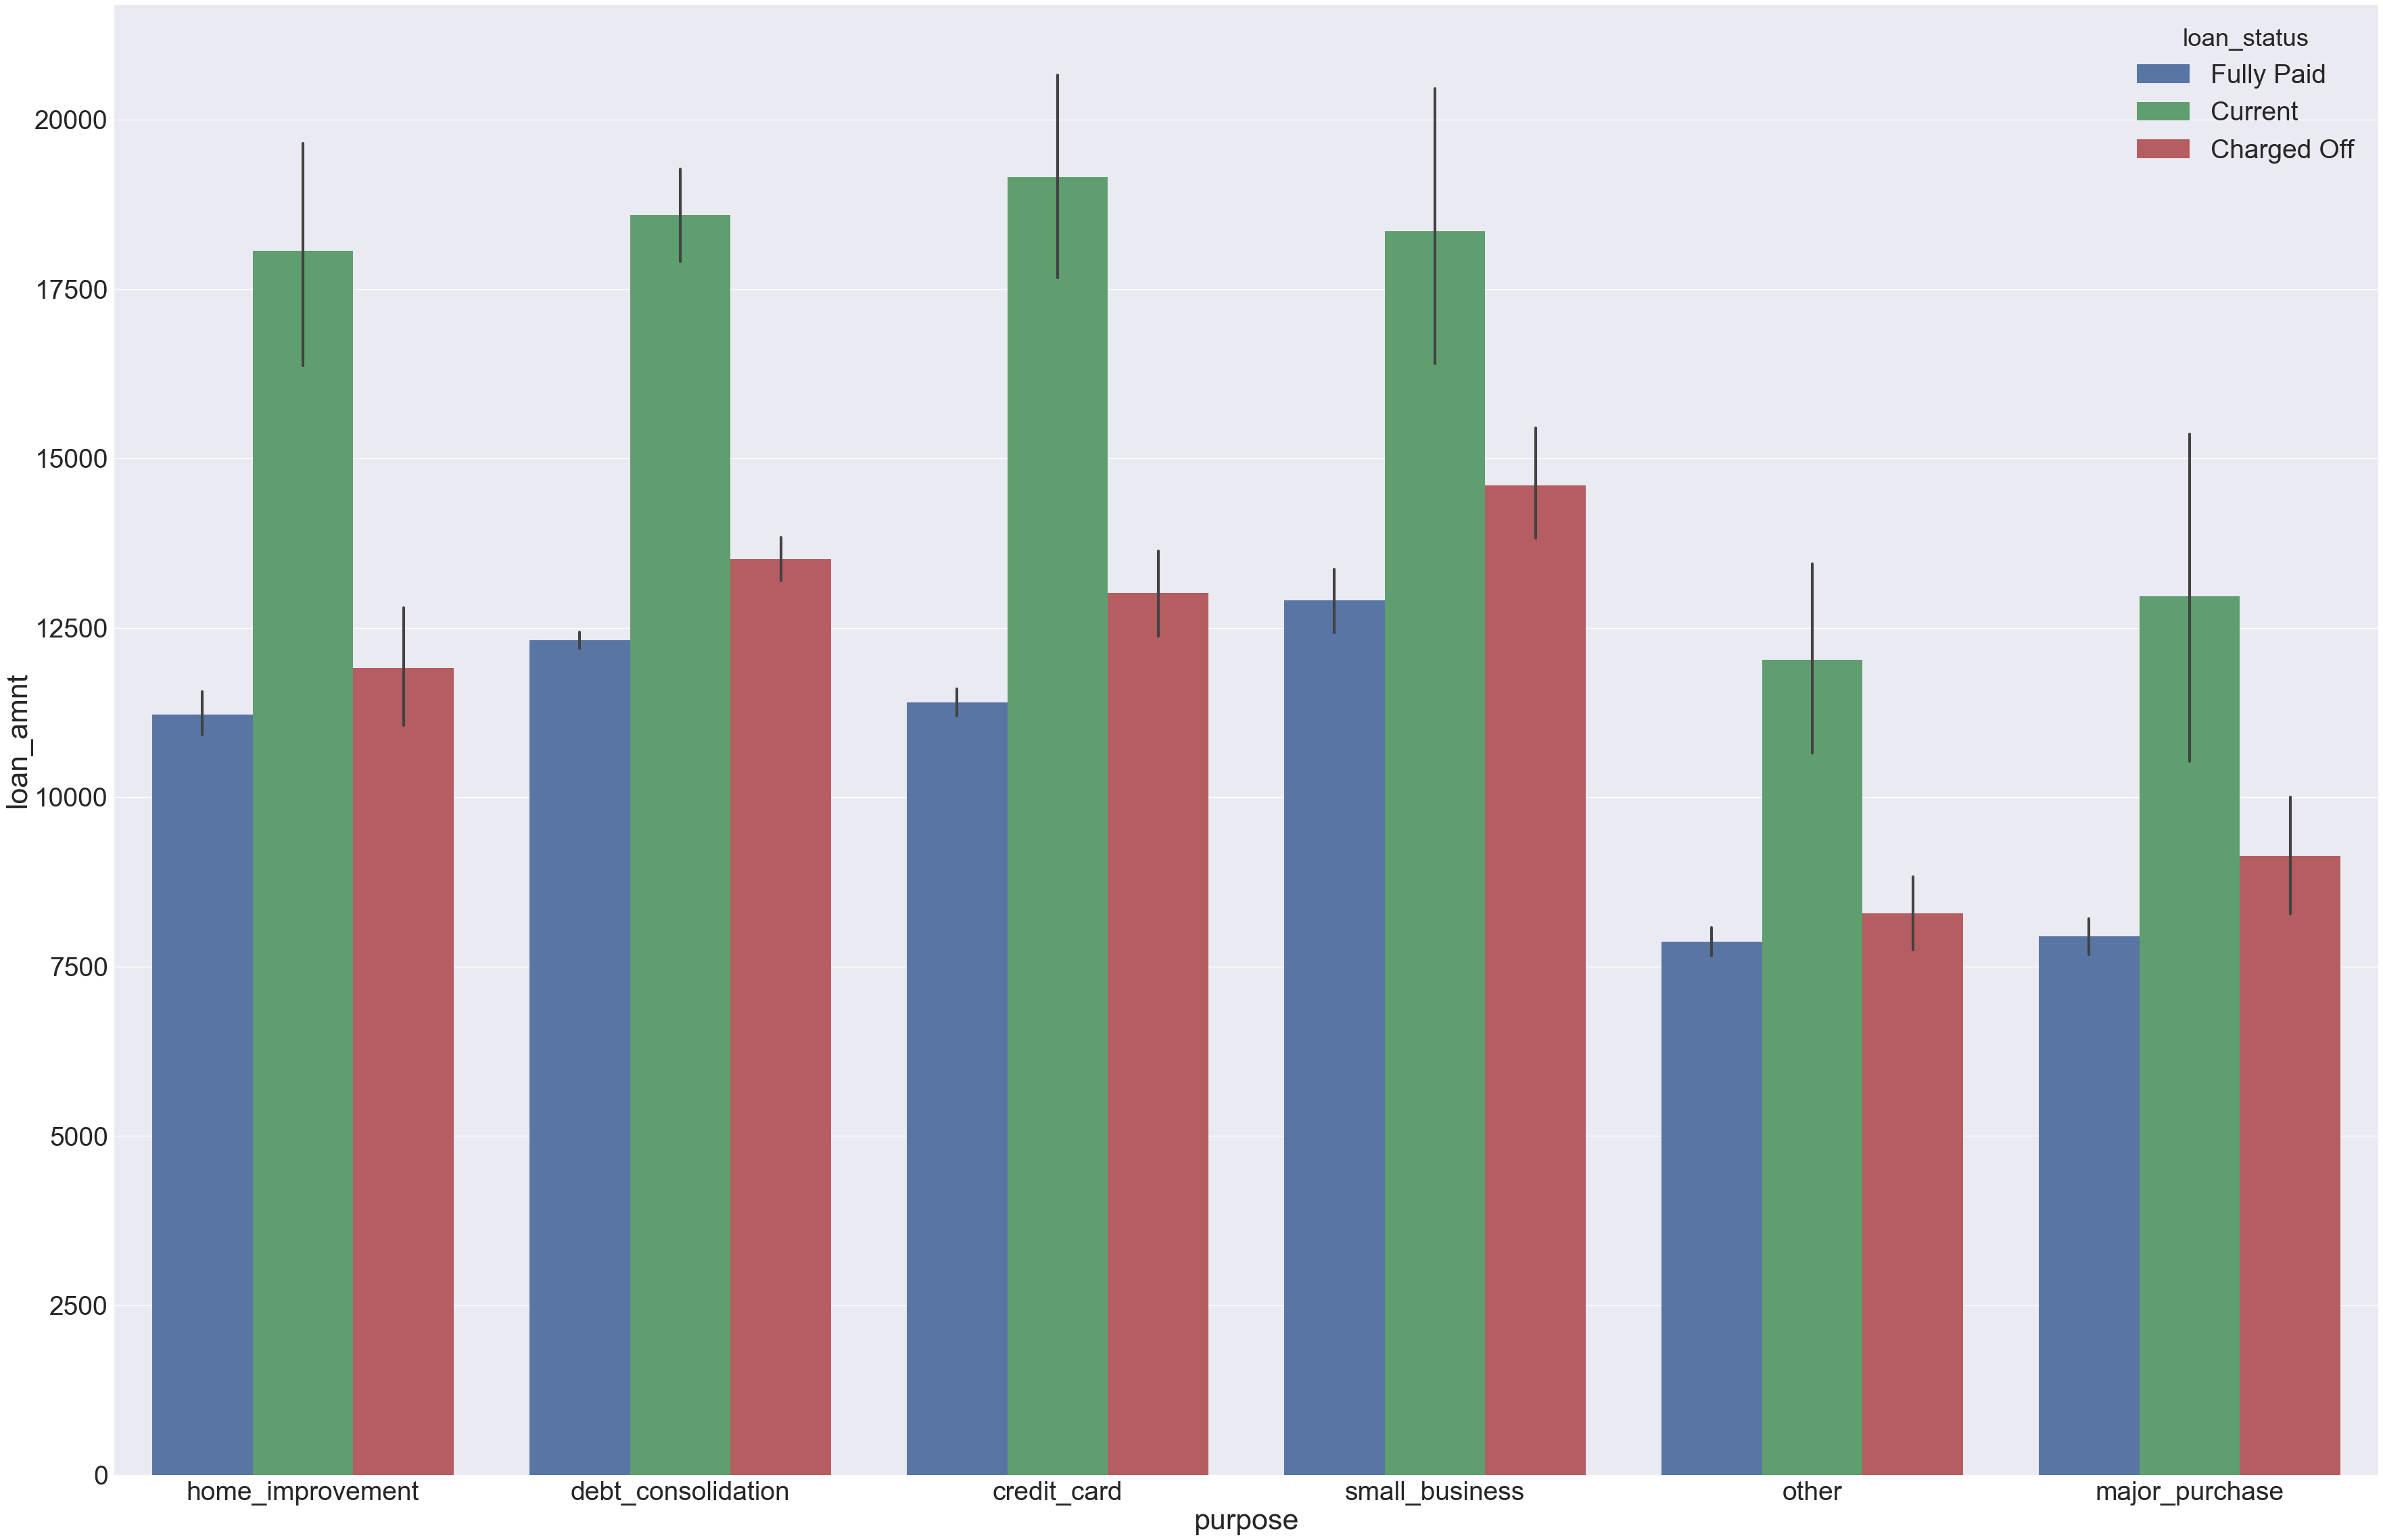

In [233]:
loan_status_analysis=loan_status_analysis.sort_values(by=['loan_amnt','loan_status'],ascending=False)
plt.show()
sns.set(color_codes=True)
sns.set_context("talk", font_scale=3)
##f, ax = plt.subplots(figsize=(10))
f = plt.figure(figsize=(60,40))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_status_analysis, linewidth=1.5)


#### The chargeoff is in order 
- small_business>debt_consolidation>credit_card>home_improvement>major_purchase>other
- This might be also be the order of risk
- Also observe from box plot and bar plot that behaviour of debt_consolidation,credit_card and small business is nearly identical
- We will break down the data for further analysis based on purpose


In [234]:
#Try to create the correlation map
# selecting columns that we  need and dropping rest
dropcolumns=['id','member_id','tax_liens','policy_code','application_type','acc_now_delinq','delinq_amnt','grade','sub_grade',\
            'emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc',\
            'purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d',\
            'last_credit_pull_d','mths_since_last_delinq','mths_since_last_record']
loan_analysis_corr=loan_status_analysis.copy()
loan_analysis_corr.drop(dropcolumns,axis=1, inplace=True)
#loan_analysis_corr
loan_analysis_corr.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 34755 entries, 80 to 39544
Data columns (total 29 columns):
loan_amnt                  34755 non-null int64
funded_amnt                34755 non-null int64
funded_amnt_inv            34755 non-null float64
term                       34755 non-null int64
int_rate                   34755 non-null float64
installment                34755 non-null float64
annual_inc                 34755 non-null float64
dti                        34755 non-null float64
delinq_2yrs                34755 non-null int64
inq_last_6mths             34755 non-null int64
open_acc                   34755 non-null int64
pub_rec                    34755 non-null int64
revol_bal                  34755 non-null int64
revol_util                 34755 non-null float64
total_acc                  34755 non-null int64
out_prncp                  34755 non-null float64
out_prncp_inv              34755 non-null float64
total_pymnt                34755 non-null float64
total_py

True

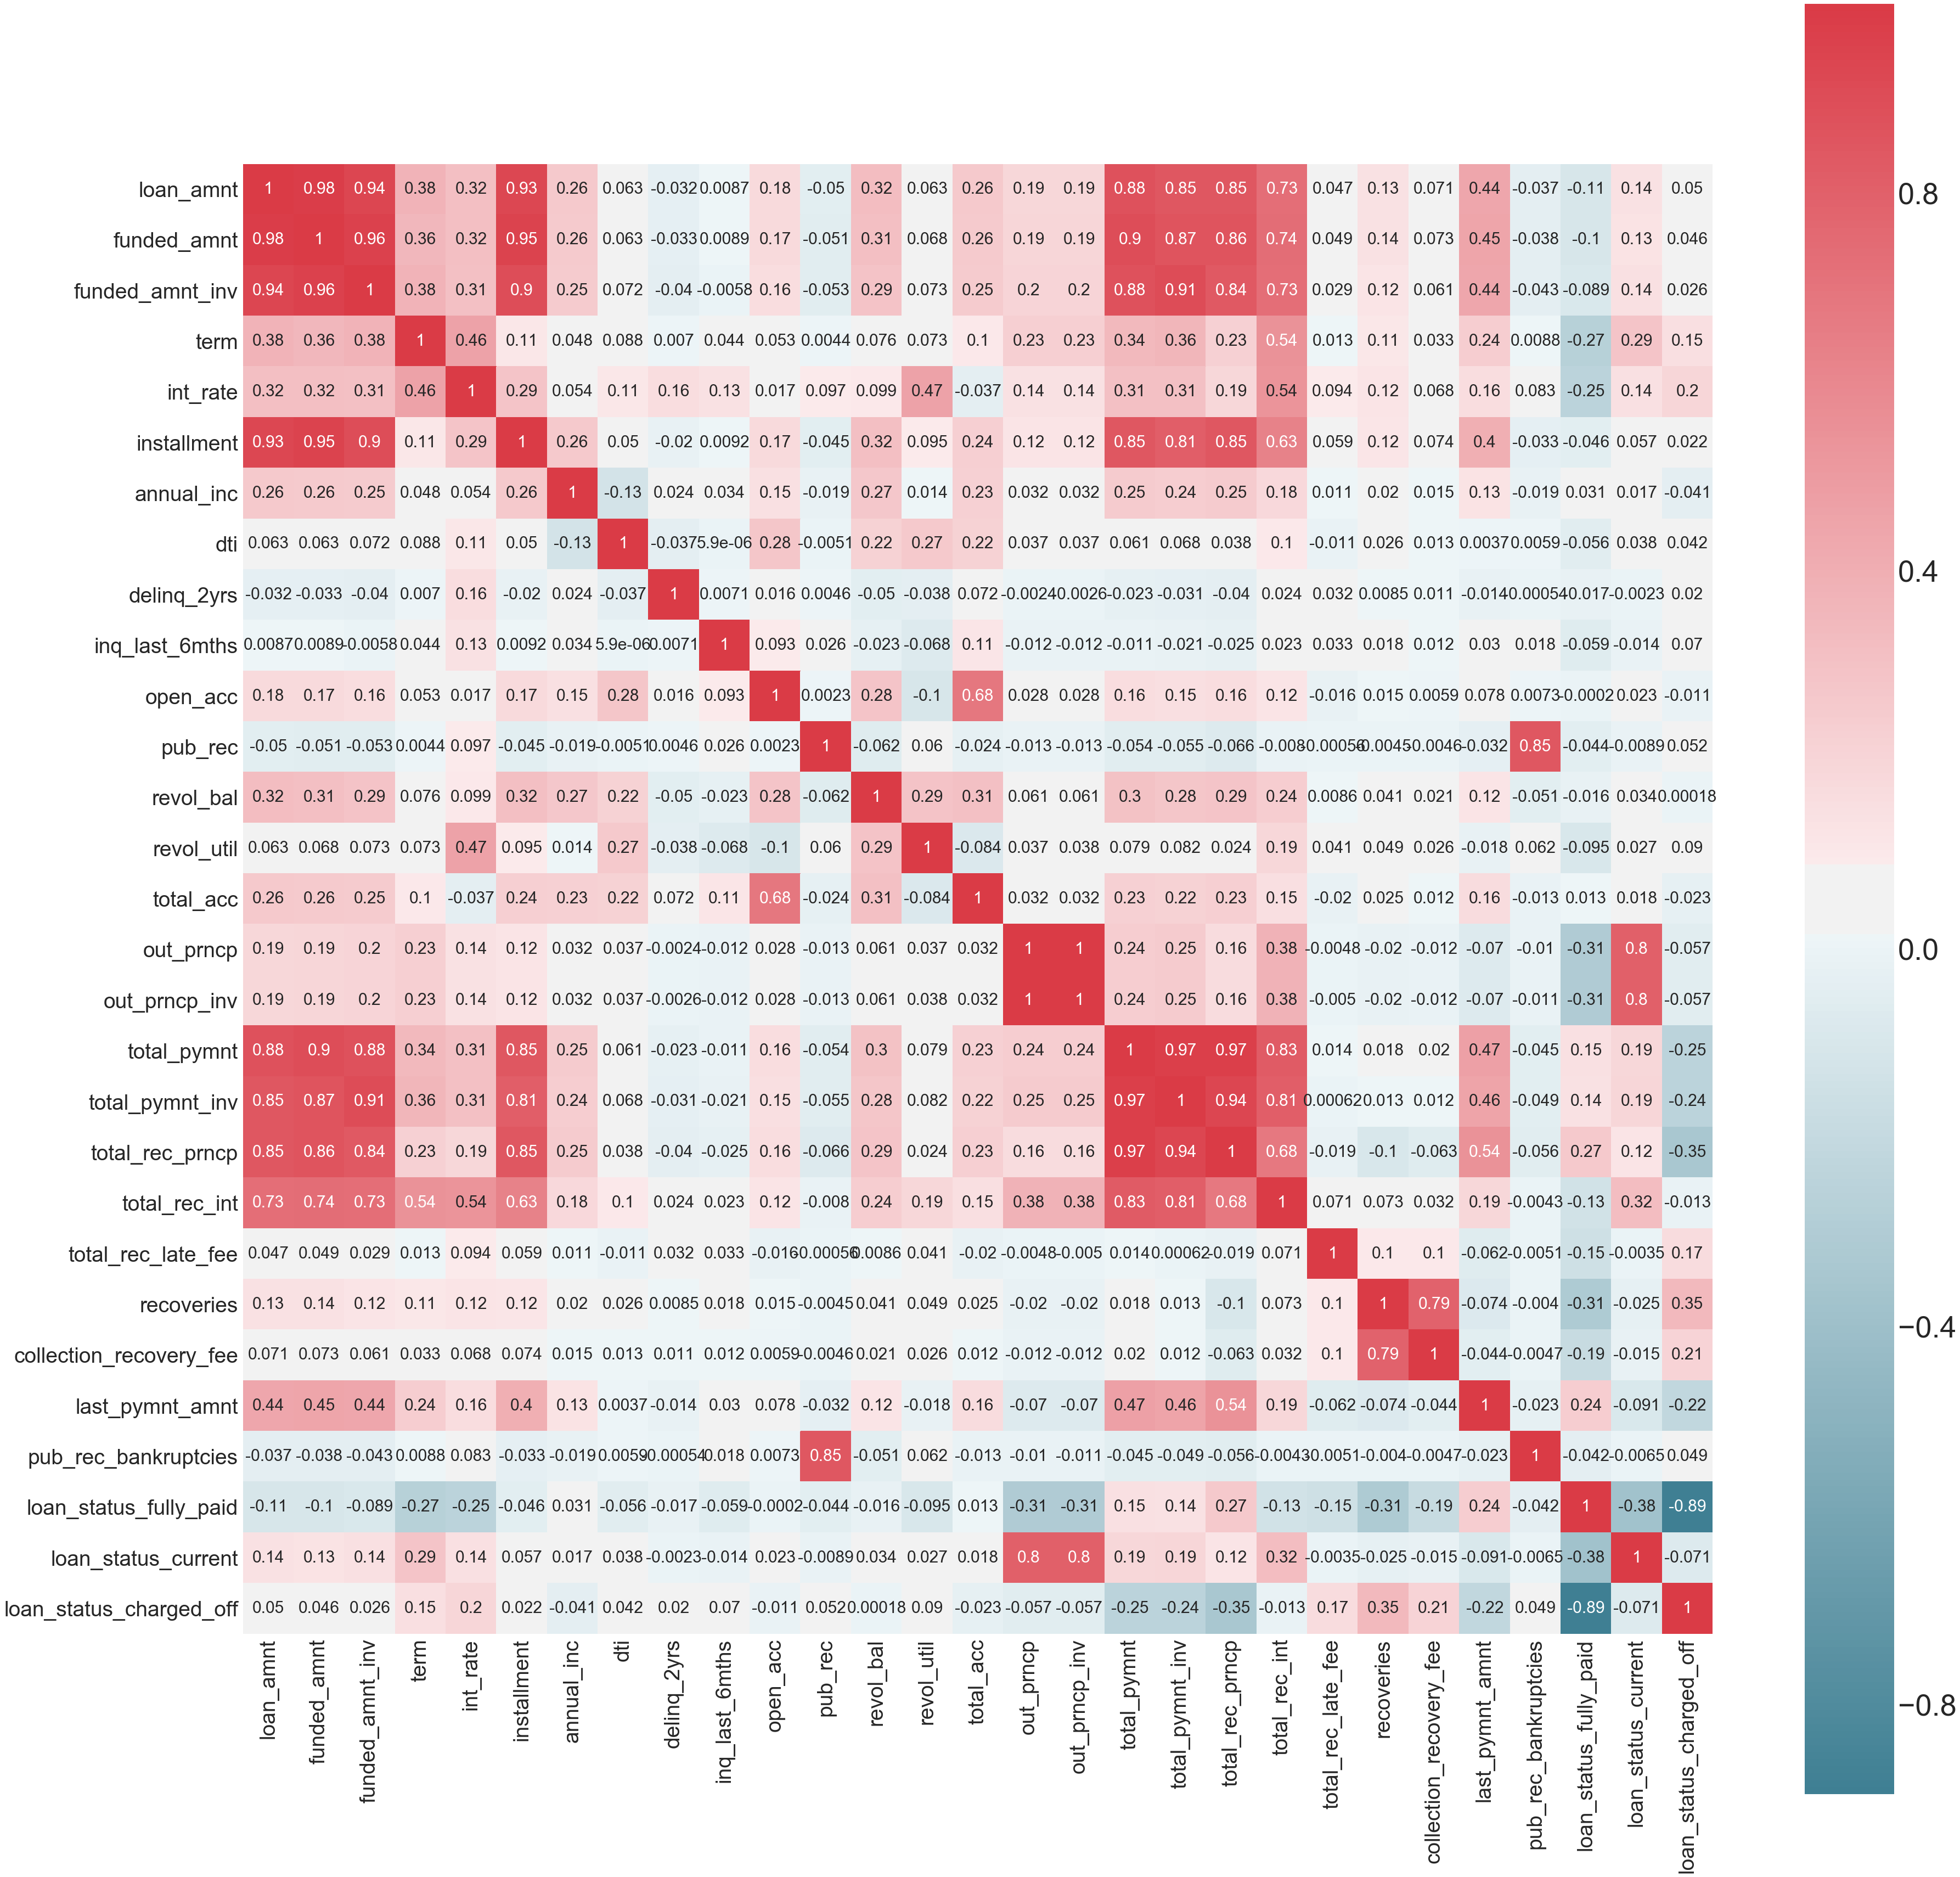

In [235]:
f, ax = plt.subplots(figsize=(60, 60))
corr1 = loan_analysis_corr.corr()

#Filtering all values where corr is greater than 0.45


sns.set(font_scale=5.4)
pt=sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True,annot_kws={"size": 30}, ax=ax)
pt.can_zoom()
pt.can_pan()



## Since Correlation heat map is very large we will filter those relations wher corr>0.45 or corr<-0.45

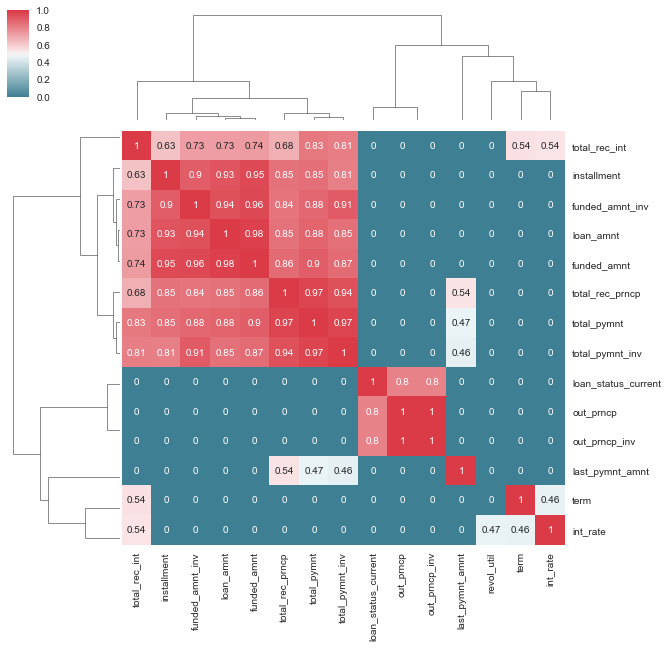

In [236]:
corr1
#creating list of all columns
filtercolumns=[corr1.columns]
def filtercorrval(x):
        if (x>0.45):
            return x
        elif (x<-0.45):
            return (x)
corr2=corr1.applymap(lambda x:filtercorrval(x))
# Drop all columns which have NaN values
corr2.dropna(axis=1,how='all')
corr2.dropna(axis=0,how='all')
corr2.isna().sum()<27
corr2=corr2[corr2.isna().sum()<27]

corr2.dropna(axis=1,inplace=True,thresh=1)
corr2.fillna(0,inplace=True)

sns.set(font_scale=1)
pt=sns.clustermap(corr2,mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
          square=True,annot=True,annot_kws={"size": 10})
## Interset Rate Vs Term and Interest Rate Vs Revol_util are highly correlated 

#### Let us try to understand the behaviour of loan_status specifically for CHarged of or Defaulter and find there distribution across loan 'purpose'


              purpose  loan_status
0         credit_card          542
1  debt_consolidation         2767
2    home_improvement          347
3      major_purchase          222
4               other          633
5      small_business          475


Text(0,0.5,'loan_status_charged_off')

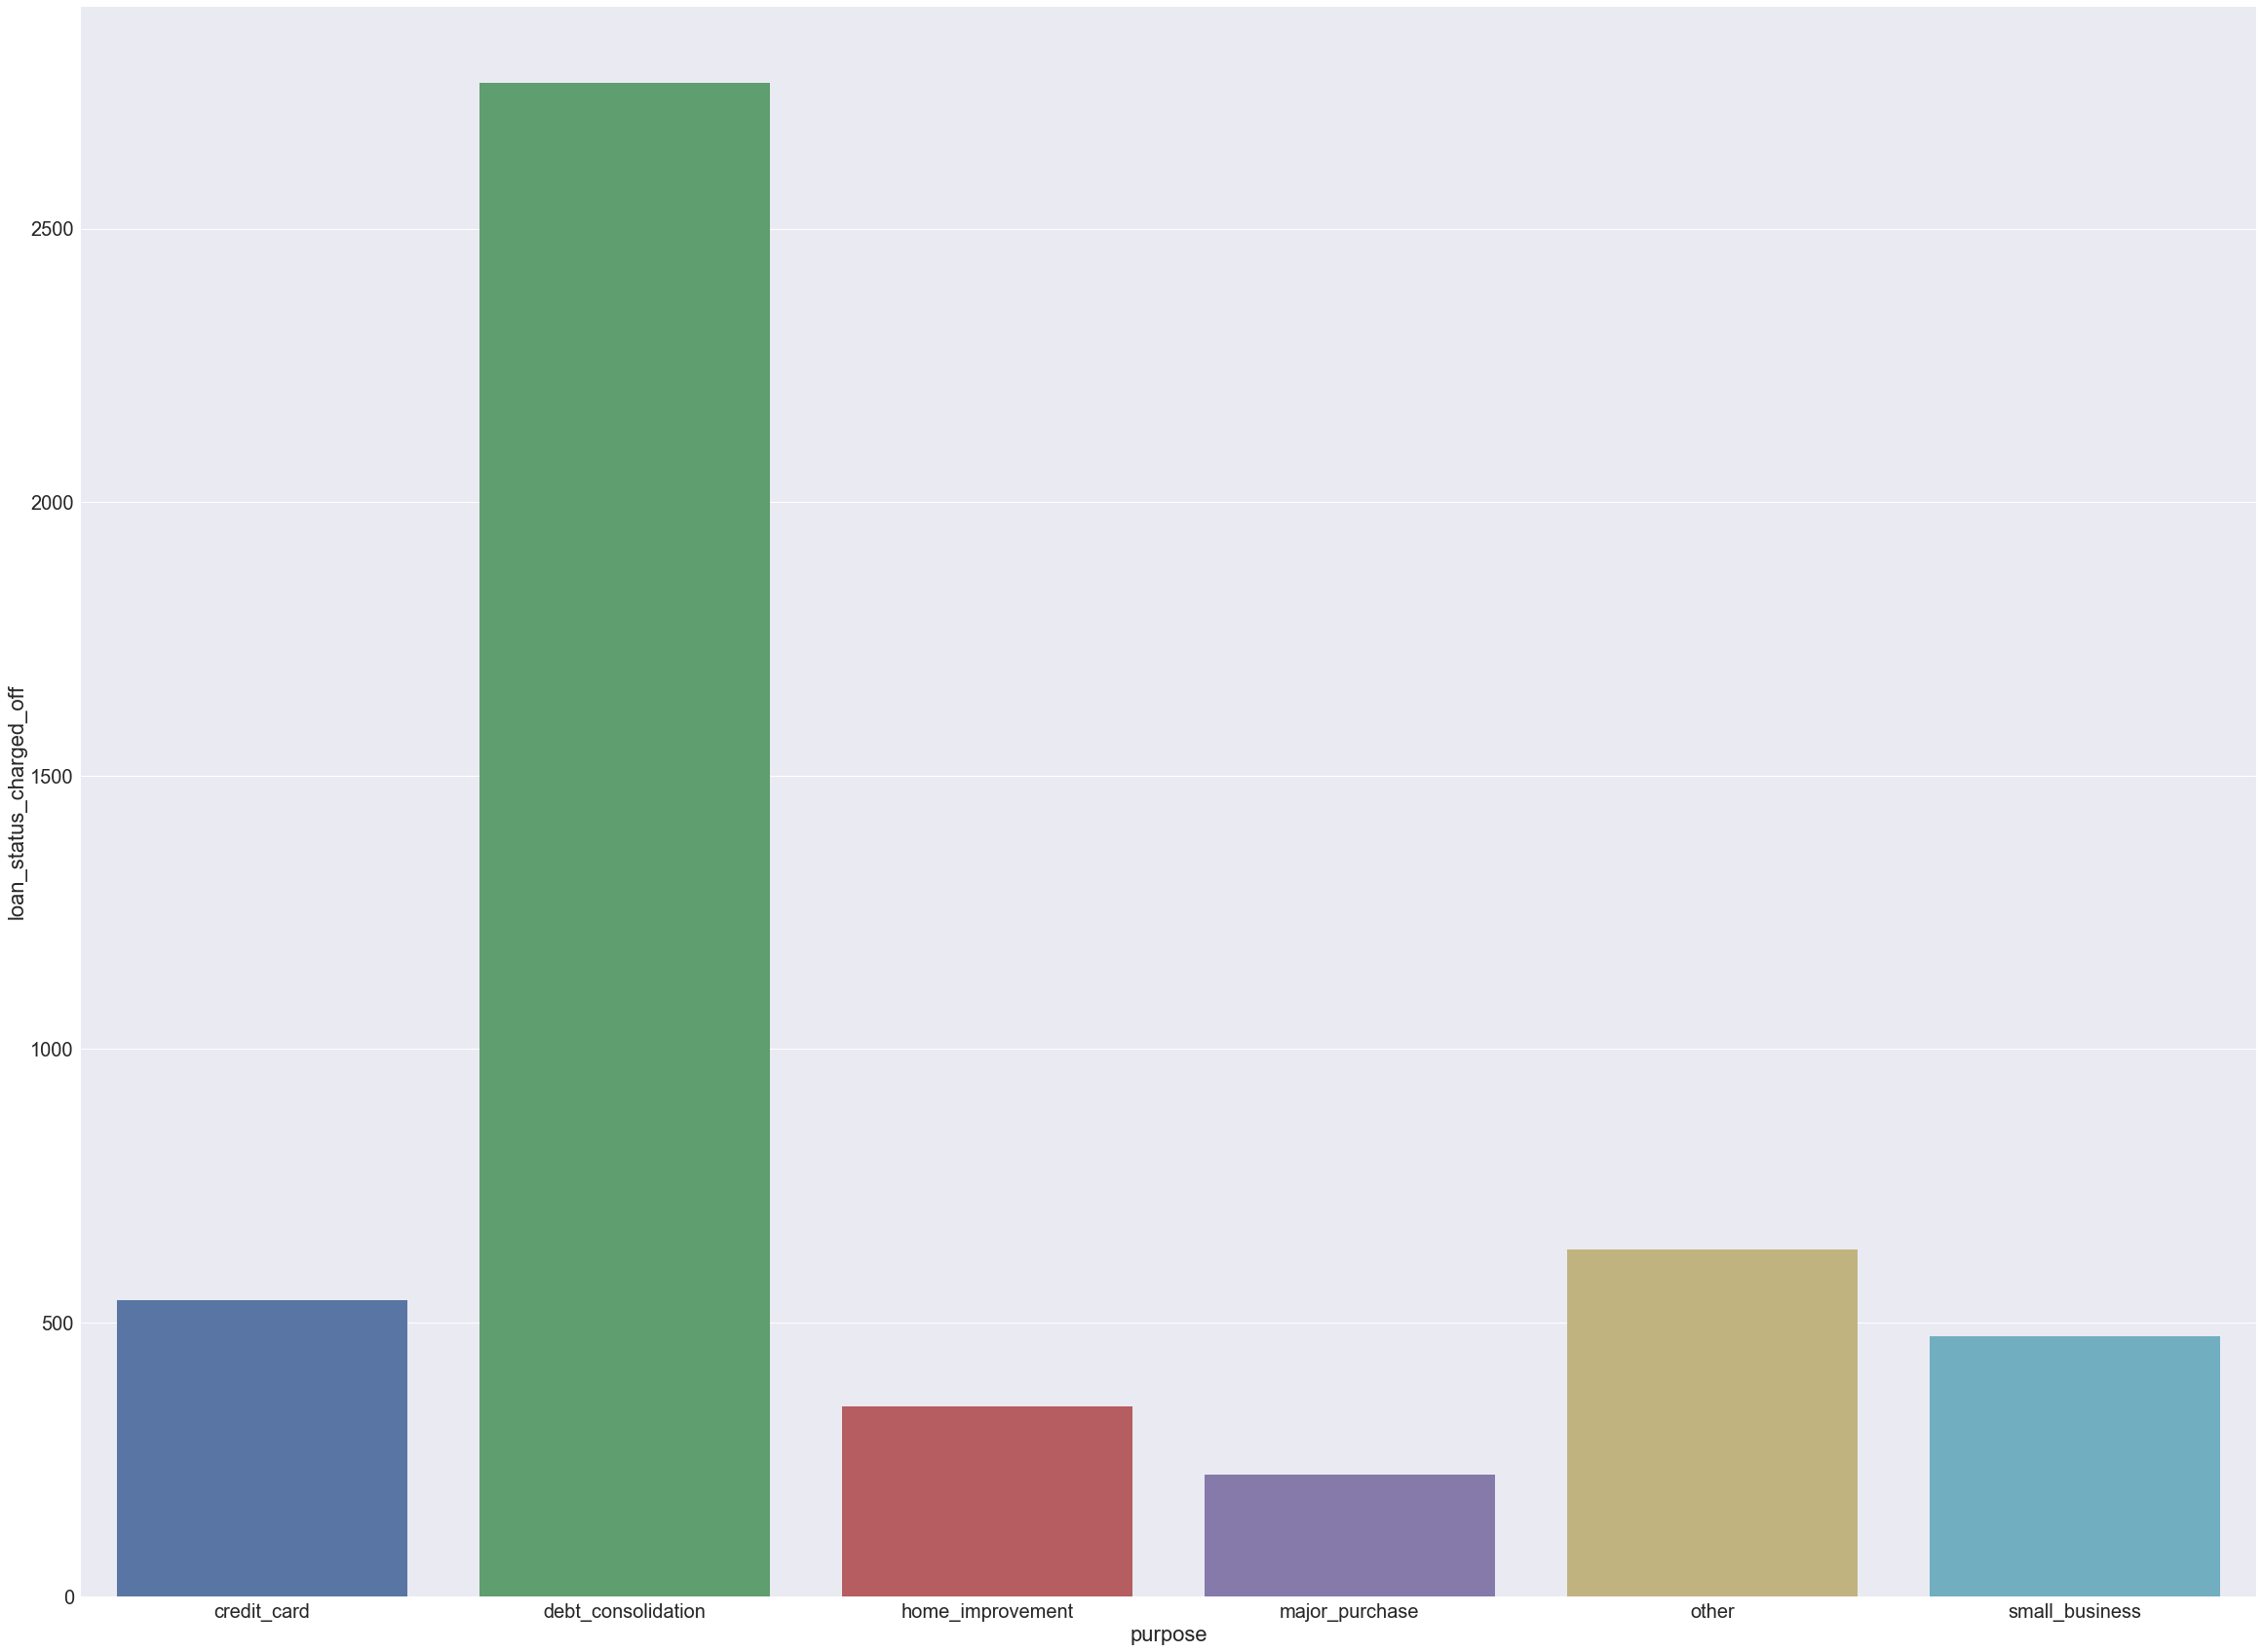

In [237]:
# Creating required dataframe
loan_charged_off=loan_status_analysis[loan_status_analysis.loan_status=='Charged Off'][['purpose','loan_status']]
loan_charged_off_grp=loan_charged_off.groupby('purpose').count().reset_index()
print(loan_charged_off_grp)

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(40, 30))
sns.barplot(x='purpose',y='loan_status',data=loan_charged_off_grp)
ax.set_ylabel('loan_status_charged_off')

#### Debt Consolidation is having higher Charged Off or defaulter
Lets see the distribution of home_ownership and other factors in this Area

  home_ownership  funded_amnt  total_rec_late_fee
0       MORTGAGE     17052200         4304.508028
3           RENT     16841375         5815.328439
2            OWN      2343975          755.361003
1          OTHER        94200            0.000000

RENT        1421
MORTGAGE    1145
OWN          194
OTHER          7
Name: home_ownership, dtype: int64


funded_amnt     int_rate         term
count   2767.000000  2767.000000  2767.000000
mean   13130.375858    14.275598    47.258403
std     7712.898988     3.678183    11.979228
min     1000.000000     5.420000    36.000000
25%     7200.000000    11.710000    36.000000
50%    12000.000000    14.170000    36.000000
75%    18000.000000    16.890000    60.000000
max    35000.000000    24.110000    60.000000

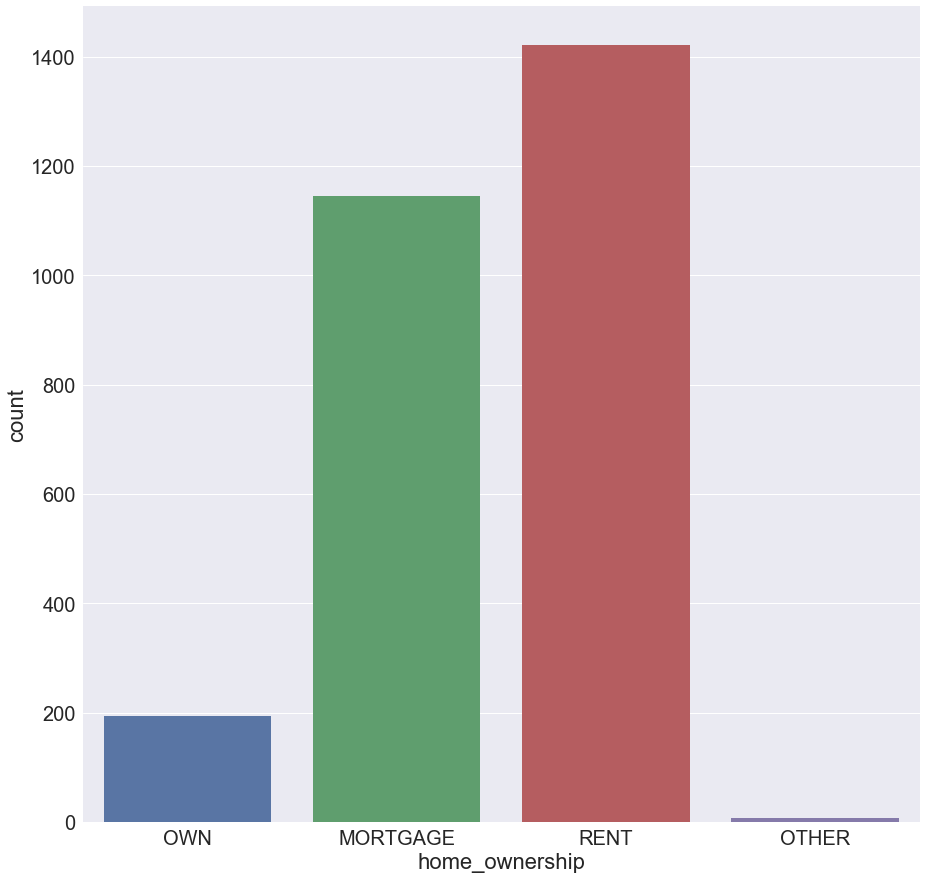

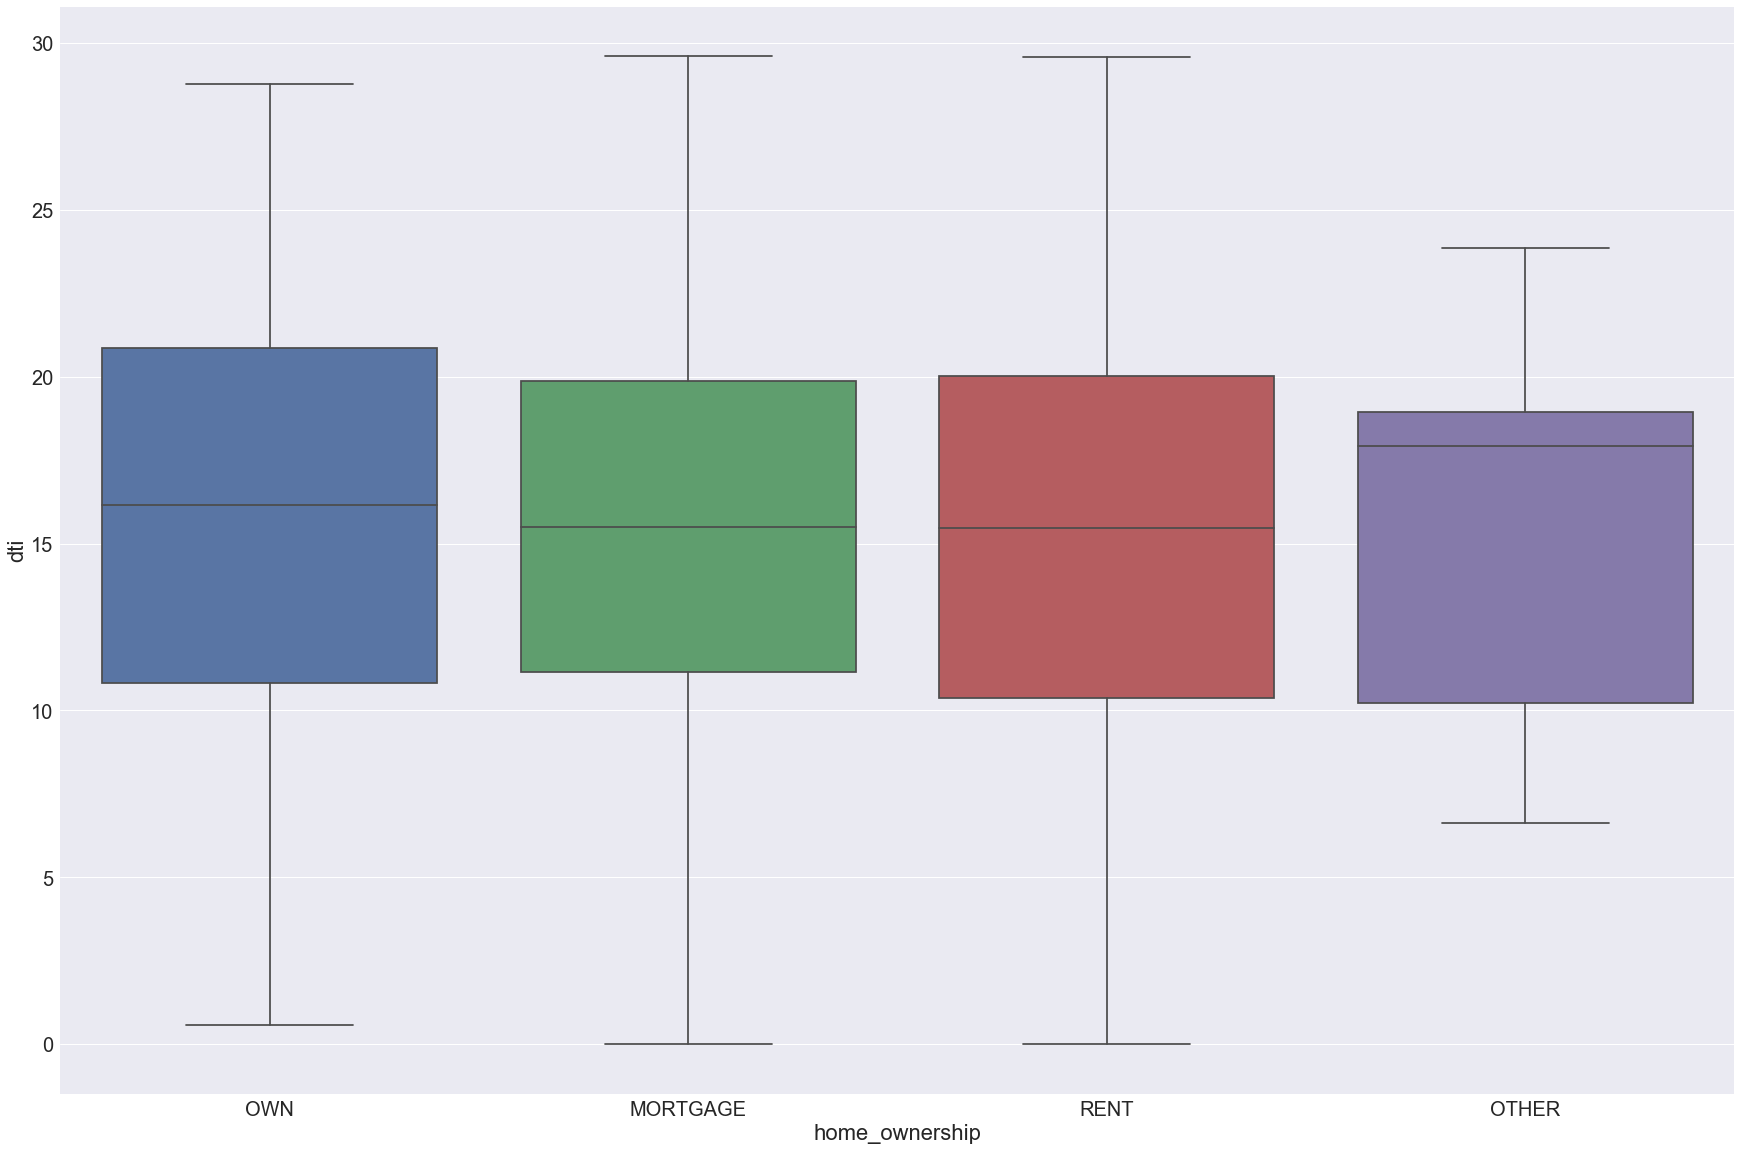

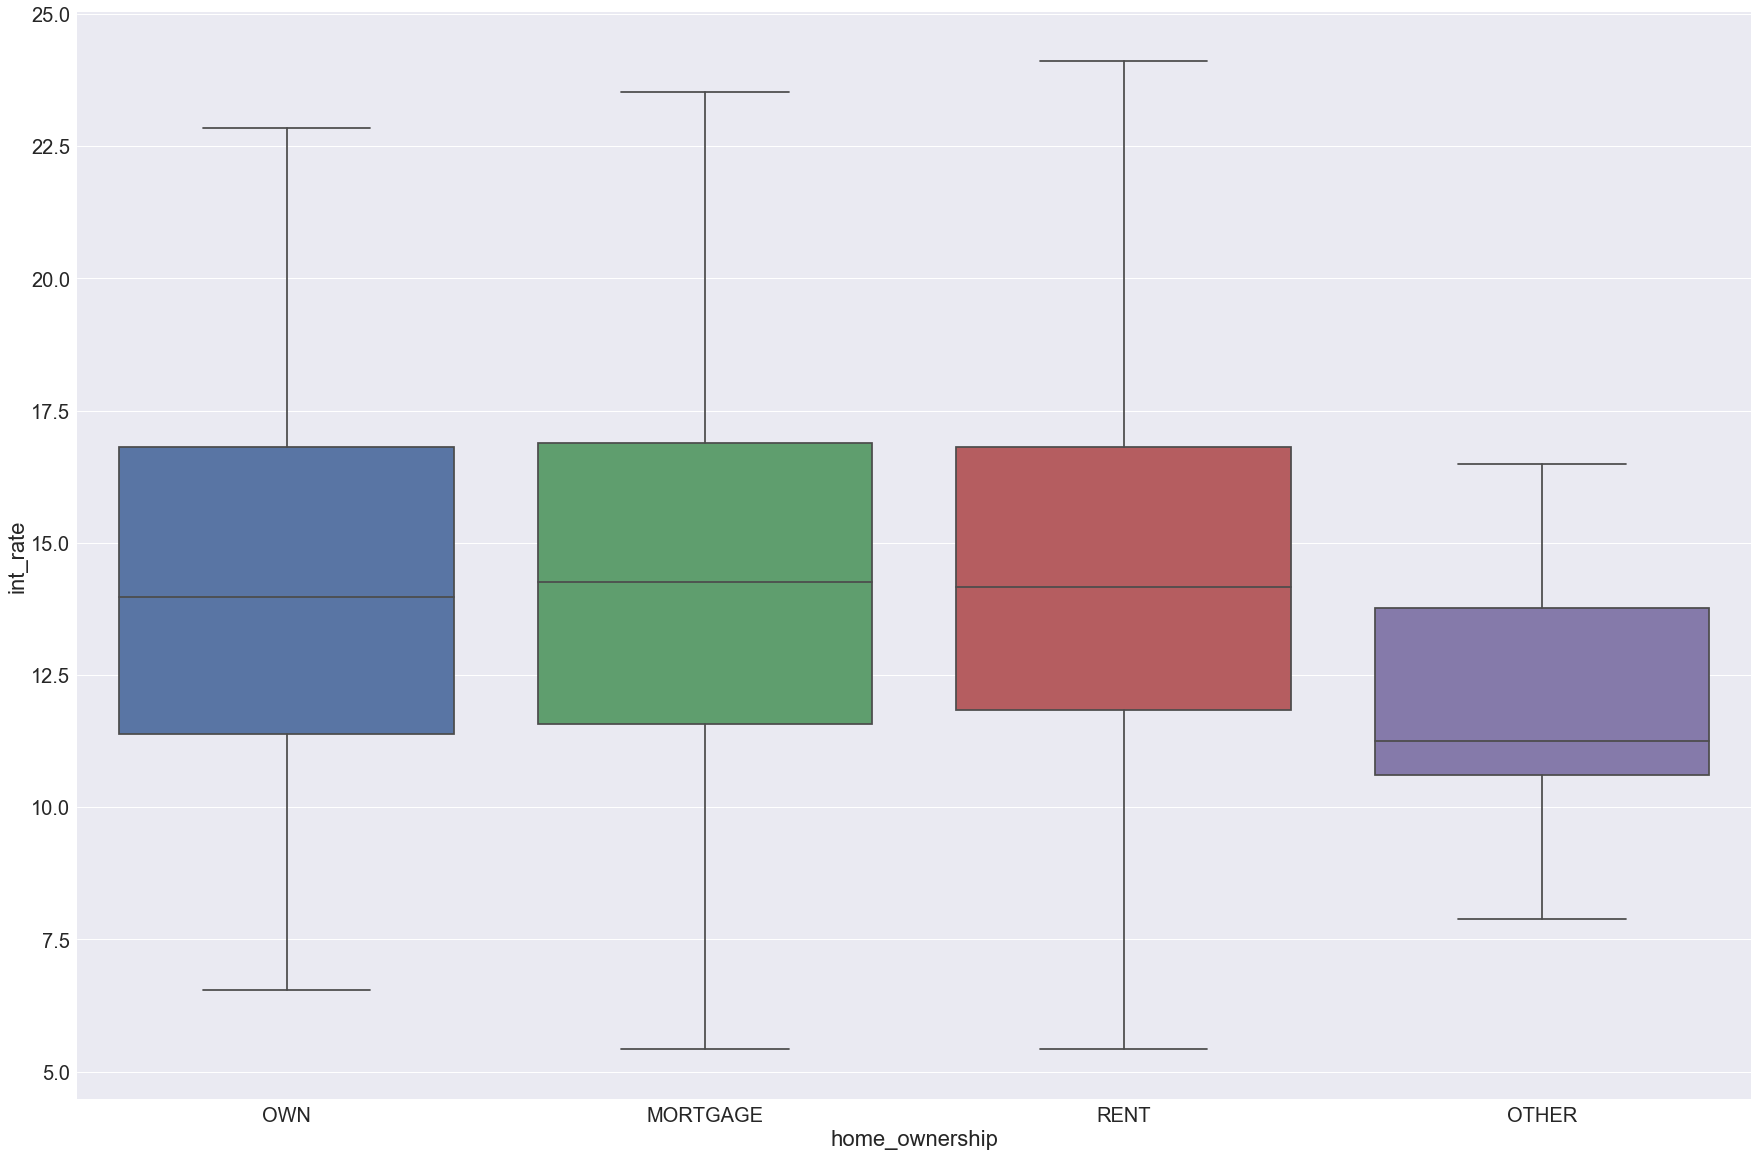

In [238]:
## Rented Customer are buying more loan foloowed by morgage customers

loan_home_ownership_dist=loan_status_analysis[(loan_status_analysis.purpose=='debt_consolidation') & \
                                             (loan_status_analysis.loan_status=='Charged Off')]

dropcolumns1=['id','member_id','tax_liens','policy_code','application_type','acc_now_delinq','delinq_amnt','grade','sub_grade',\
            'emp_title','emp_length','verification_status','issue_d','loan_status','pymnt_plan','url','desc',\
            'purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d',\
            'last_credit_pull_d','mths_since_last_delinq','mths_since_last_record']

loan_home_ownership_dist.drop(dropcolumns1,axis=1,inplace=True) # dropcolumns list is created above
#loan_home_ownership_dist.info()# Creating list for histogram
loan_home_ownership_dist_grp=loan_home_ownership_dist[['home_ownership','funded_amnt','total_rec_late_fee']].groupby('home_ownership')\
                                                                                                    .sum()\
                                                                                                    .reset_index()\
                                                                                                    .sort_values(by='funded_amnt',ascending=False)

print(loan_home_ownership_dist_grp)
print('')
print(loan_home_ownership_dist.home_ownership.value_counts())

f1, ax1 = plt.subplots(figsize=(15, 15))
sns.set(font_scale=2)
sns.countplot(x=loan_home_ownership_dist['home_ownership'])

f2, ax2 = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2)
sns.boxplot(x="home_ownership",y='dti',data=loan_home_ownership_dist)

f3, ax3 = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2)
sns.boxplot(x="home_ownership",y='int_rate',data=loan_home_ownership_dist)
loan_home_ownership_dist[['funded_amnt','int_rate','term']].describe()

### Lets Analyse the current account behavior of the Credit card as they are also 2nd in majorty Charge Off

count    542.000000
mean      13.405000
std        3.549261
min        5.420000
25%       11.175000
50%       13.350000
75%       15.957500
max       23.130000
Name: int_rate, dtype: float64


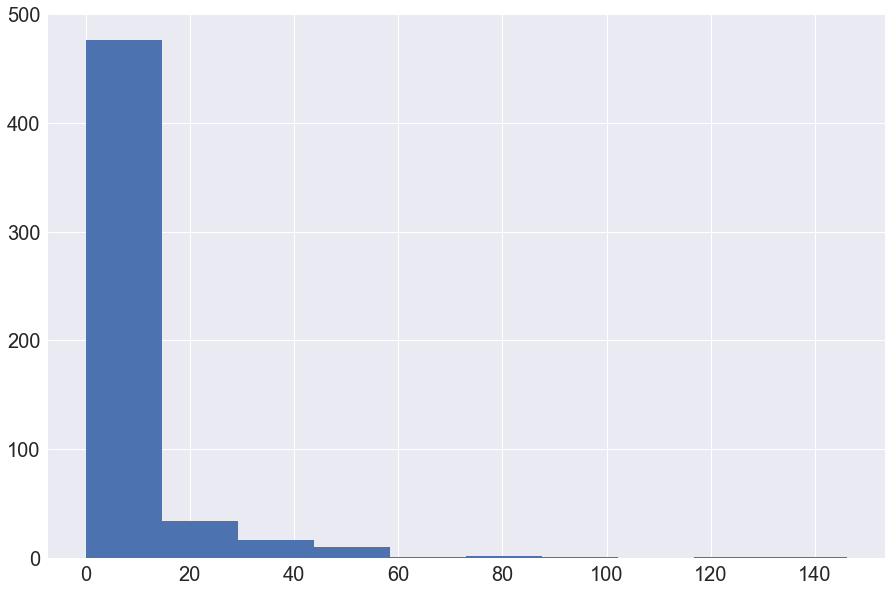

In [239]:
loan_crdcard_curre=loan_home_ownership_dist=loan_status_analysis[(loan_status_analysis.purpose=='credit_card') & \
                                             (loan_status_analysis.loan_status=='Charged Off')]
print(loan_crdcard_curre['int_rate'].describe())
loan_crdcard_curre.total_rec_late_fee.hist() # Shows CC not much of the user have actully penalised for paying late

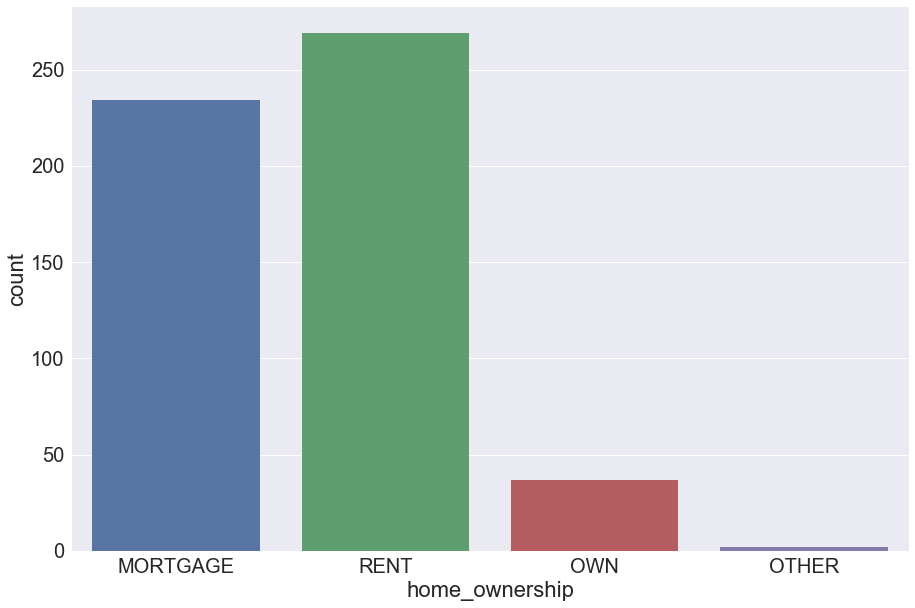

In [240]:
# Lets see the home type of credit card users

loan_crdcard_curre.groupby(loan_crdcard_curre.home_ownership).count().reset_index()
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=2)
sns.countplot(x=loan_crdcard_curre['home_ownership'])

Analysis of the home_ownership for Charged Off and Current Account



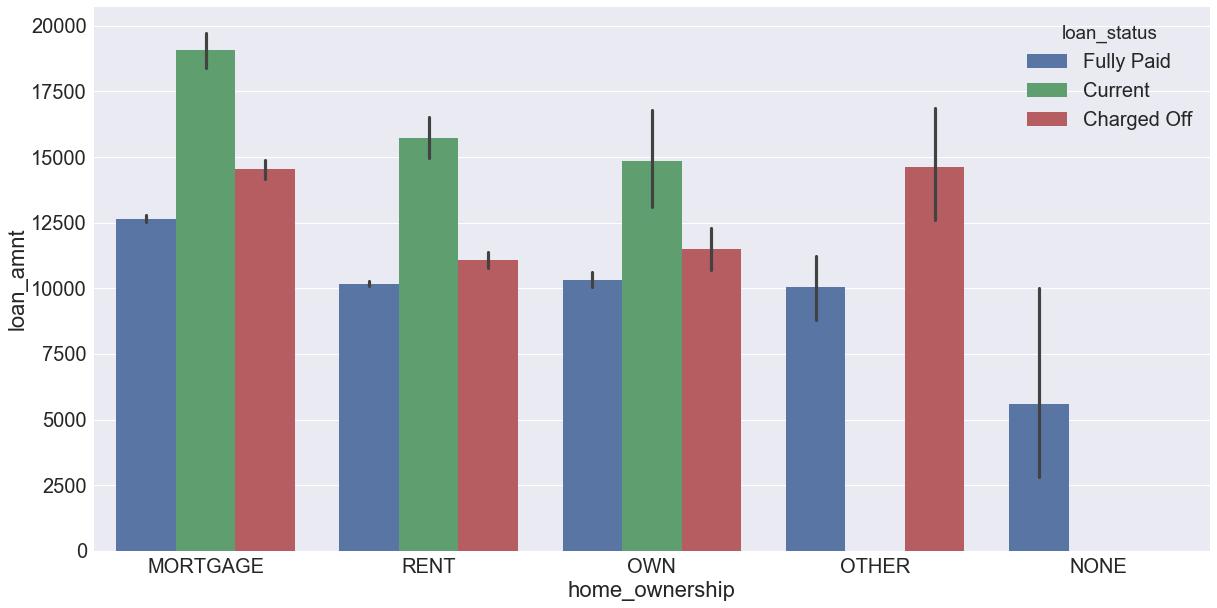

In [241]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.barplot(x='home_ownership',y='loan_amnt',data=loan_status_analysis,hue='loan_status')


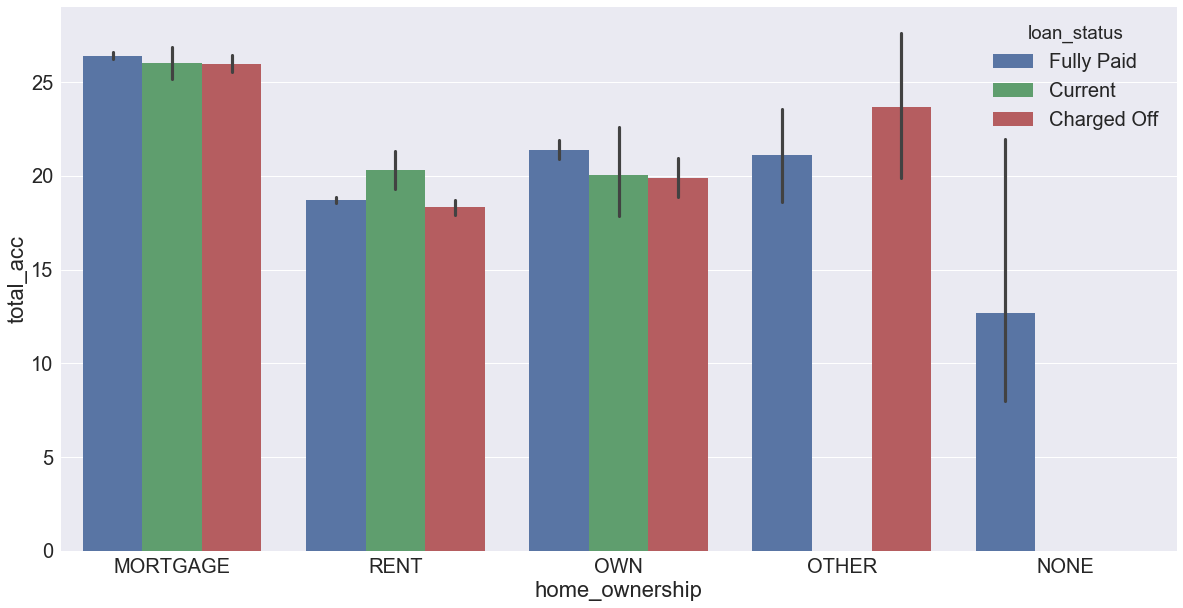

In [242]:
#understanding total number of credit lines currently in the borrower's credit file

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.barplot(x='home_ownership',y='total_acc',data=loan_status_analysis,hue='loan_status')
# As such there is no relationship among home_ownership ,total_acc and loan_status

Above Graph shows those having highes number of total Acc or credit line

In [243]:
# Checking the employemnet duration of people across loan_status

df=loan_status_analysis[['loan_status','emp_length']]
df_grp=df.groupby('loan_status').mean()                        
print(df_grp)



             emp_length
loan_status            
Charged Off    5.262114
Current        6.219192
Fully Paid     5.088053


        emp_length
count  4788.000000
mean      5.262114
std       3.454501
min       1.000000
10%       1.000000
20%       2.000000
30%       2.000000
40%       3.000000
50%       5.000000
60%       6.000000
70%       8.000000
80%      10.000000
90%      10.000000
max      10.000000

10.0    1213
1.0      947
2.0      498
3.0      490
5.0      406
4.0      403
6.0      277
7.0      229
8.0      180
9.0      145
Name: emp_length, dtype: int64


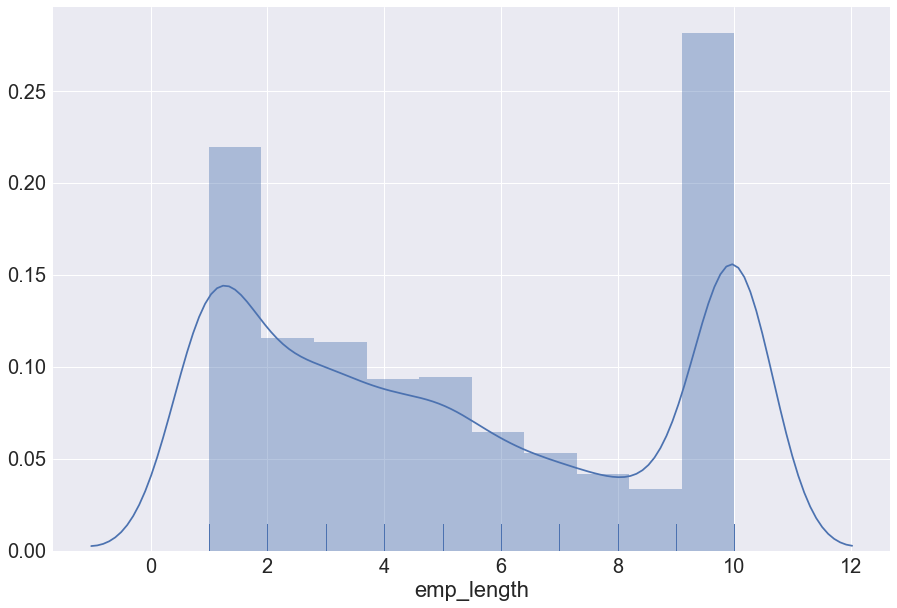

In [244]:
# Verifying the description for emp_length for charged Off Account
df_ch=loan_status_analysis[loan_status_analysis.loan_status=='Charged Off'][['loan_status','emp_length']].dropna()

print(df_ch.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

emp_year=df_ch['emp_length']
print('')
print(emp_year.value_counts())
sns.distplot(emp_year,rug=True)
#### ! and 10 has more charge off and rest years shoe decreasing treand

## Lets analyse the chargeOff amount distribution across employee_length factor

count    33852.000000
mean         5.145752
std          3.415877
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


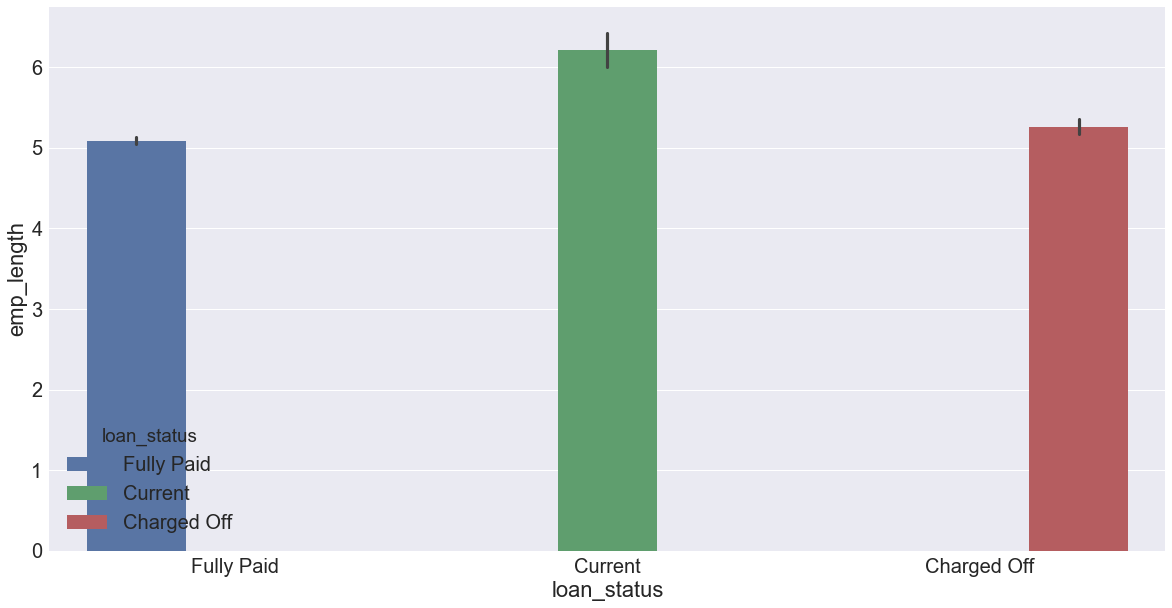

In [245]:
#understanding Employment length in years
print(loan_status_analysis['emp_length'].describe())

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.barplot(x='loan_status',y='emp_length',data=loan_status_analysis,hue='loan_status')


   emp_length  loan_amnt  percent_contribution_charged_off
0        10.0   18198875                         29.852243
1         1.0   10448050                         17.138297
2         3.0    5811175                          9.532271
3         2.0    5510375                          9.038858
4         5.0    5059550                          8.299354
5         4.0    4897675                          8.033825
6         6.0    3598900                          5.903400
7         7.0    3061075                          5.021187
8         8.0    2411250                          3.955257
9         9.0    1966250                          3.225308


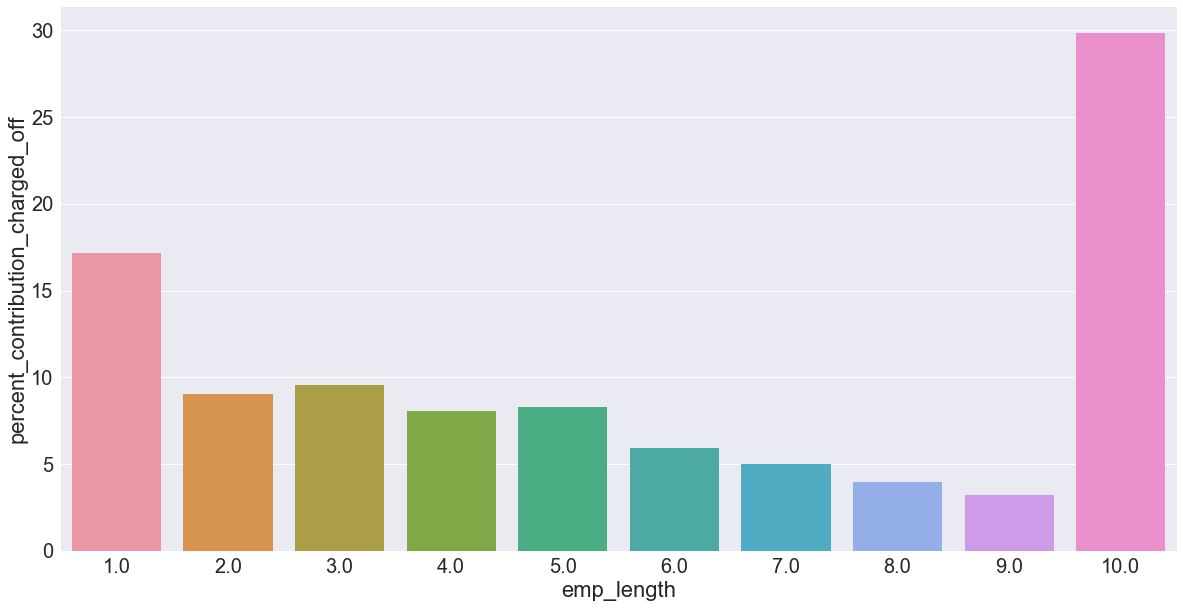

In [246]:
# By Studying percent contribution charged Off 
#we will be able to understand the correlation between Years Of Experience (emp_length) and total amount across emp_length
df_temp=loan_status_analysis[(loan_status_analysis.loan_status=='Charged Off')][['emp_length','loan_amnt']]
df_grp=df_temp.groupby('emp_length').sum().sort_values(by='loan_amnt',ascending=False).reset_index()
df_grp['percent_contribution_charged_off']=(df_grp['loan_amnt']/(df_grp['loan_amnt'].sum()))*100
print(df_grp)
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.barplot(x='emp_length',y='percent_contribution_charged_off',data=df_grp)
# Customer whose employee length is more than 10 years is having maximum deafulters followed by the customer whose.....continued
#  emp_length is equal to or less than 1 year 

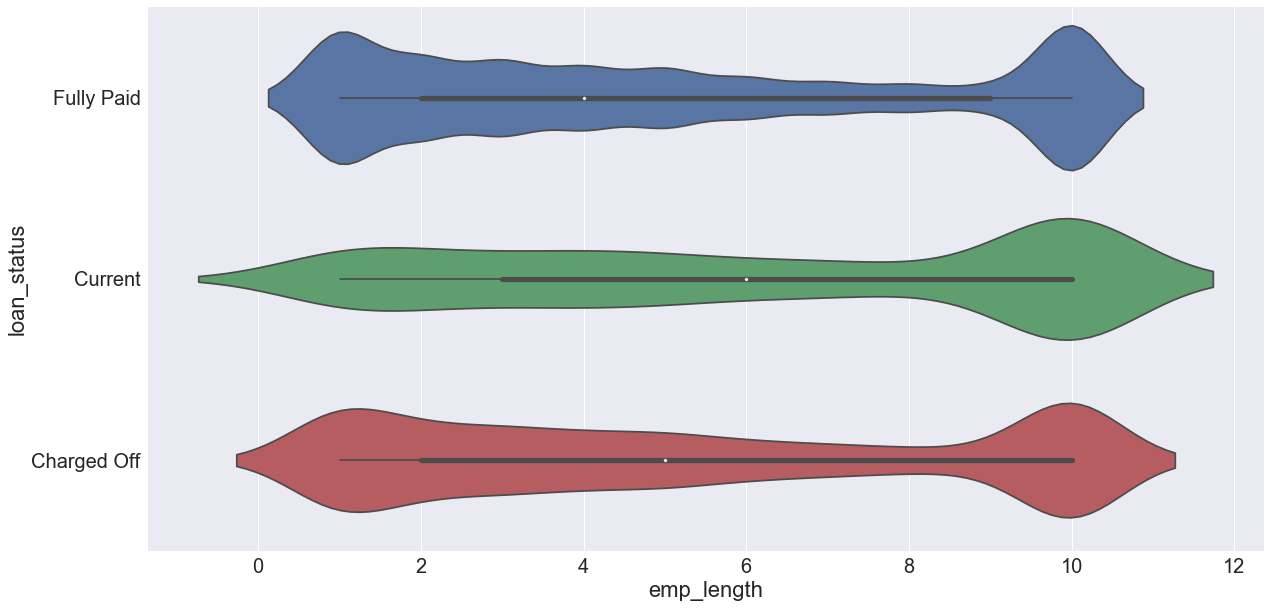

In [247]:
#lets see emp_length in loan application across loan purpose
df_emp_length=loan_status_analysis[['loan_status','emp_length']]
#Plotting graphs across purpose and years of experience(emp_length)
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.violinplot(x="emp_length", y="loan_status", data=df_emp_length);



## Conclusions from above results
1. For employement length of more than or equal to 10 years we have 29% of charged off Amount
2. For Employement Age of 1 year  we have 16% of Charged Off Amount
3. For employement range of 6-9 charge off amount is comparibly less 3-5% and behaviour is normal
4. Above observation was because more percentage of people in these range take loan >10 years and <1 Years so default the loan more in this range


count    4986.000000
mean       21.720818
std        11.386291
min         2.000000
10%         8.000000
20%        12.000000
30%        14.000000
40%        17.000000
50%        20.000000
60%        23.000000
70%        27.000000
80%        31.000000
90%        38.000000
max        74.000000
Name: total_acc, dtype: float64


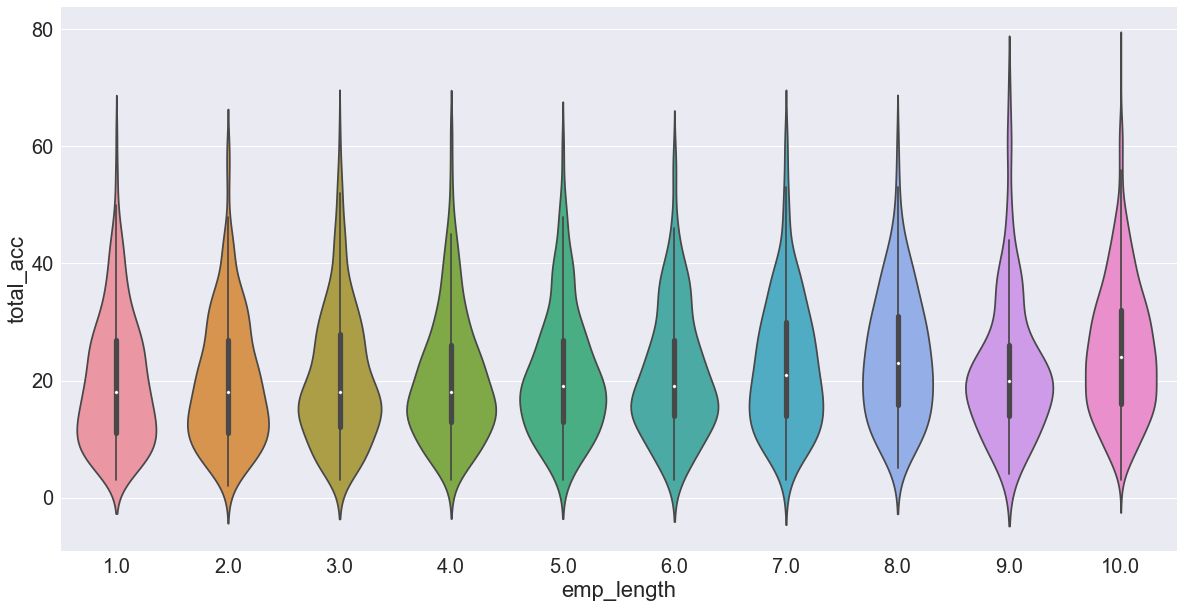

In [248]:
# Let us analyse the impact of total_acc( total credit line ) and emp_length on Charged Off acc

df=loan_status_analysis[['loan_status','total_acc','emp_length']]
df=df[df.loan_status=='Charged Off']
print(df['total_acc'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
sns.violinplot(x="emp_length", y="total_acc", data=df);
#df

### Conclusion from above analysis of emp_length, total_acc
1. We can see clearly that those who are having total_acc in between 17-23 ( considering percentile and violin graph) are more likely to default in loan
2.

C:\Users\inpunabhr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


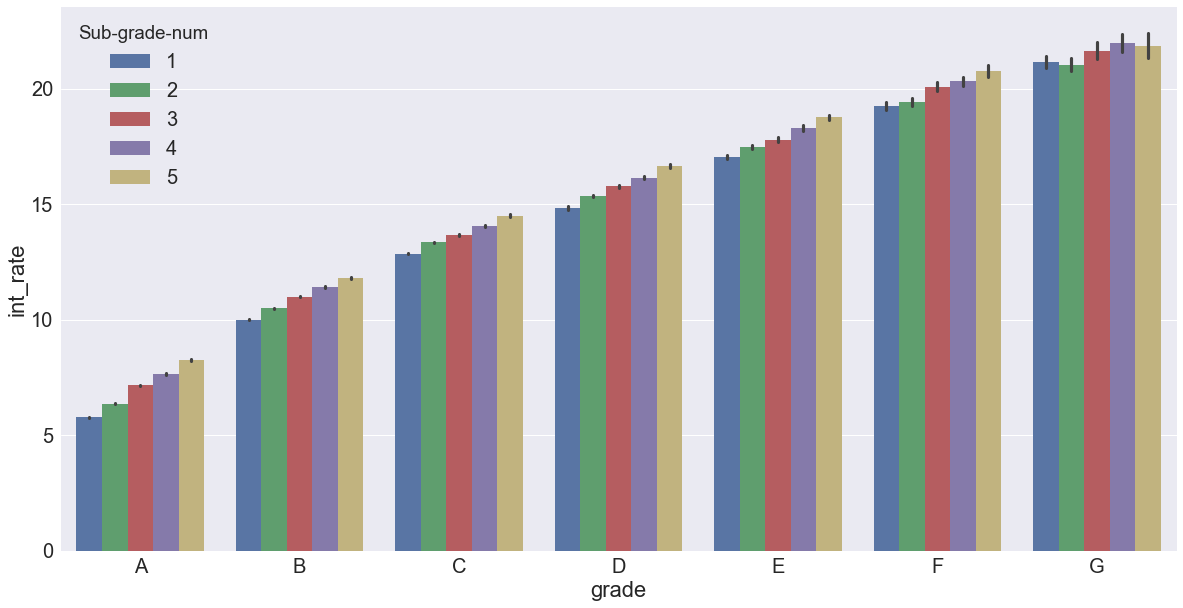

In [249]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=2)
loan_purpose_analysis['Sub-grade-num']=loan_purpose_analysis.sub_grade.str.extract('(\d+)')
sns.barplot(data=loan_purpose_analysis, x='grade',y='int_rate',hue='Sub-grade-num',order=['A','B','C','D','E','F','G'])
####Plot show Intrest rate in each grade have 1(sub-grade) as minimum and 5 (sub grade) as maximum grade

(<matplotlib.figure.Figure at 0x1e287ce9da0>,
 OrderedDict([(('Verified', 'Fully Paid'),
               (0.0, 0.0, 0.3310585698190017, 0.78394844683437315)),
              (('Verified', 'Current'),
               (0.0,
                0.78725970511251875,
                0.3310585698190017,
                0.048382381518728097)),
              (('Verified', 'Charged Off'),
               (0.0,
                0.83895334490939266,
                0.3310585698190017,
                0.16104665509060725)),
              (('Not Verified', 'Fully Paid'),
               (0.3360090648685067,
                0.0,
                0.4158102474036786,
                0.8538581739712775)),
              (('Not Verified', 'Current'),
               (0.3360090648685067,
                0.8571694322494231,
                0.4158102474036786,
                0.01272688335187541)),
              (('Not Verified', 'Charged Off'),
               (0.3360090648685067,
                0.87320757387944437,
 

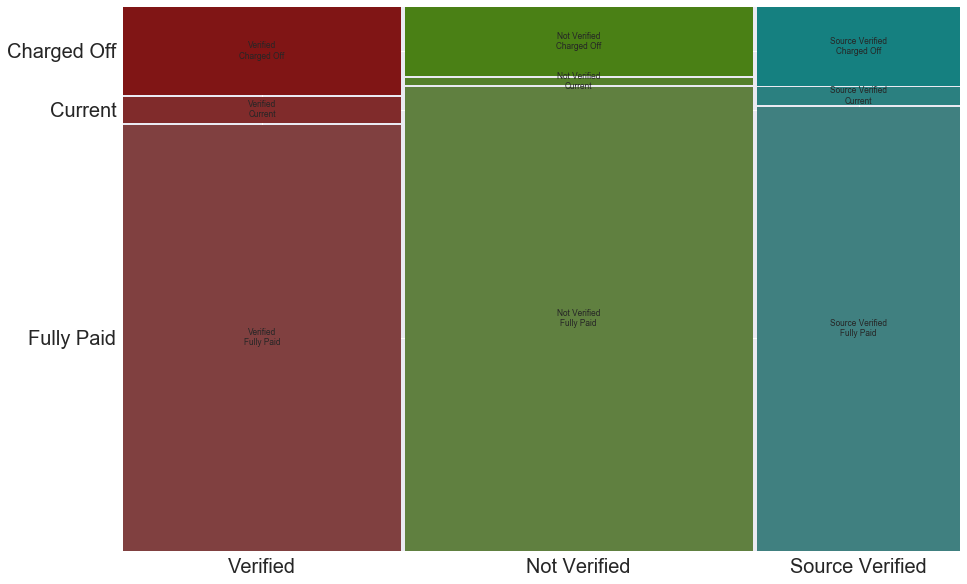

In [250]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
plt.rcParams['figure.figsize']=15,10
mosaic(loan_purpose_analysis, ['verification_status', 'loan_status'])
#Try to find the categorical relation relative to each other .It shows verified has more charged off than others

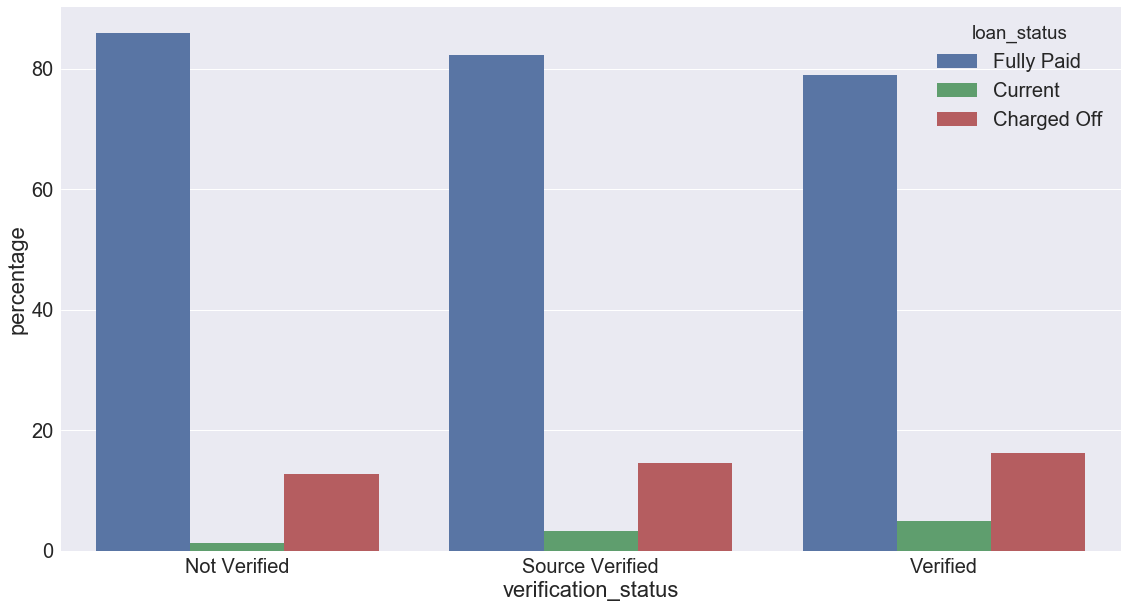

In [251]:
###Bivariate on verification_status and loan_status with grouped percentage
loan_status_df=loan_purpose_analysis[['verification_status', 'loan_status']]
loan_status_df1=loan_status_df.groupby(['verification_status', 'loan_status']).size()
loan_status_df2=loan_status_df1.groupby(level=[0]).apply(lambda x:x/x.sum()*100)
newdf3=loan_status_df2.reset_index(name='percentage')
newdf3
f = plt.figure(figsize=(19,10))
sns.barplot(x='verification_status',y='percentage', hue='loan_status', data=newdf3 ,hue_order=['Fully Paid','Current', 'Charged Off'])


    loan_status        annual_inc_bin  percentage
0   Charged Off    (3940.08, 15740.0]    2.040816
1   Charged Off    (15740.0, 27400.0]    8.496460
2   Charged Off    (27400.0, 39060.0]   17.180342
3   Charged Off    (39060.0, 50720.0]   20.366514
4   Charged Off    (50720.0, 62380.0]   17.138692
5   Charged Off    (62380.0, 74040.0]   11.432736
6   Charged Off    (74040.0, 85700.0]    9.162849
7   Charged Off    (85700.0, 97360.0]    5.143690
8   Charged Off   (97360.0, 109020.0]    3.394419
9   Charged Off  (109020.0, 120680.0]    2.915452
10  Charged Off  (120680.0, 132340.0]    1.645148
11  Charged Off  (132340.0, 144000.0]    1.082882
12      Current    (3940.08, 15740.0]    0.315126
13      Current    (15740.0, 27400.0]    3.571429
14      Current    (27400.0, 39060.0]    9.768908
15      Current    (39060.0, 50720.0]   20.168067
16      Current    (50720.0, 62380.0]   16.806723
17      Current    (62380.0, 74040.0]   13.340336
18      Current    (74040.0, 85700.0]   13.865546


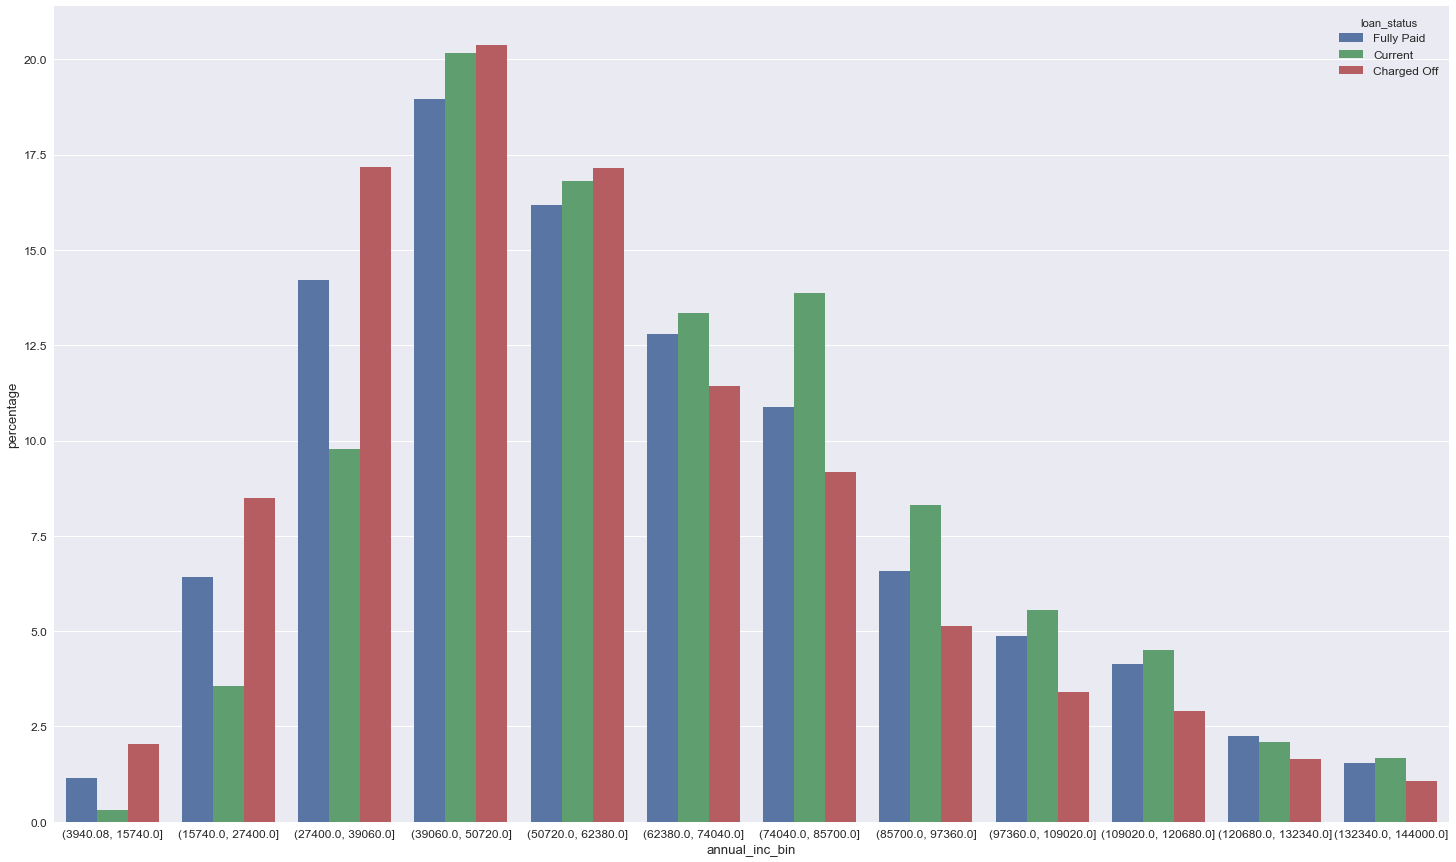

In [252]:
###multivariate on annual_inc and loan_status with grouped percentage
loan_inc_amt_status_df=loan_purpose_analysis[loan_purpose_analysis['annual_inc']<=loan_purpose_analysis['annual_inc'].quantile(.95)]\
[['loan_amnt','annual_inc', 'loan_status']]
loan_inc_amt_status_df['loan_amnt_bin']=pd.cut(loan_inc_amt_status_df.loan_amnt, 12)
loan_inc_amt_status_df['annual_inc_bin']=pd.cut(loan_inc_amt_status_df.annual_inc, 12)


loan_inc_status_df1=loan_inc_amt_status_df.groupby(['loan_status','annual_inc_bin']).size()
loan_inc_status_df2=loan_inc_status_df1.groupby(level=[0]).apply(lambda x:x/x.sum()*100)
newdf4=loan_inc_status_df2.reset_index(name='percentage')
print(newdf4)
sns.set(font_scale=1.2)
f = plt.figure(figsize=(25,15))
sns.barplot(x='annual_inc_bin',y='percentage', hue='loan_status', data=newdf4 ,hue_order=['Fully Paid','Current', 'Charged Off'])


From Above graph some of the highrisk Annual income group where we found maximum Defaults are
(Approx Range rounded to near 1000s)
4000-62,000 where as in range 15-40,000 we have maximum default %

    loan_status       loan_amnt_bin  percentage
0   Charged Off     (465.5, 3375.0]    9.350271
1   Charged Off    (3375.0, 6250.0]   18.263224
2   Charged Off    (6250.0, 9125.0]   14.285714
3   Charged Off   (9125.0, 12000.0]   17.284465
4   Charged Off  (12000.0, 14875.0]    6.476468
5   Charged Off  (14875.0, 17750.0]   10.807997
6   Charged Off  (17750.0, 20625.0]    8.642232
7   Charged Off  (20625.0, 23500.0]    2.936277
8   Charged Off  (23500.0, 26375.0]    6.872137
9   Charged Off  (26375.0, 29250.0]    0.708038
10  Charged Off  (29250.0, 32125.0]    1.582674
11  Charged Off  (32125.0, 35000.0]    2.790504
12      Current     (465.5, 3375.0]    2.836134
13      Current    (3375.0, 6250.0]    8.508403
14      Current    (6250.0, 9125.0]    6.302521
15      Current   (9125.0, 12000.0]   12.394958
16      Current  (12000.0, 14875.0]   13.235294
17      Current  (14875.0, 17750.0]   13.970588
18      Current  (17750.0, 20625.0]   14.075630
19      Current  (20625.0, 23500.0]    5

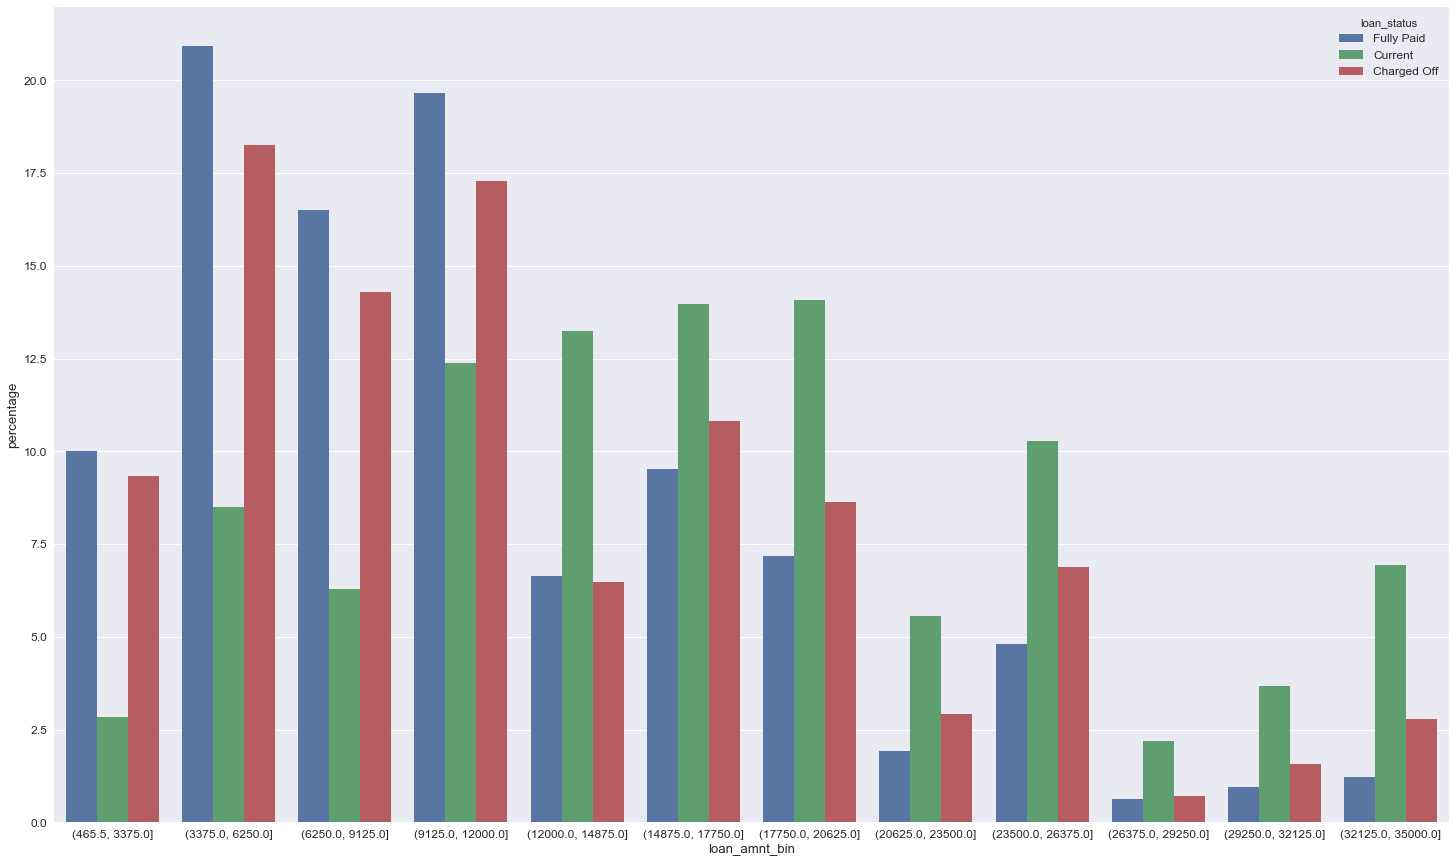

In [253]:
## Maximum customers are whose annual income is inbetween 39000 and 74000 has taken the loan 
loan_amnt_status_df1=loan_inc_amt_status_df.groupby(['loan_status','loan_amnt_bin']).size()
loan_amnt_status_df2=loan_amnt_status_df1.groupby(level=[0]).apply(lambda x:x/x.sum()*100)
newdf5=loan_amnt_status_df2.reset_index(name='percentage')
print(newdf5)

sns.set(font_scale=1.2)
f = plt.figure(figsize=(25,15))
sns.barplot(x='loan_amnt_bin',y='percentage', hue='loan_status', data=newdf5 ,hue_order=['Fully Paid','Current', 'Charged Off'])
### charged off % is higher than paid once in loan >15k

In [254]:
#Starting analysis on principal amount
loan_left_status_df=Loan_nacol_rem_df.copy()

loan_left_status_df['principle_tobe_paid']=round(((loan_purpose_analysis.funded_amnt-loan_purpose_analysis.total_rec_prncp)/loan_purpose_analysis.funded_amnt)*100)
###% of principle to be paid
loan_left_status_df['per_prcp_recover']=round(((loan_purpose_analysis.total_rec_prncp)/loan_purpose_analysis.funded_amnt)*100) 
###% of principle alredy recovered

In [255]:
loan_left_status_df_temp=loan_left_status_df[loan_left_status_df.loan_status=='Charged Off']

df=loan_left_status_df_temp[['per_prcp_recover']].groupby('per_prcp_recover')\
                                               .size()\
                                               .rename('counts')\
                                               .reset_index()\
                                               .sort_values(by='per_prcp_recover',ascending=False)
df_principal_recover=df.copy()

df['per_prcp_recover_bin']=pd.cut(df.per_prcp_recover,20)
df.groupby('per_prcp_recover_bin').sum()



per_prcp_recover  counts
per_prcp_recover_bin                          
(-0.099, 4.95]                    10.0     312
(4.95, 9.9]                       35.0     446
(9.9, 14.85]                      60.0     479
(14.85, 19.8]                     85.0     428
(19.8, 24.75]                    110.0     406
(24.75, 29.7]                    135.0     358
(29.7, 34.65]                    160.0     342
(34.65, 39.6]                    185.0     274
(39.6, 44.55]                    210.0     280
(44.55, 49.5]                    235.0     264
(49.5, 54.45]                    260.0     229
(54.45, 59.4]                    285.0     220
(59.4, 64.35]                    310.0     185
(64.35, 69.3]                    335.0     187
(69.3, 74.25]                    360.0     140
(74.25, 79.2]                    385.0     133
(79.2, 84.15]                    410.0     117
(84.15, 89.1]                    435.0      76
(89.1, 94.05]                    460.0      78
(94.05, 99.0]                    485.0      32

In [256]:
print("total ", df[df.per_prcp_recover>0].sum())
print("60+", df[df.per_prcp_recover>59].sum())
print("80+", df[df.per_prcp_recover>79].sum())
print("90+ ", df[df.per_prcp_recover>89].sum())
print("95+ ", df[df.per_prcp_recover>94].sum())

total  per_prcp_recover    4950.0
counts              4925.0
dtype: float64
60+ per_prcp_recover    3180.0
counts               948.0
dtype: float64
80+ per_prcp_recover    1790.0
counts               303.0
dtype: float64
90+  per_prcp_recover    945.0
counts              110.0
dtype: float64
95+  per_prcp_recover    485.0
counts               32.0
dtype: float64


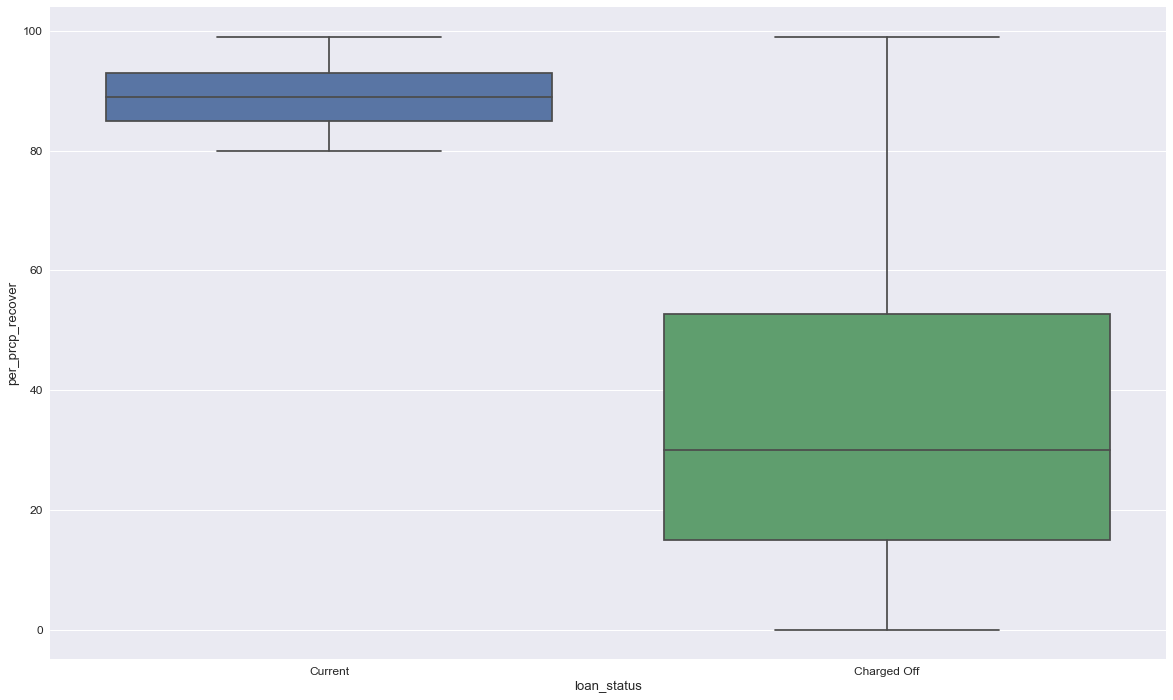

In [257]:
df8=loan_left_status_df[loan_left_status_df['per_prcp_recover']<100]
sns.set(font_scale=1.2)
plt.figure(figsize=(20,12))
sns.boxplot(x='loan_status',y='per_prcp_recover', data=df8 ,order=['Current', 'Charged Off'])
#### There are 19% defaulters from total defaulters paid more than 60% of their principle


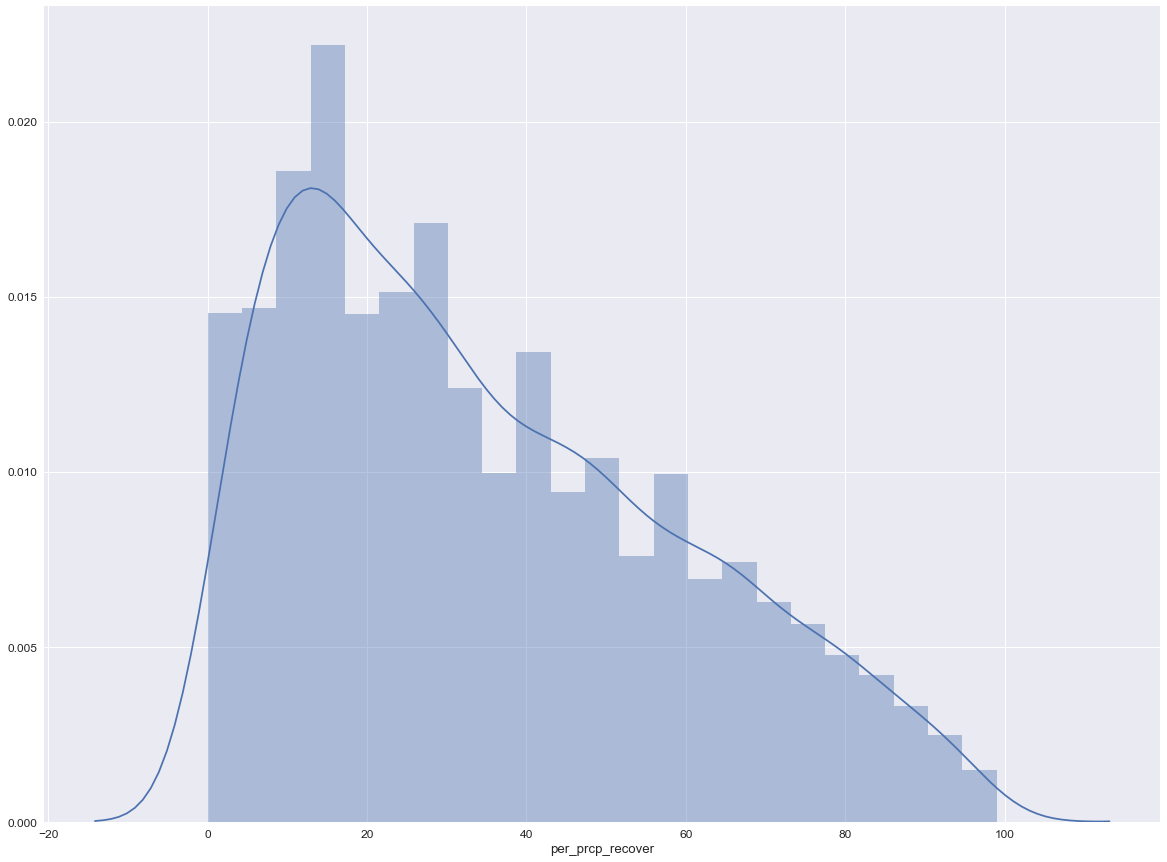

In [258]:
df9=df8[df8['loan_status']=='Charged Off']
sns.set(font_scale=1.2)
plt.figure(figsize=(20,15))
sns.distplot(df9['per_prcp_recover'] )
#We added one extra column per_prcp_recover which shows
#that how much principle amount finance company recover till date specially from defaulters  


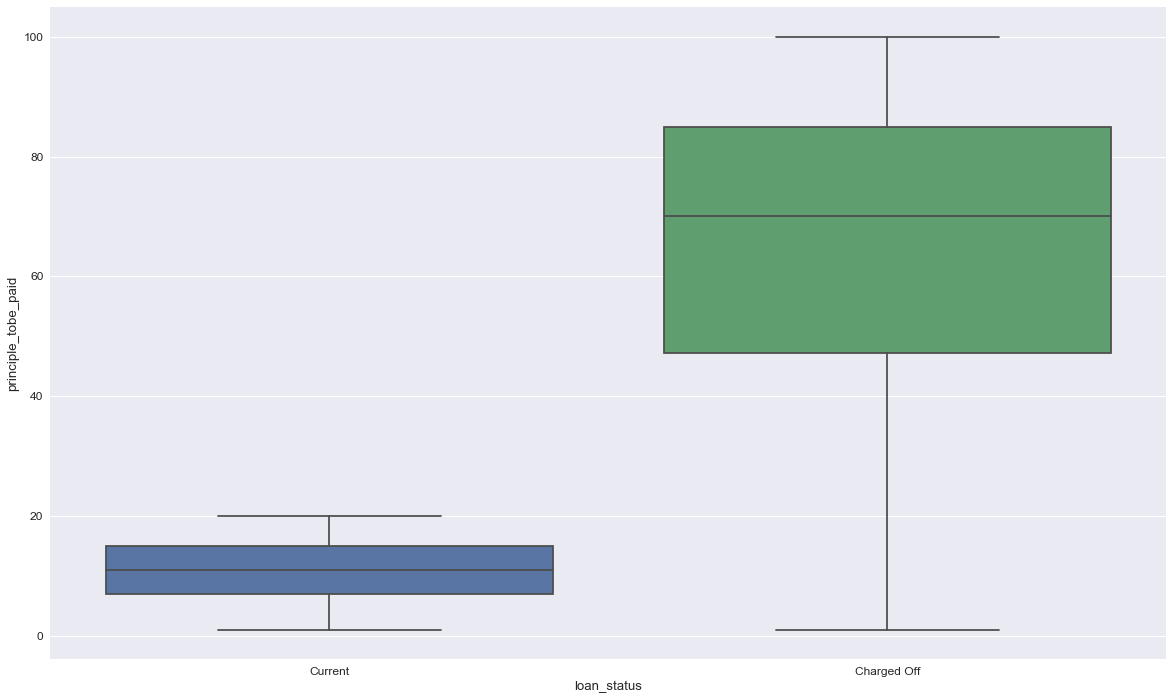

In [259]:
df7=loan_left_status_df[loan_left_status_df['principle_tobe_paid']>0]

sns.set(font_scale=1.2)
plt.figure(figsize=(20,12))
sns.boxplot(x='loan_status',y='principle_tobe_paid', data=df7 ,order=['Current', 'Charged Off'])
#### There are 19% defaulters from total defaulters paid more than 60% of their principle

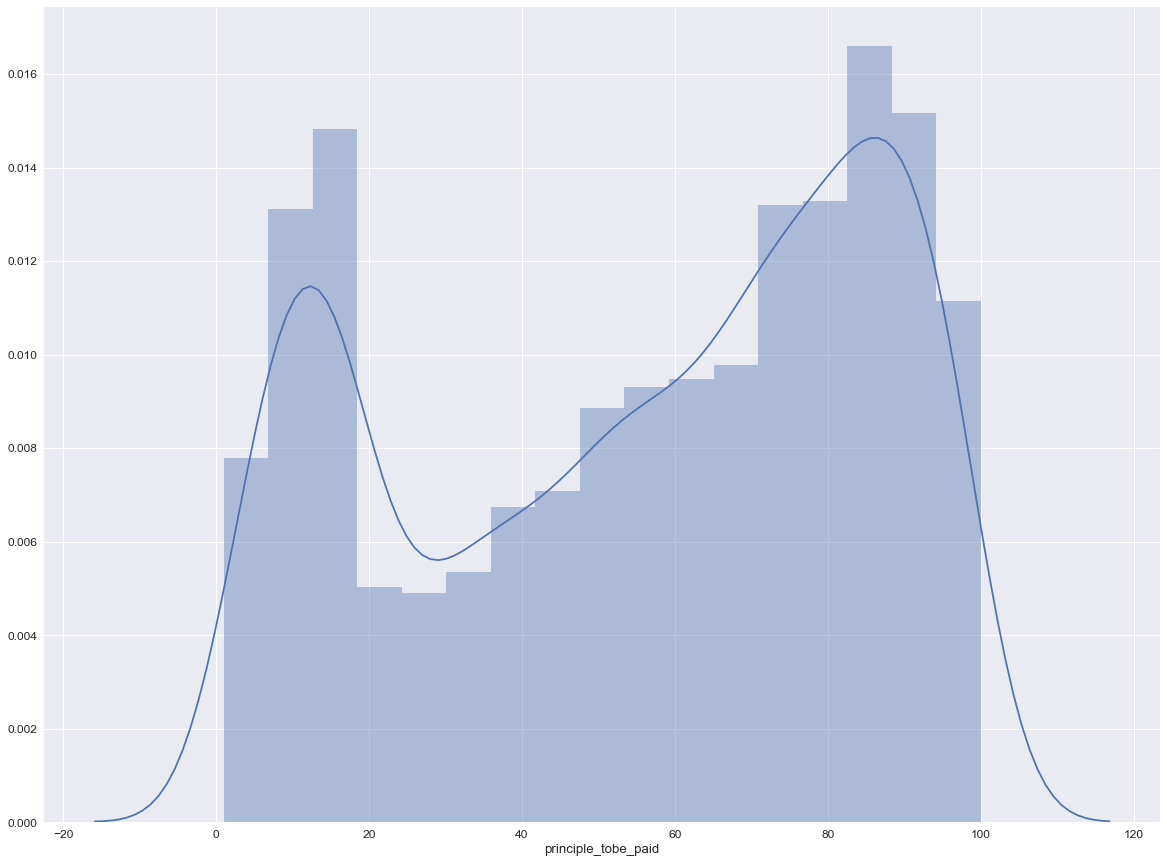

In [267]:

sns.set(font_scale=1.2)
plt.figure(figsize=(20,15))
sns.distplot(df7['principle_tobe_paid'])

## Spikes are higher at 10% of principle paid and >80% paid

In [261]:
df=Loan_nacol_rem_df[['addr_state','loan_status']]
df=df[df.loan_status=='Charged Off']
##df=df.groupby('addr_state').count().reset_index().sort_values(by='loan_status',ascending=False)
##df.head(10)# we can calculate the % contribution of total loan amount given in each state as charged off
loan_amnt_add_df1=df.groupby(['loan_status','addr_state']).size()
loan_amnt_add_df2=loan_amnt_add_df1.groupby(level=[0]).apply(lambda x:x/x.sum()*100)
loan_amnt_add_df2.reset_index(name='percentage').sort_values(by='percentage',ascending=False)
# It can be observed that  CA is contributing higher percentage in charged off acc. of loan

loan_status addr_state  percentage
4   Charged Off         CA   19.992891
9   Charged Off         FL    8.956815
30  Charged Off         NY    8.796872
39  Charged Off         TX    5.615781
27  Charged Off         NJ    4.940466
10  Charged Off         GA    3.820864
13  Charged Off         IL    3.500977
34  Charged Off         PA    3.198863
41  Charged Off         VA    3.145548
18  Charged Off         MD    2.878976
17  Charged Off         MA    2.825662
31  Charged Off         OH    2.754576
43  Charged Off         WA    2.256975
3   Charged Off         AZ    2.185889
21  Charged Off         MO    2.025946
24  Charged Off         NC    2.025946
29  Charged Off         NV    1.919318
19  Charged Off         MI    1.830460
5   Charged Off         CO    1.741603
6   Charged Off         CT    1.670517
20  Charged Off         MN    1.439488
33  Charged Off         OR    1.261774
36  Charged Off         SC    1.172916
44  Charged Off         WI    1.119602
1   Charged Off         AL    0.959659
16  Charged Off         LA    0.941887
15  Charged Off         KY    0.799716
40  Charged Off         UT    0.710858
32  Charged Off         OK    0.710858
14  Charged Off         KS    0.550915
28  Charged Off         NM    0.533144
11  Charged Off         HI    0.497601
2   Charged Off         AR    0.479829
35  Charged Off         RI    0.444286
26  Charged Off         NH    0.444286
45  Charged Off         WV    0.373201
7   Charged Off         DC    0.266572
0   Charged Off         AK    0.266572
8   Charged Off         DE    0.213258
37  Charged Off         SD    0.213258
23  Charged Off         MT    0.195486
42  Charged Off         VT    0.106629
46  Charged Off         WY    0.071086
25  Charged Off         NE    0.053314
38  Charged Off         TN    0.035543
22  Charged Off         MS    0.035543
12  Charged Off         ID    0.017771

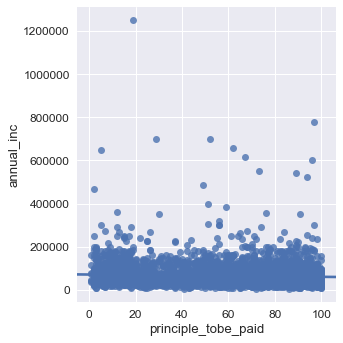

In [262]:
f = plt.figure(figsize=(80,60))
sns.lmplot('principle_tobe_paid','annual_inc',df7)

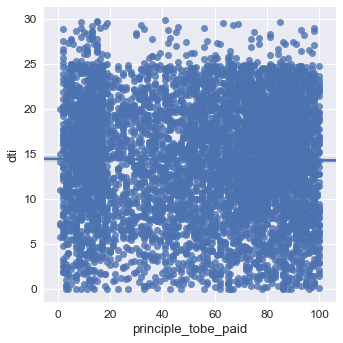

In [263]:
f = plt.figure(figsize=(80,60))
sns.lmplot('principle_tobe_paid','dti',df7)